## Assignment 10: The goal of this assignment is to build models using R.

### In the below code chunk I establish the mode function and load ggplot2. In the chunks that follow I carry out the tasks given to me throughout the assignment.

In [1]:
library(ggplot2)

# Creates mode function
calculate_mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

### 1.	Download the adult dataset.  Change its extension to .csv
### 2.  Import to Rstudio setting the header = FALSE so that the first rows does not turn in to variable names.  This means:  df = read.csv("adult.csv", header = FALSE)

In [2]:
adults <- read.csv("adult.csv", header = FALSE)

### 3.	Change the variables' names to the appropriate ones.  You can use function names(df) to access the variables names. 

In [3]:
names(adults)[1] = "age"
names(adults)[2] = "workclass"
names(adults)[3] = "finalweight"
names(adults)[4] = "education"
names(adults)[5] = "eductationnum"
names(adults)[6] = "maritalstatus"
names(adults)[7] = "occupation"
names(adults)[8] = "relationship"
names(adults)[9] = "race"
names(adults)[10] = "sex"
names(adults)[11] = "capitalgain"
names(adults)[12] = "capitalloss"
names(adults)[13] = "hoursperweek"
names(adults)[14] = "nativecountry"
names(adults)[15] = "income"

names(adults)

[1] "age"           "workclass"     "finalweight"   "education"    
 [5] "eductationnum" "maritalstatus" "occupation"    "relationship" 
 [9] "race"          "sex"           "capitalgain"   "capitalloss"  
[13] "hoursperweek"  "nativecountry" "income"

### 4.  Identify all the missing values.  Notice that missing values can be in the form of "NA", "?", "." and so on  

In [4]:
#In this data set, missing values are in the form of "?"
for(i in 1:ncol(adults))
{print(colnames(adults[i]))
  print(sum(adults[,i]=="?"))}

[1] "age"
[1] 0
[1] "workclass"
[1] 1836
[1] "finalweight"
[1] 0
[1] "education"
[1] 0
[1] "eductationnum"
[1] 0
[1] "maritalstatus"
[1] 0
[1] "occupation"
[1] 1843
[1] "relationship"
[1] 0
[1] "race"
[1] 0
[1] "sex"
[1] 0
[1] "capitalgain"
[1] 0
[1] "capitalloss"
[1] 0
[1] "hoursperweek"
[1] 0
[1] "nativecountry"
[1] 583
[1] "income"
[1] 0


### 5.	Replacing numeric missing values by the mean of the corresponding variables, and categorical missing values by the mode of the corresponding variables. 

In [5]:
adults[adults == "?"] <- NA
for(i in 1:ncol(adults))
{
  {if(is.numeric(adults[,i])==FALSE)
      {adults[,i][is.na(adults[,i])] <-  calculate_mode(adults[,i])}
  else if (is.numeric(adults[,i])== TRUE)
  {adults[,i][is.na(adults[,i])] = mean(adults[,i],na.rm = TRUE)}
  }
}
  
for(i in 1:ncol(adults))
{print(colnames(adults[i]))
  print(sum(is.na(adults[,i]))+sum(adults[,i]=="?"))}

[1] "age"
[1] 0
[1] "workclass"
[1] 0
[1] "finalweight"
[1] 0
[1] "education"
[1] 0
[1] "eductationnum"
[1] 0
[1] "maritalstatus"
[1] 0
[1] "occupation"
[1] 0
[1] "relationship"
[1] 0
[1] "race"
[1] 0
[1] "sex"
[1] 0
[1] "capitalgain"
[1] 0
[1] "capitalloss"
[1] 0
[1] "hoursperweek"
[1] 0
[1] "nativecountry"
[1] 0
[1] "income"
[1] 0


### 6.	Perform data visualization on the data.  You should include, at least: Bar charts of two categorical variables. 

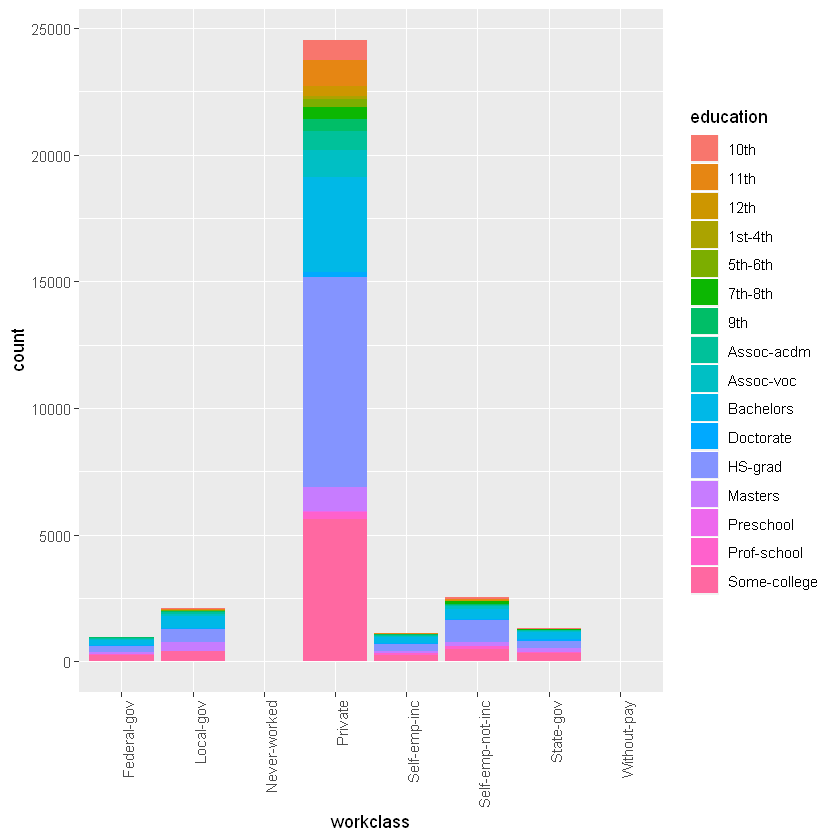

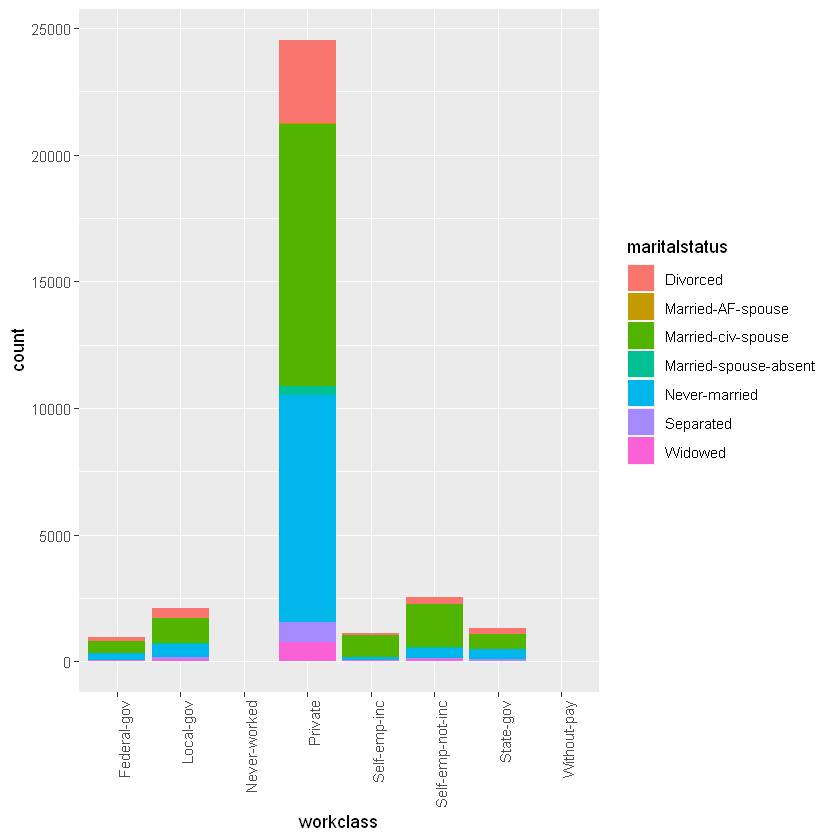

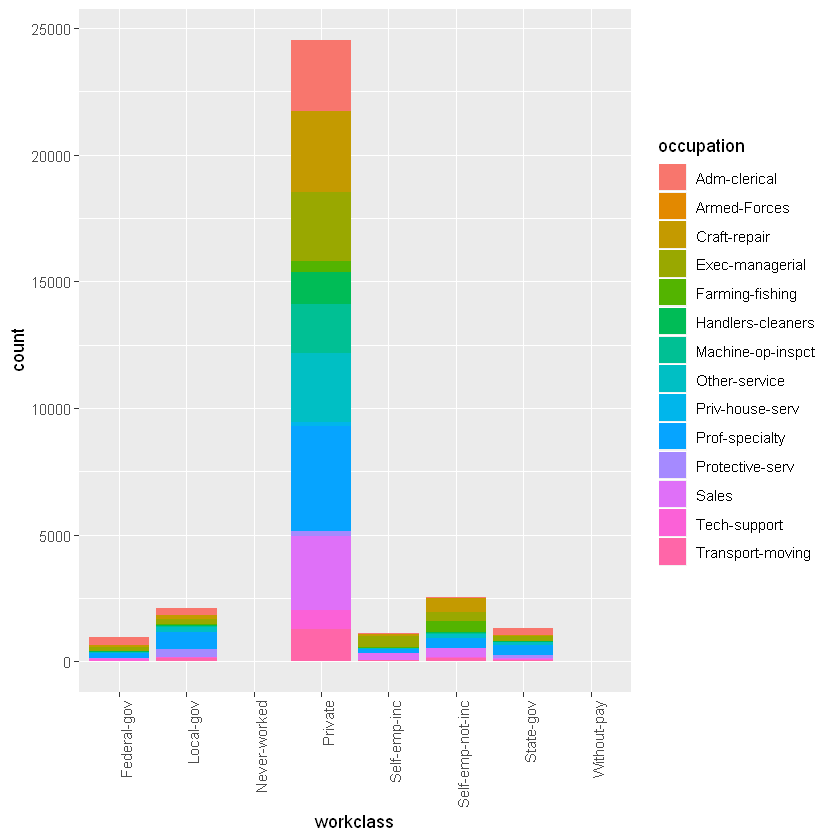

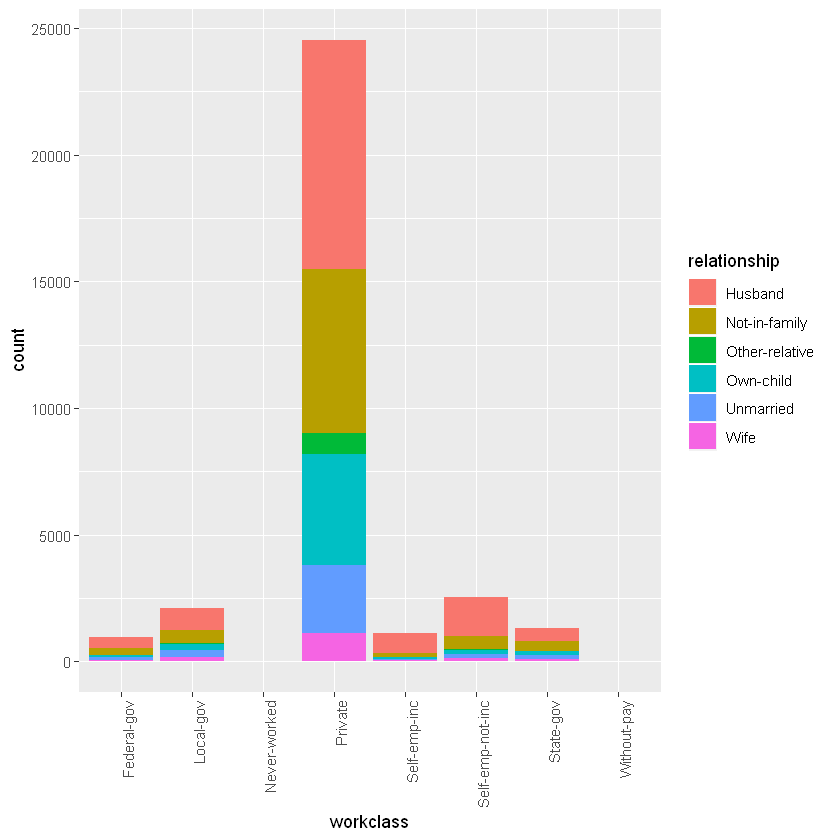

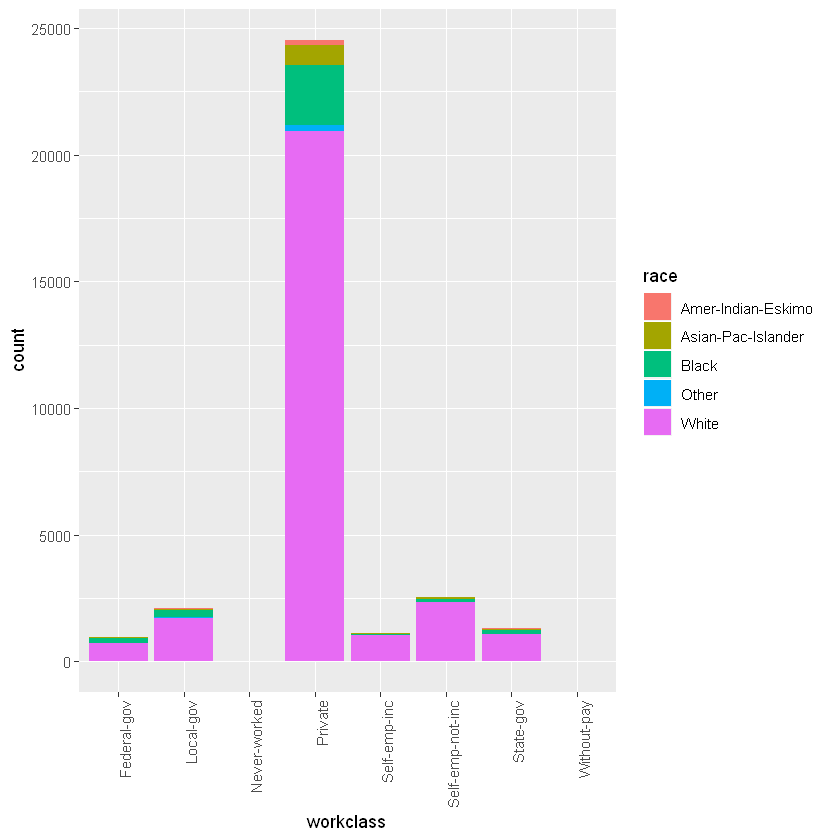

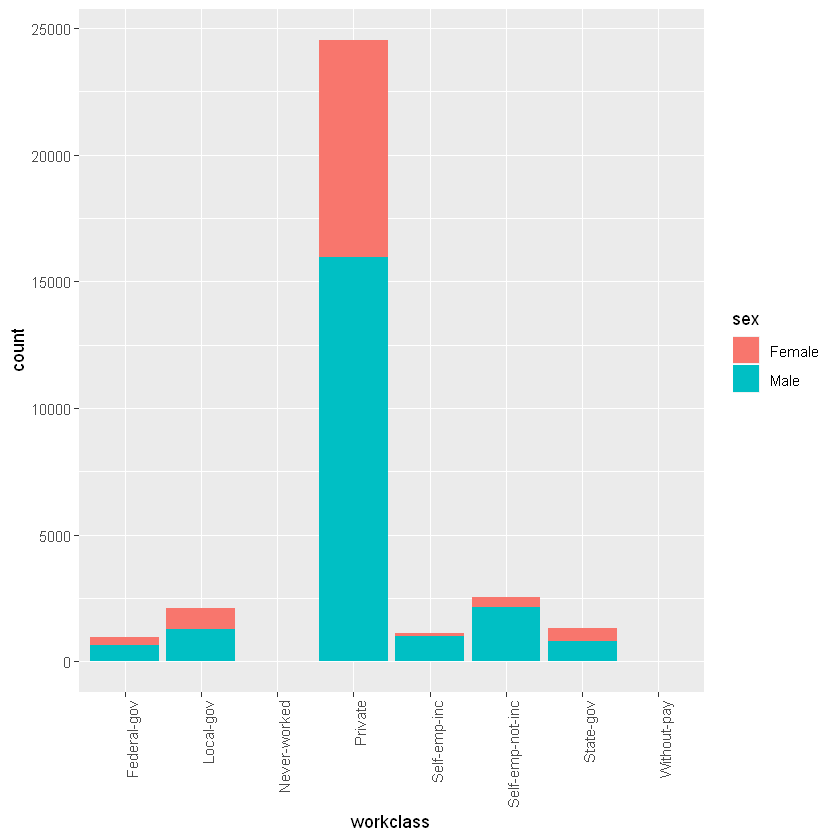

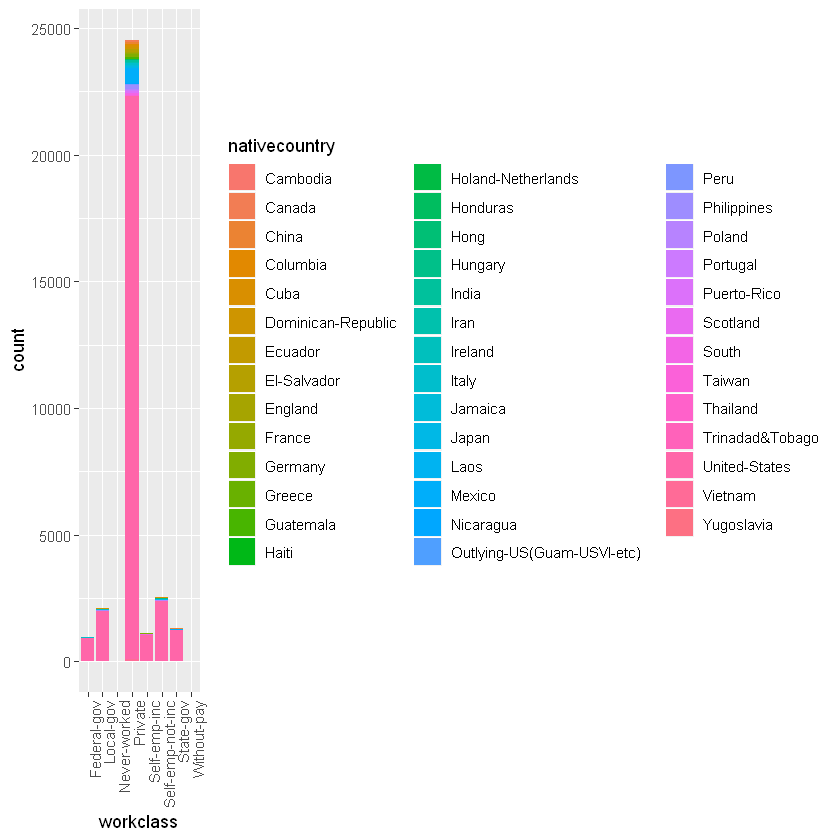

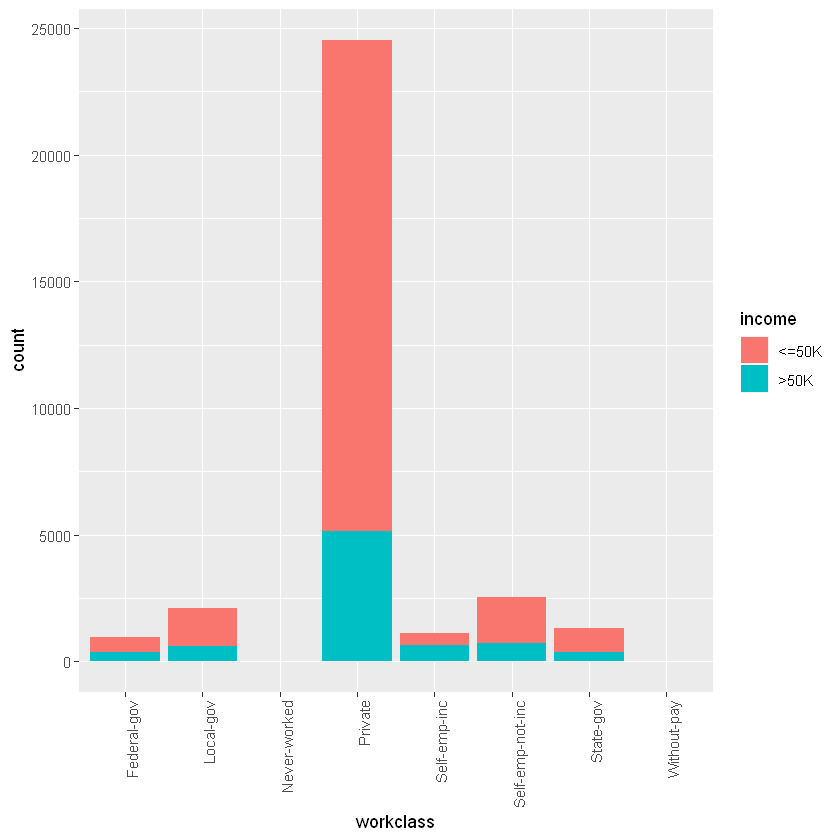

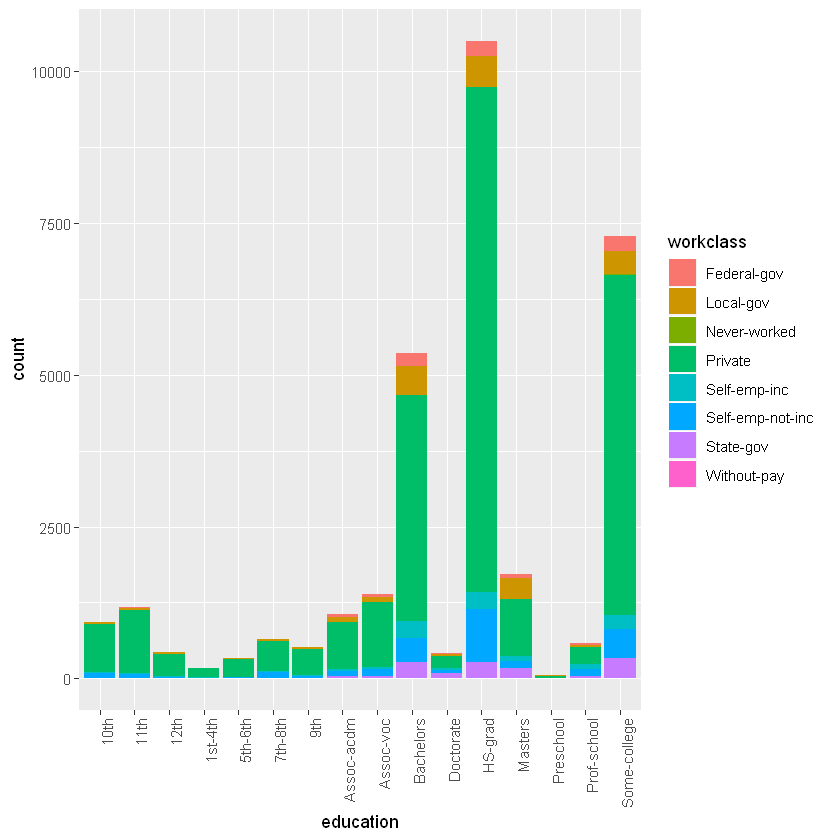

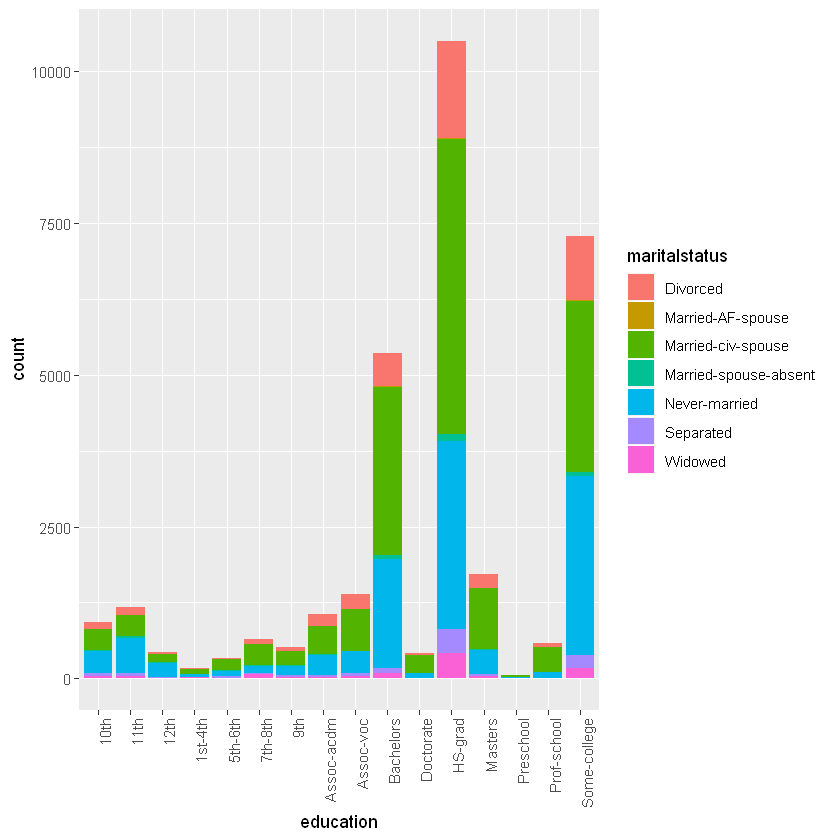

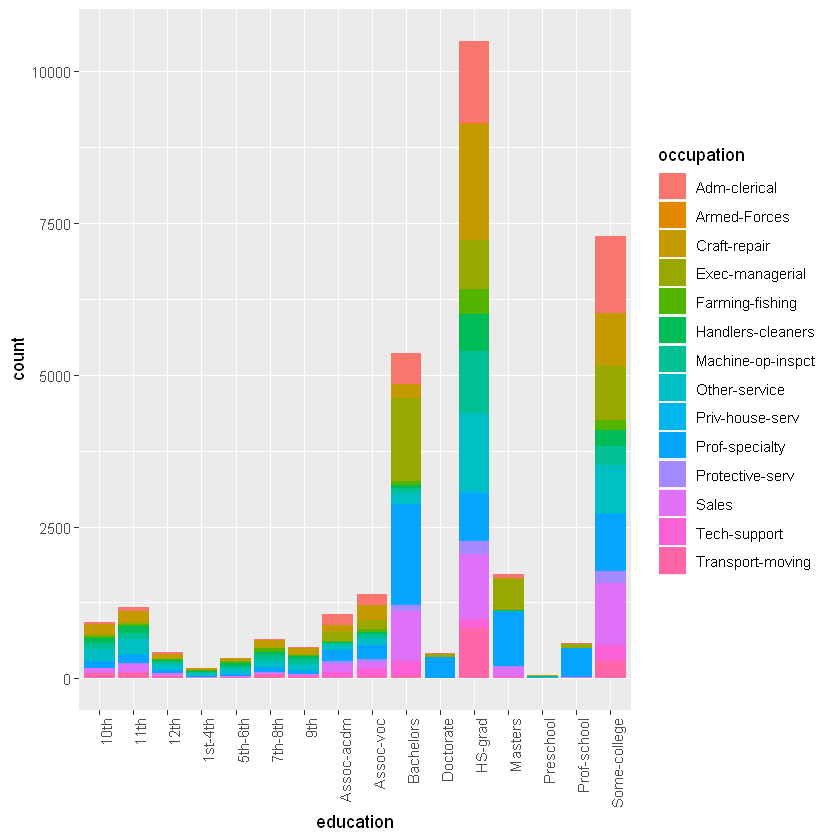

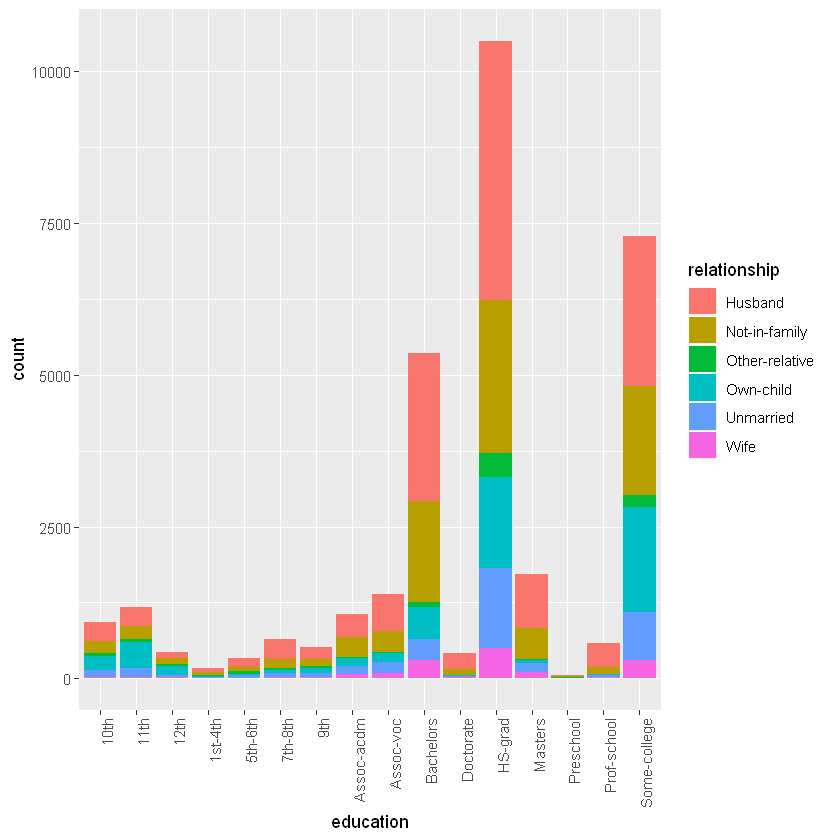

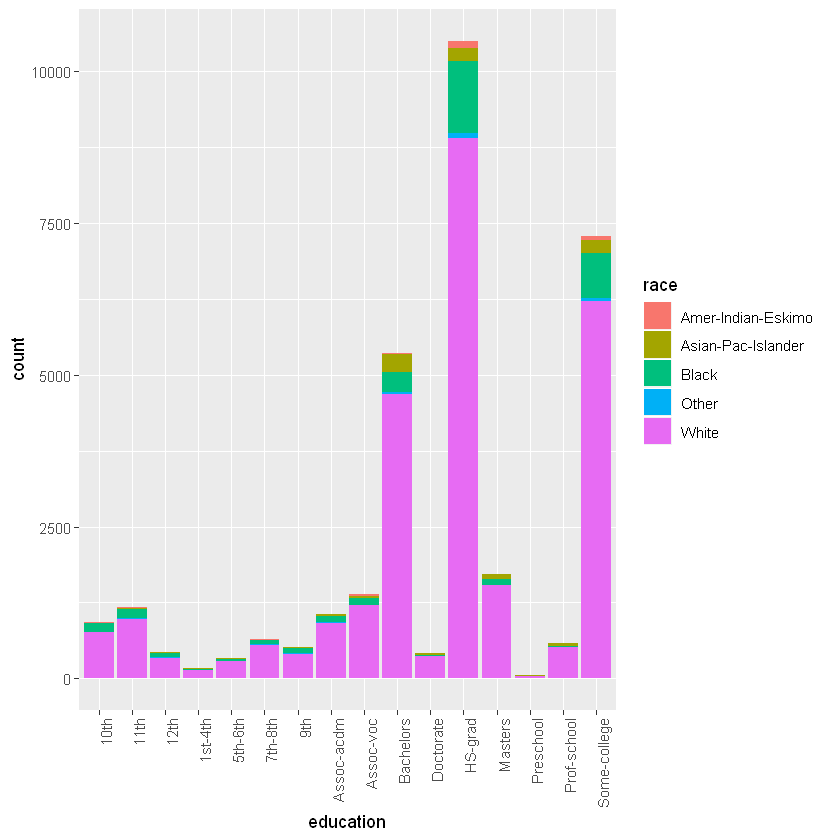

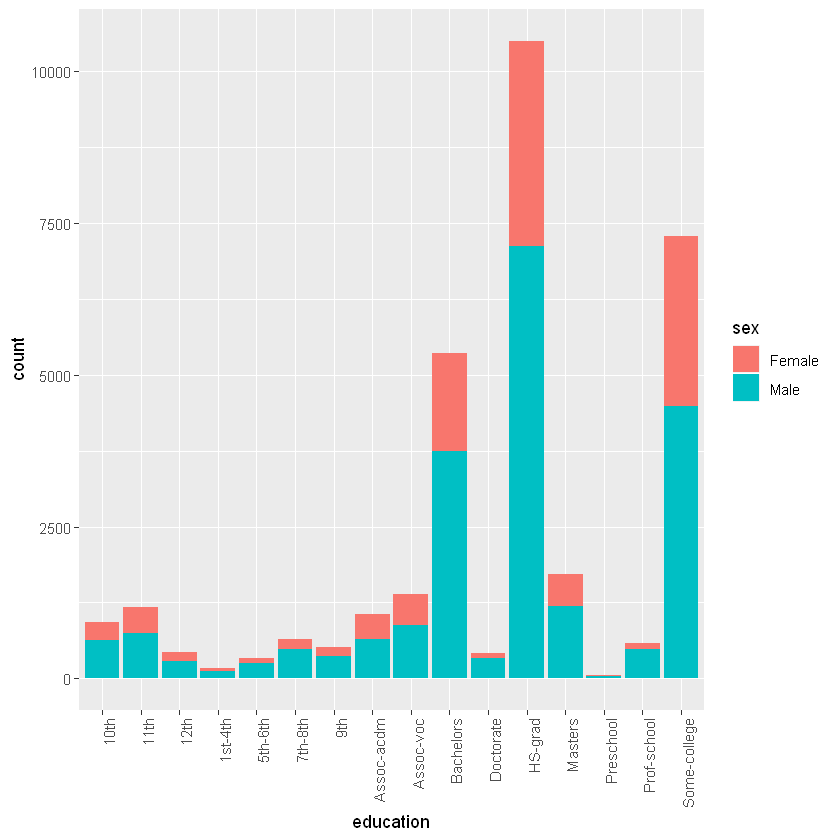

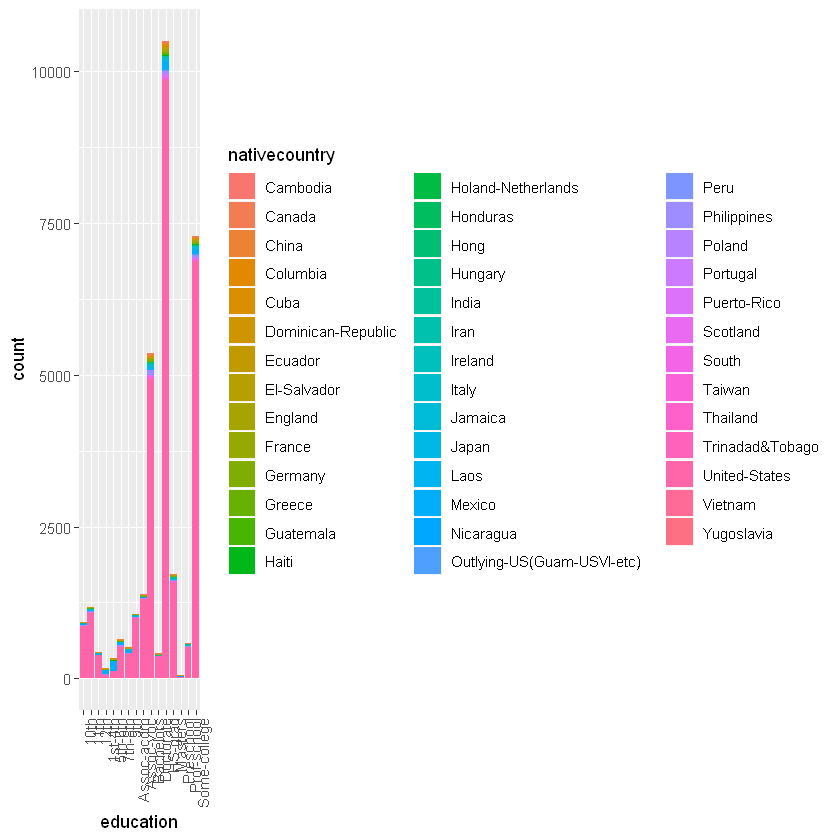

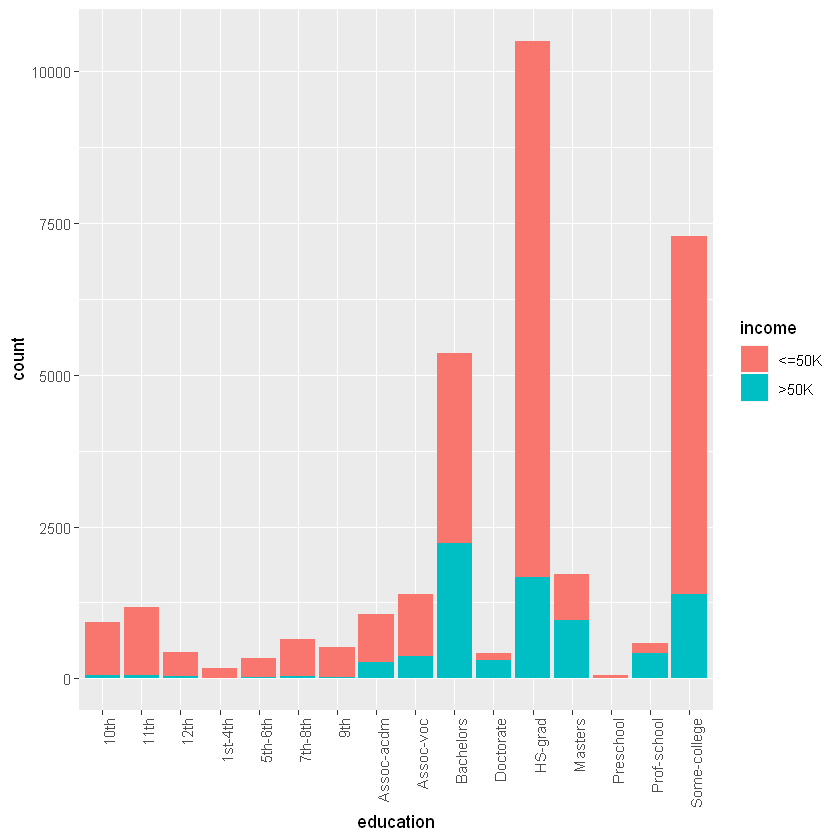

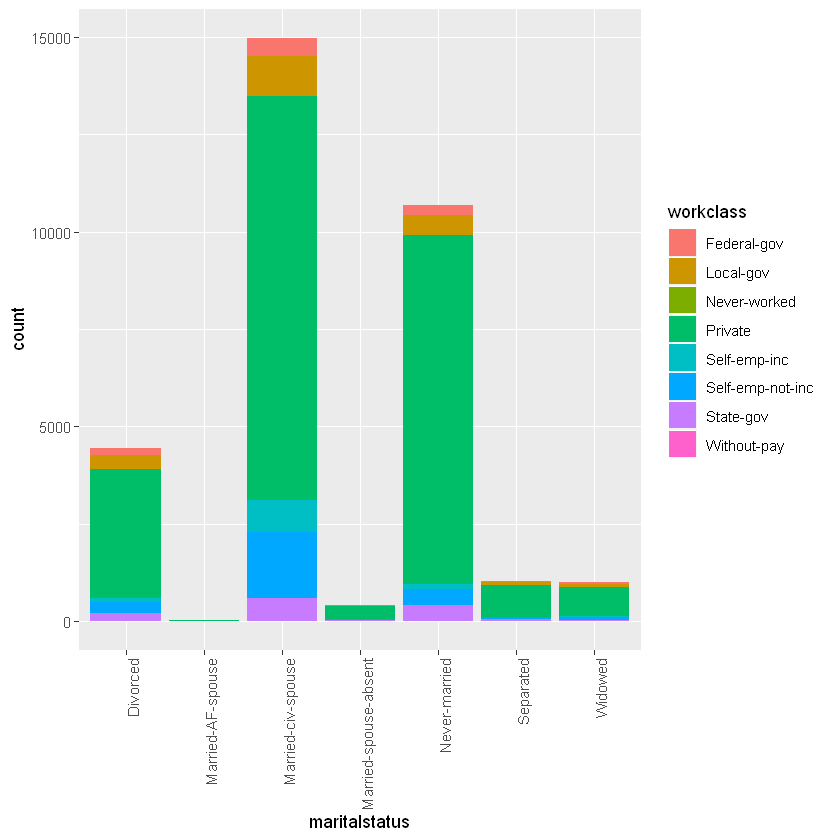

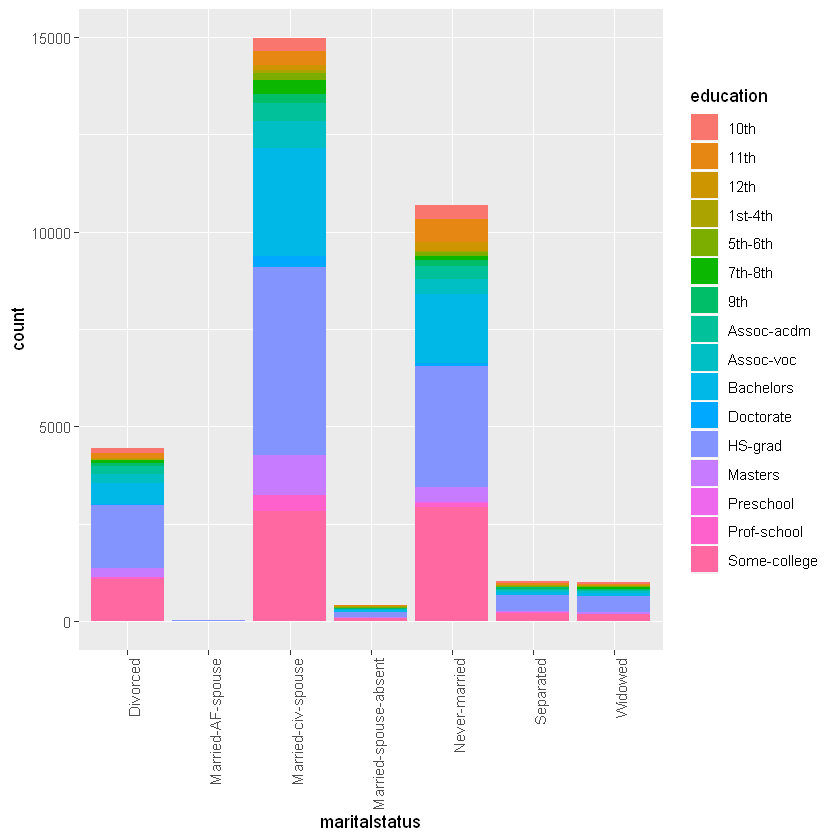

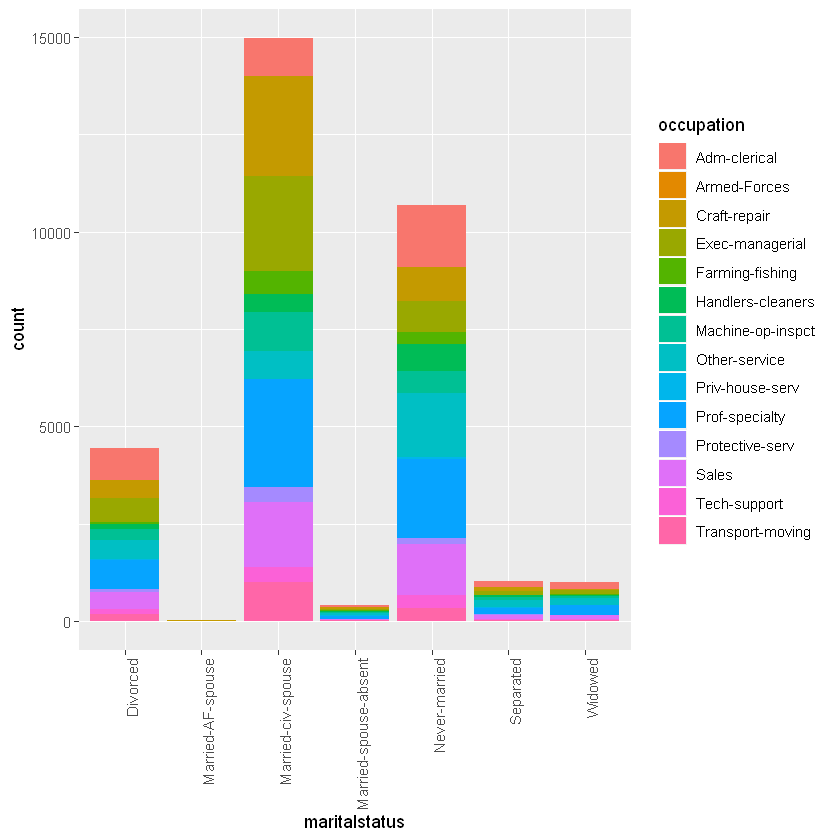

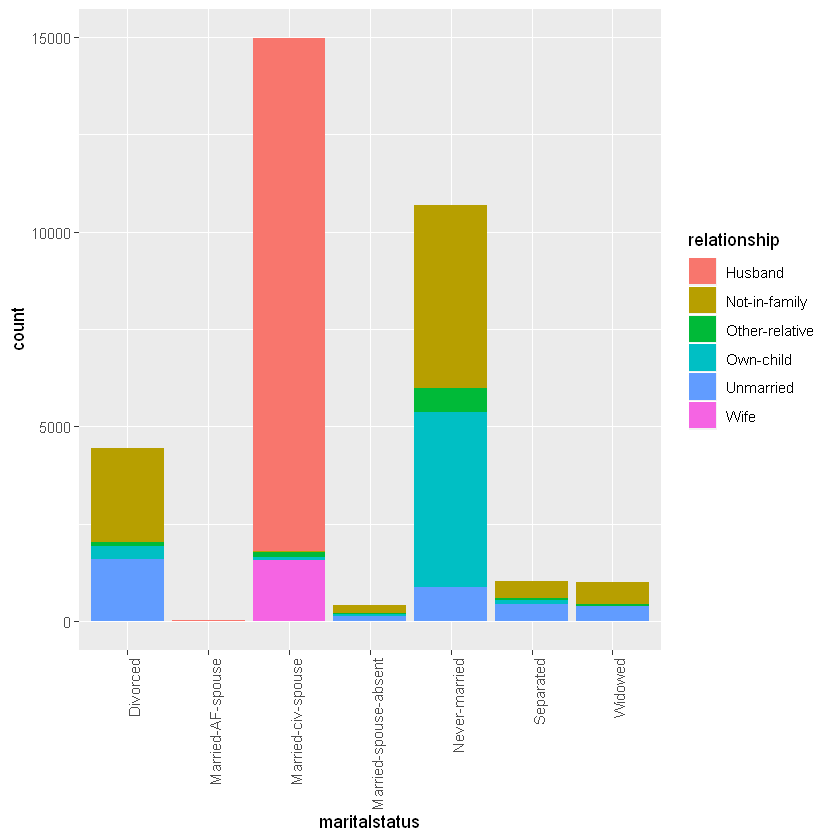

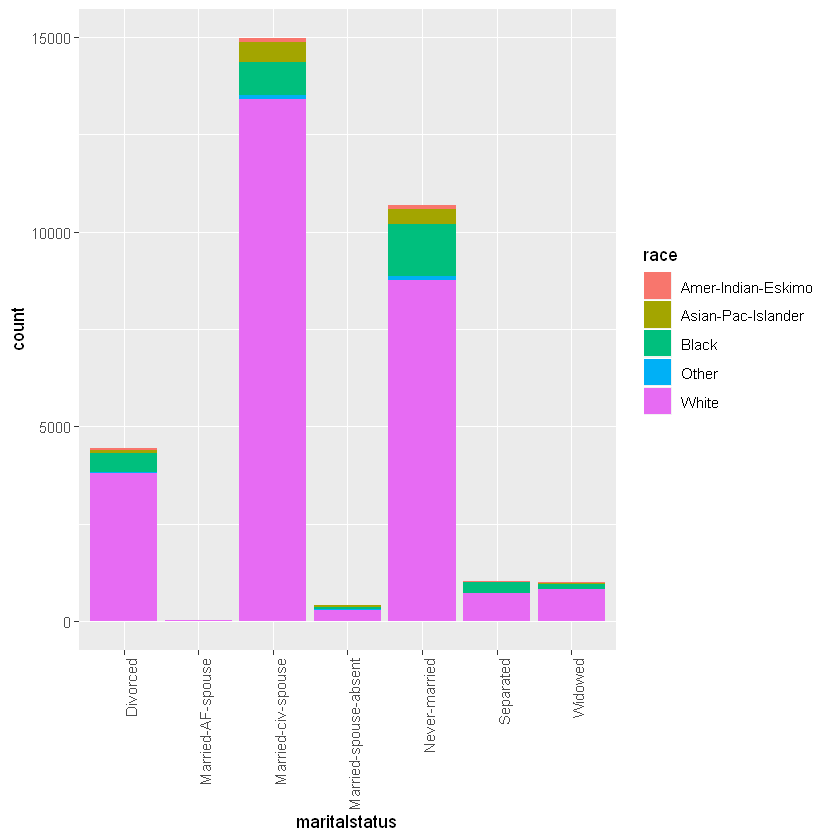

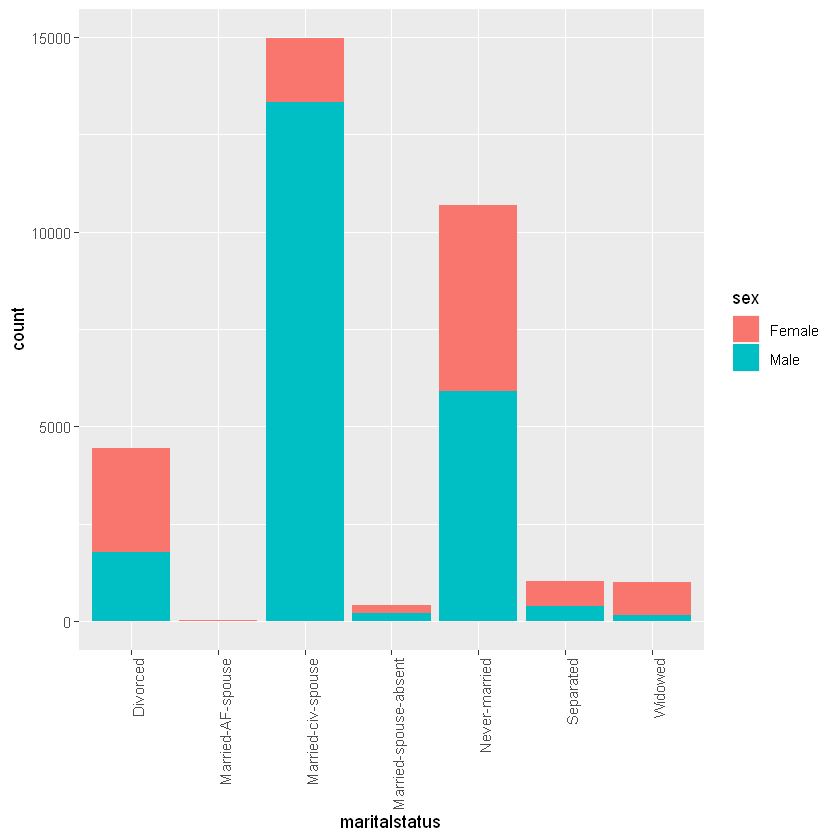

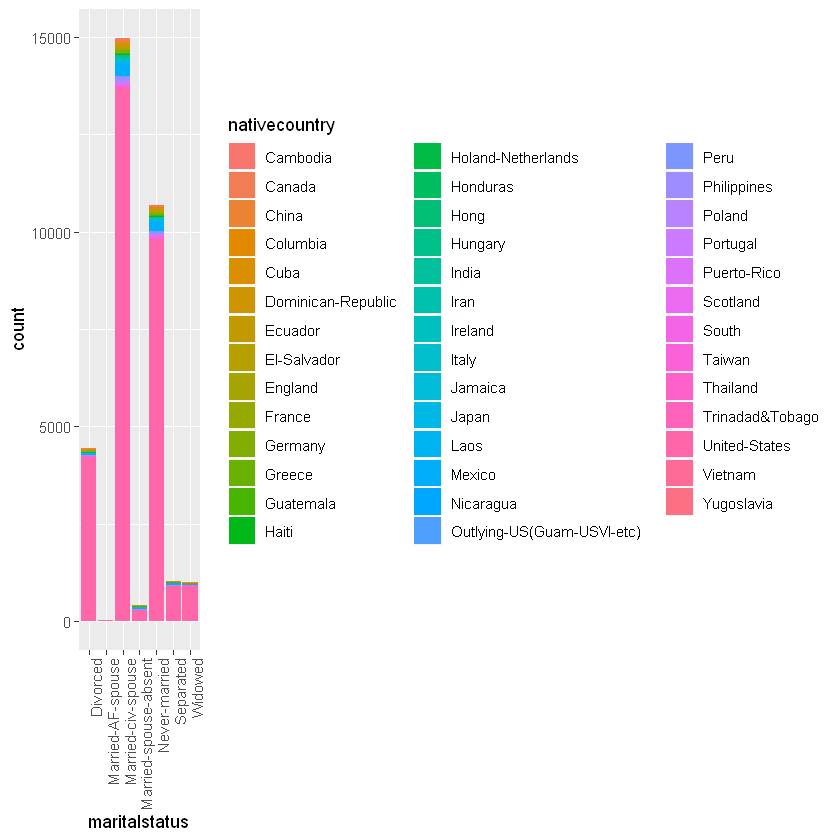

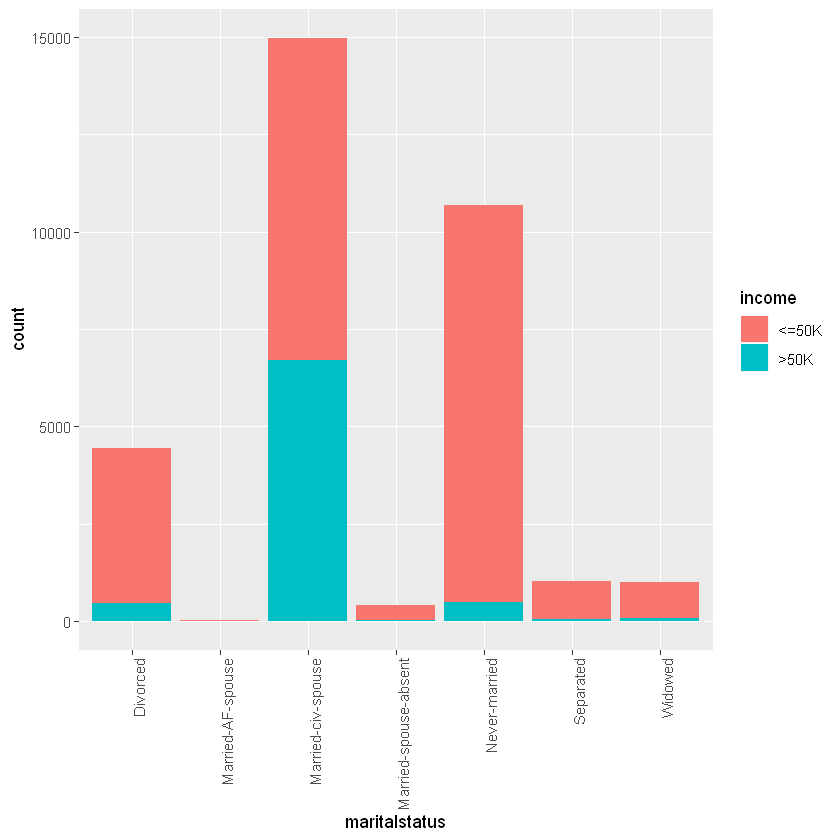

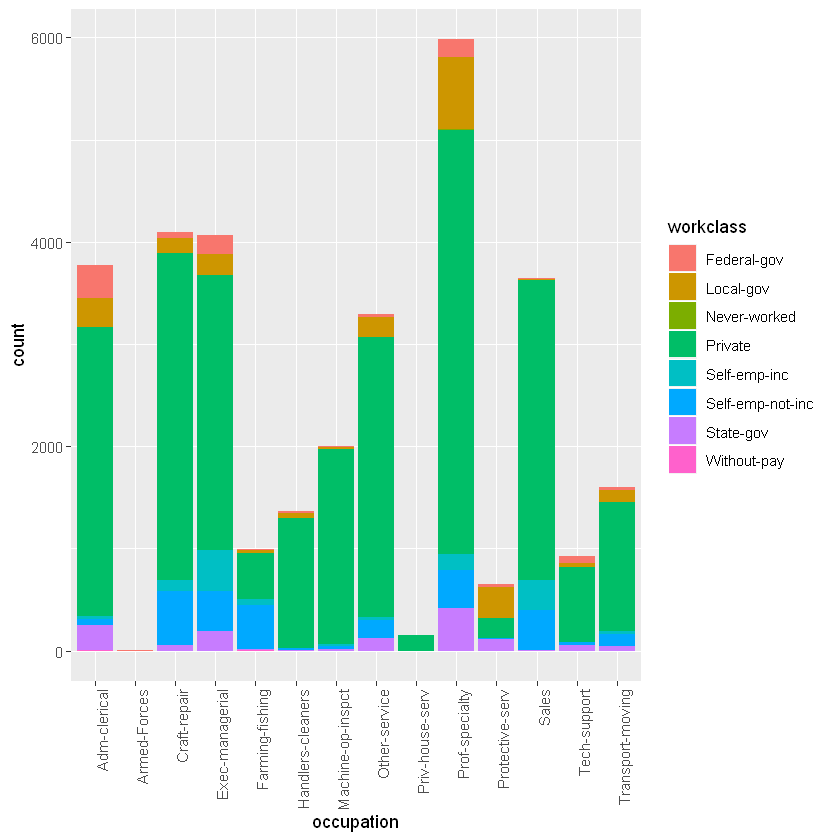

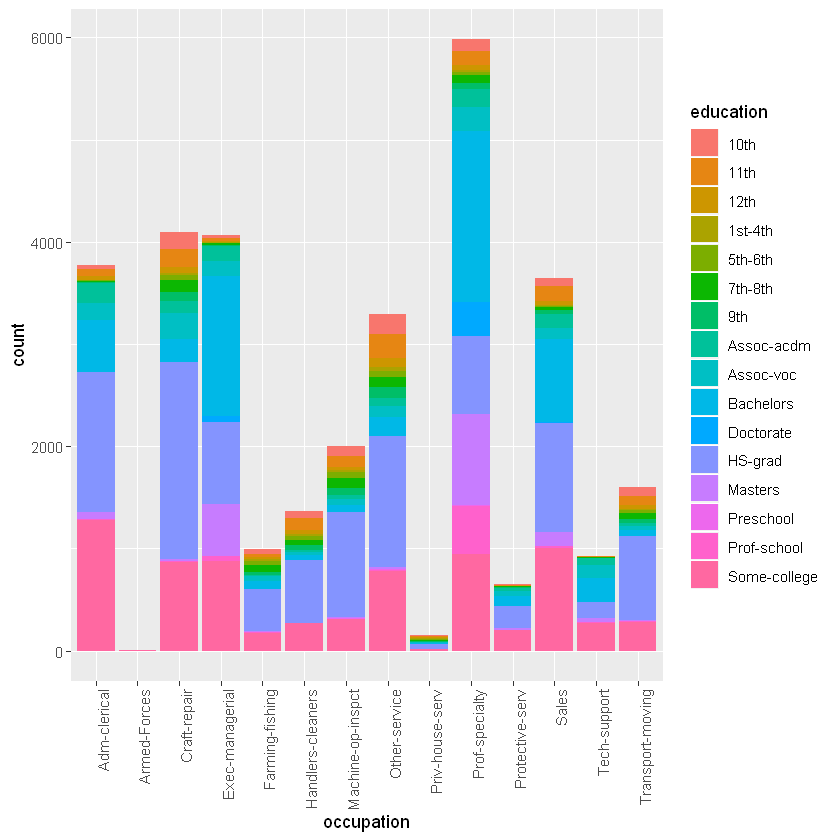

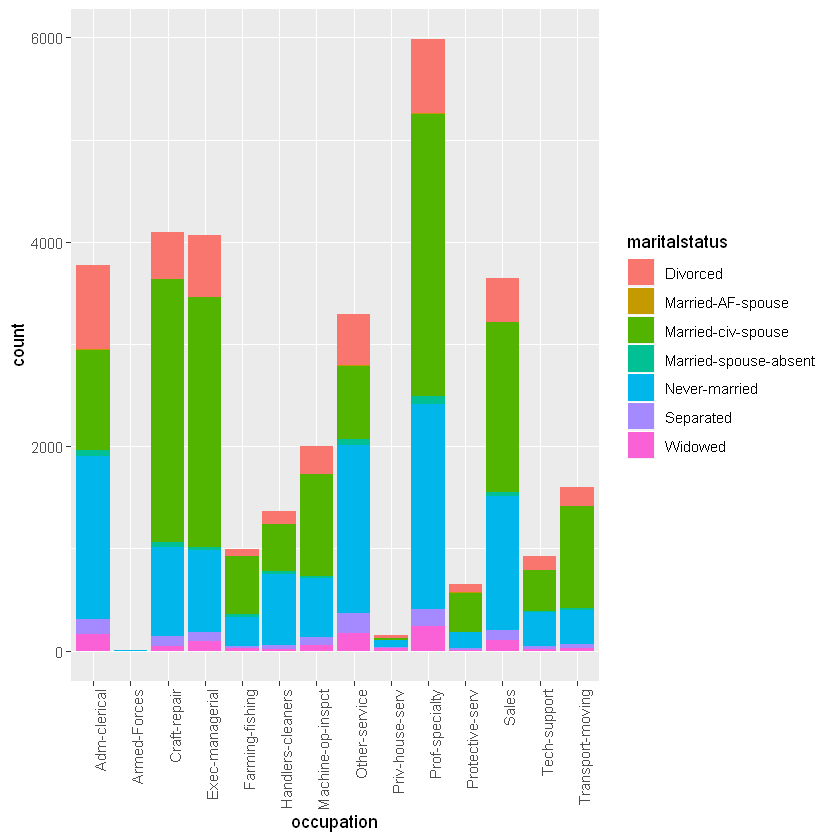

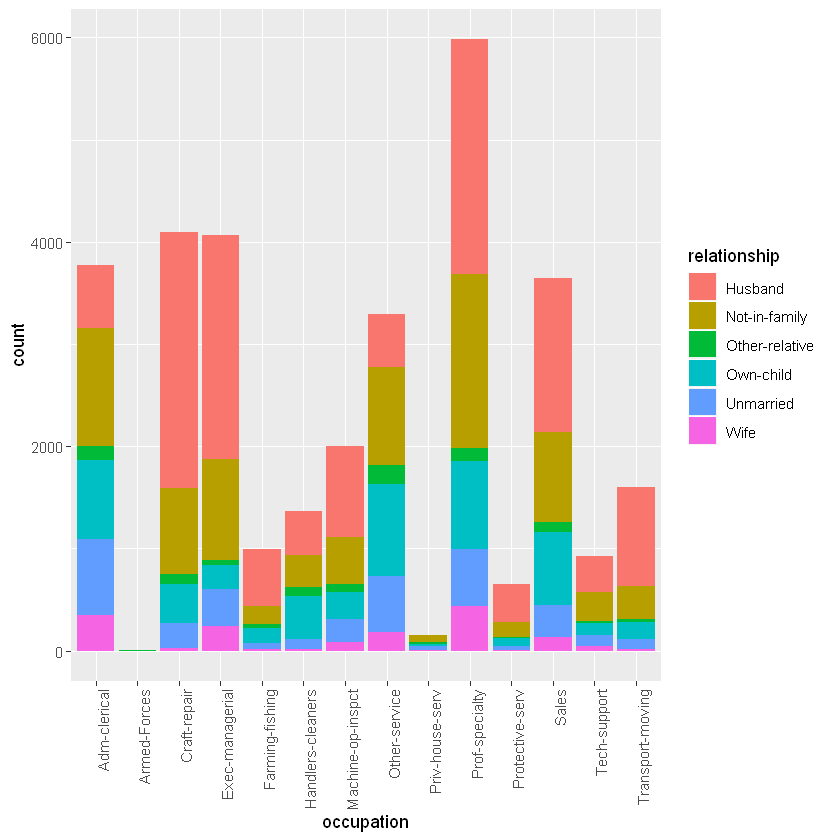

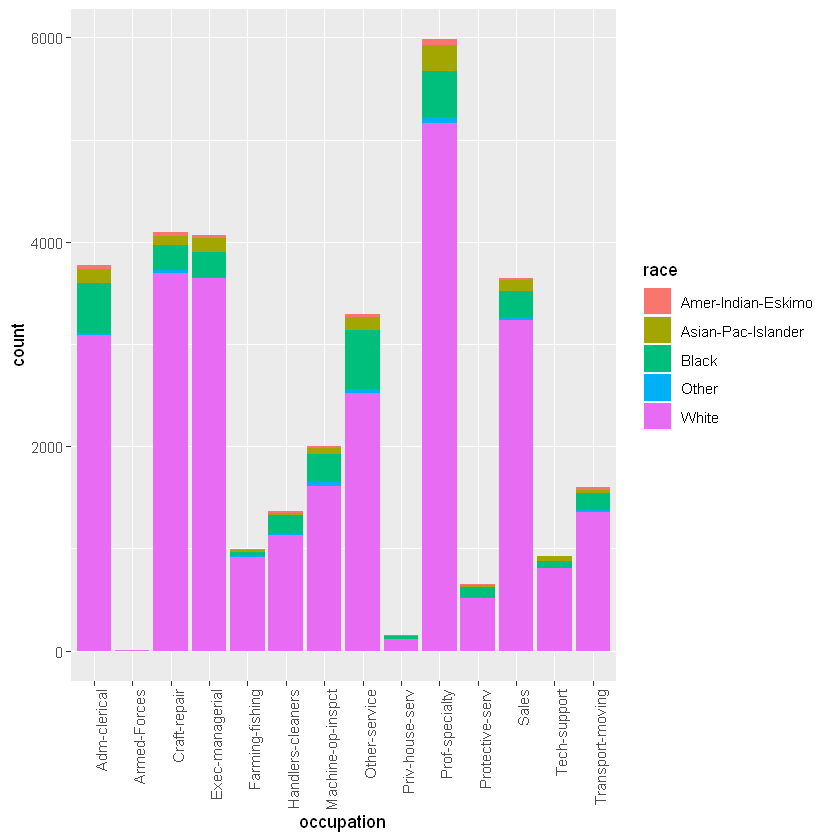

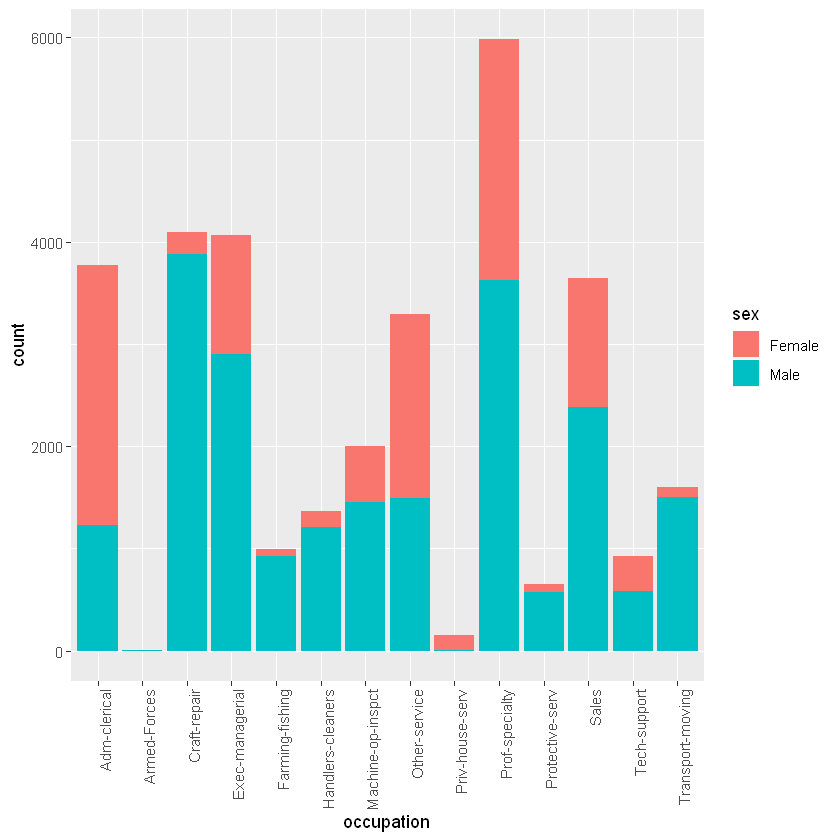

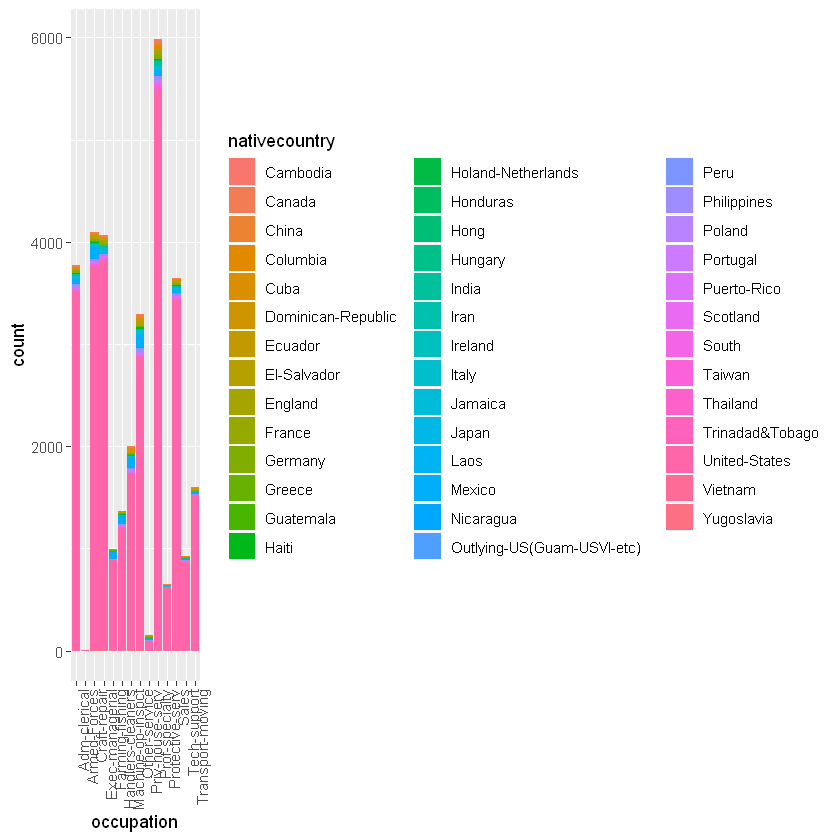

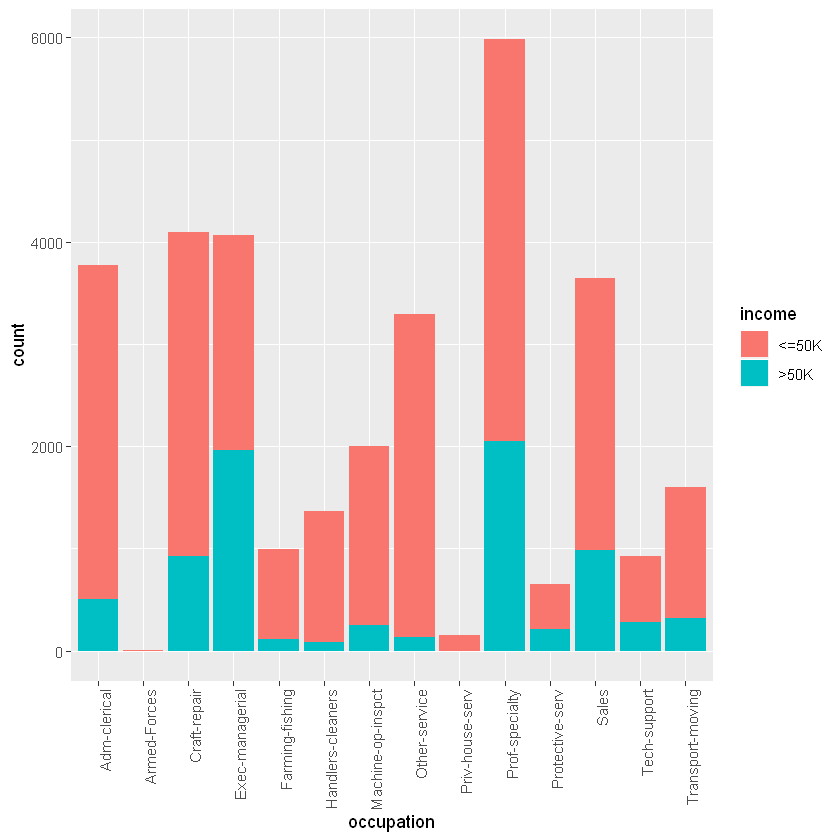

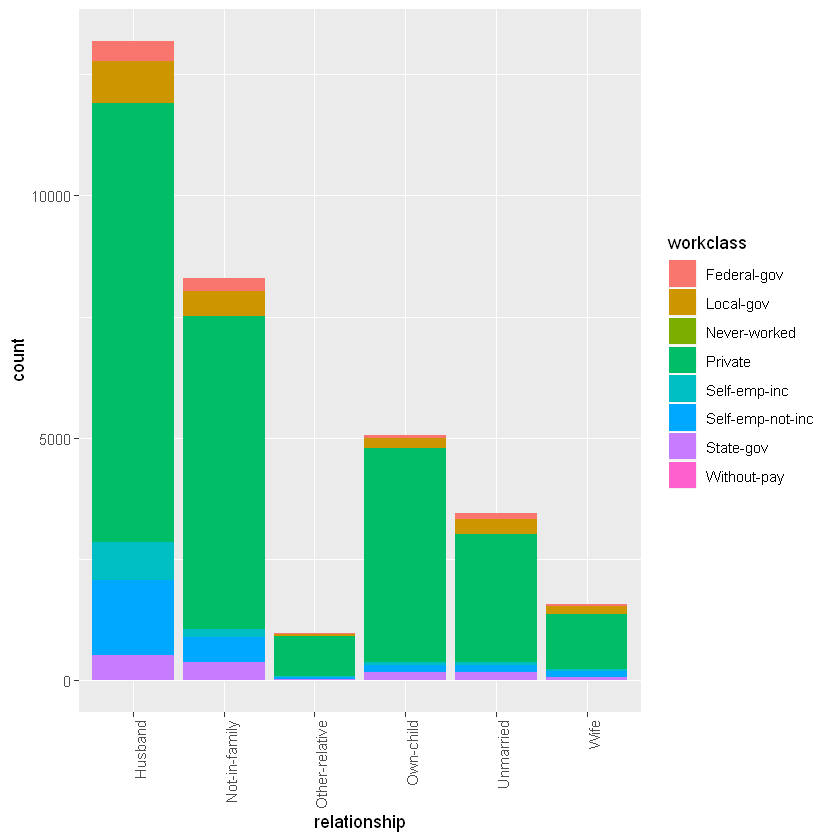

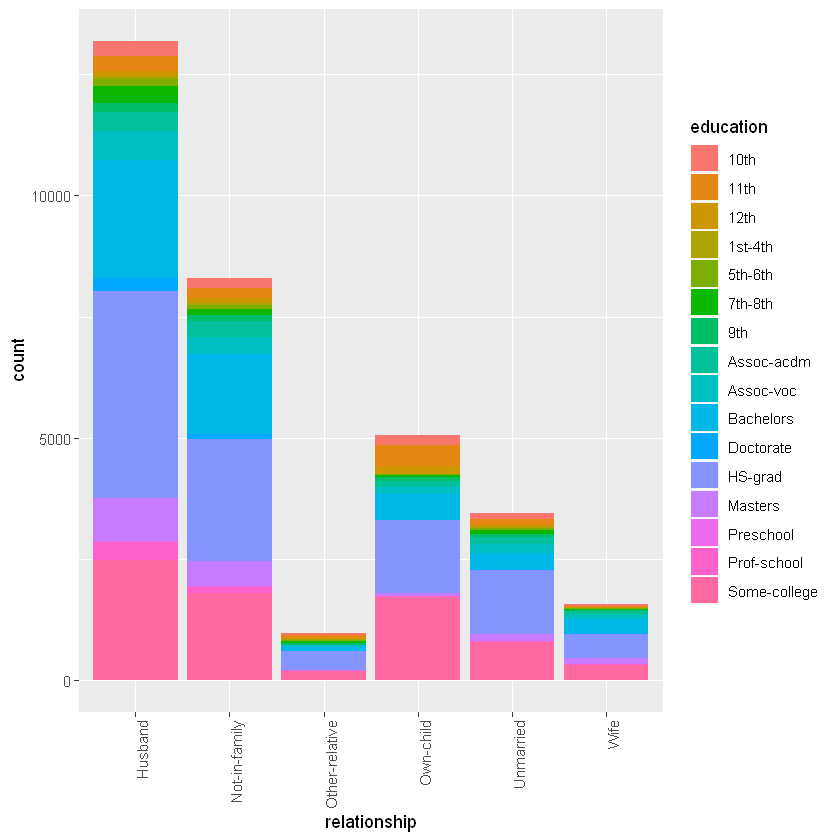

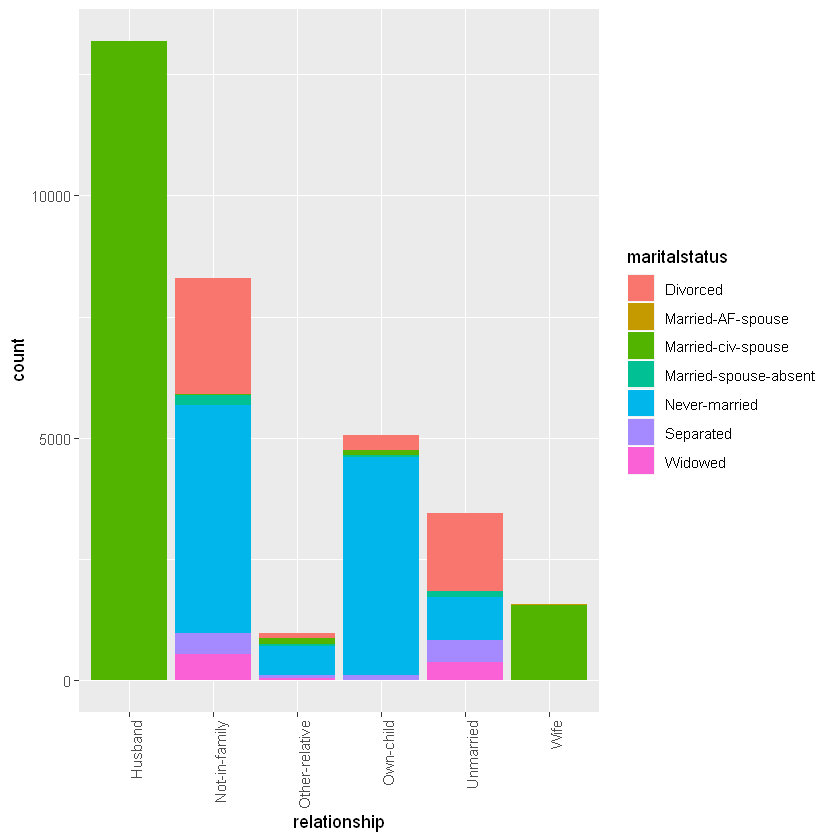

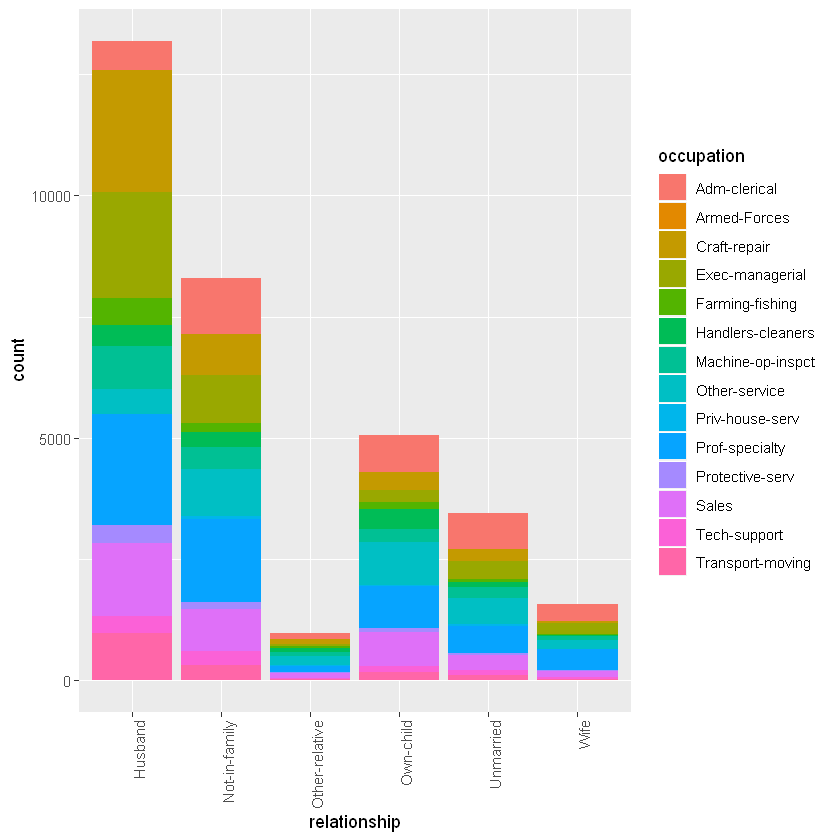

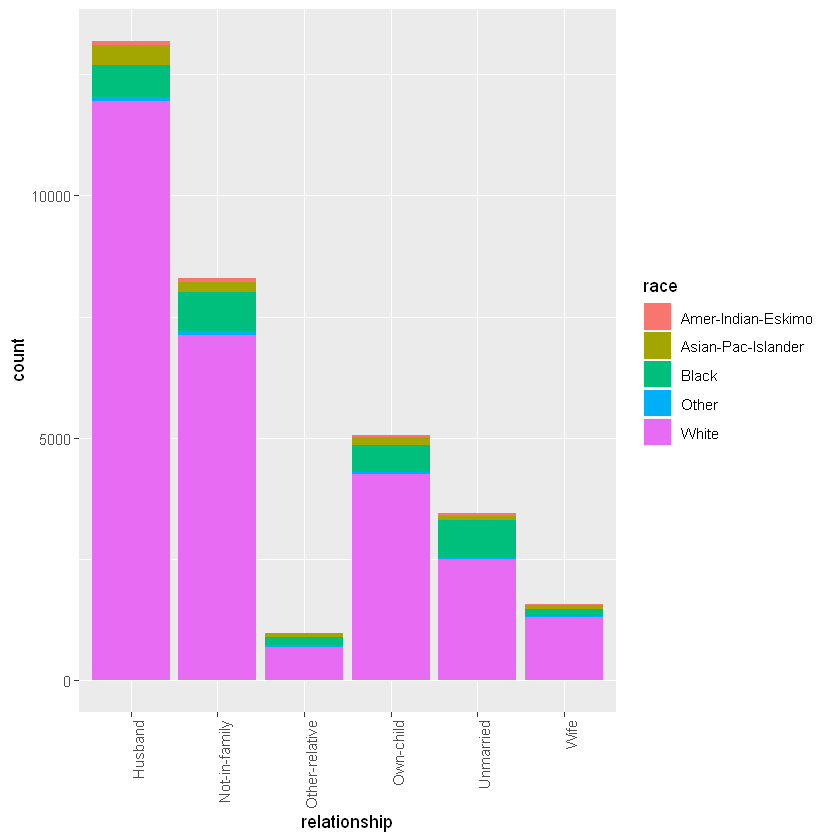

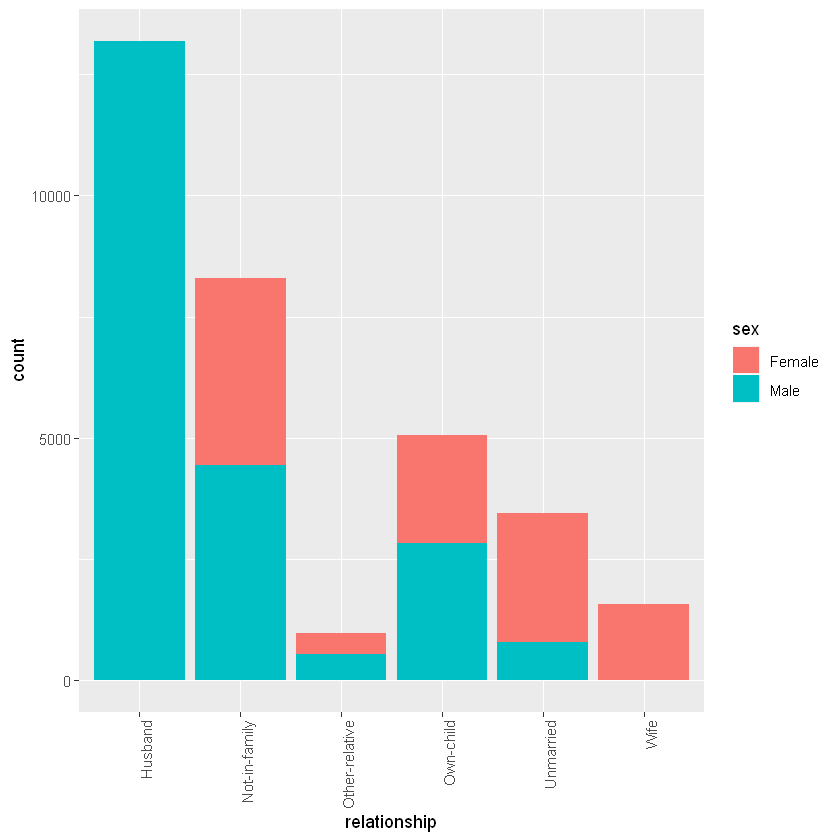

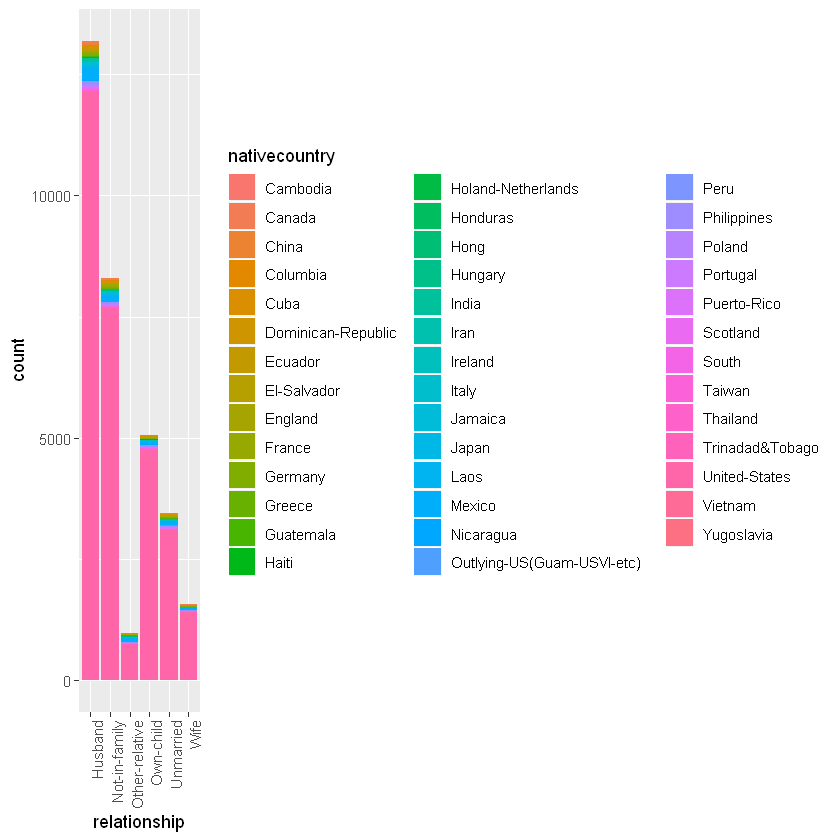

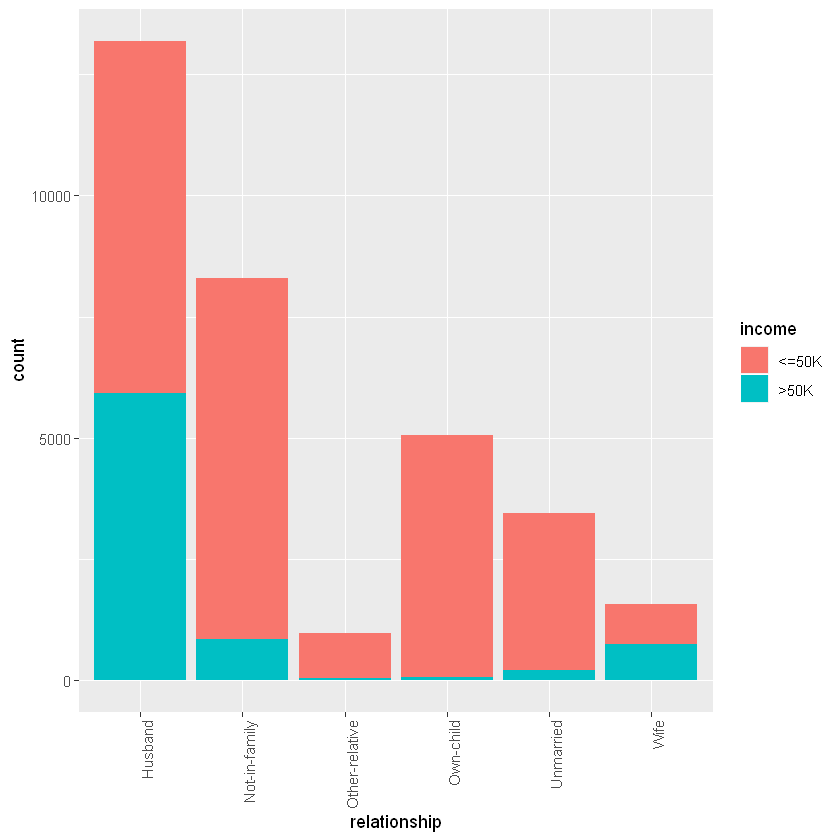

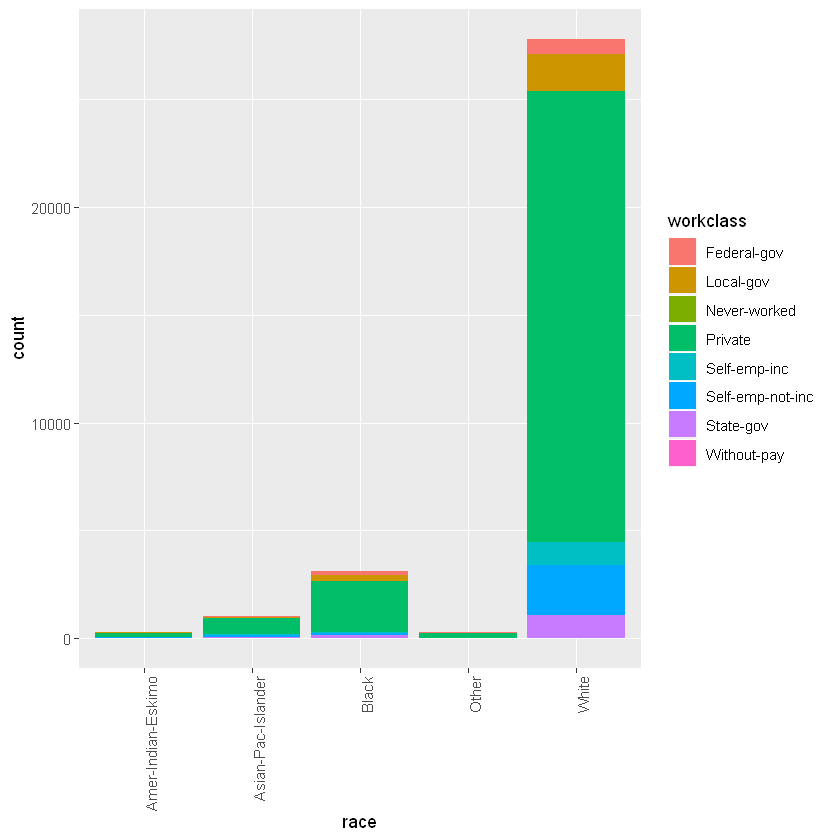

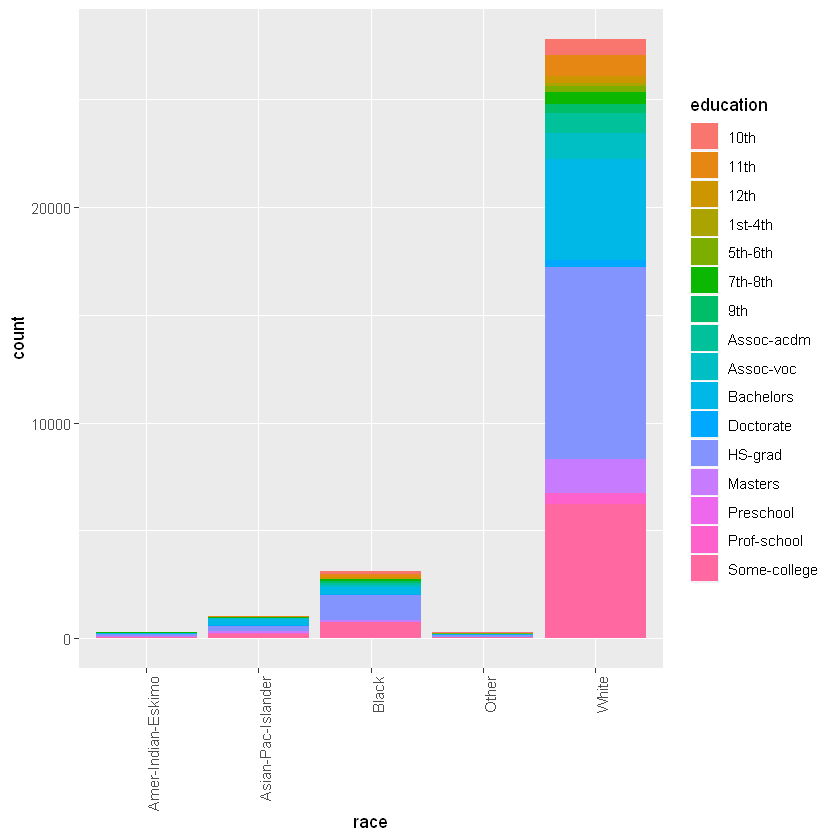

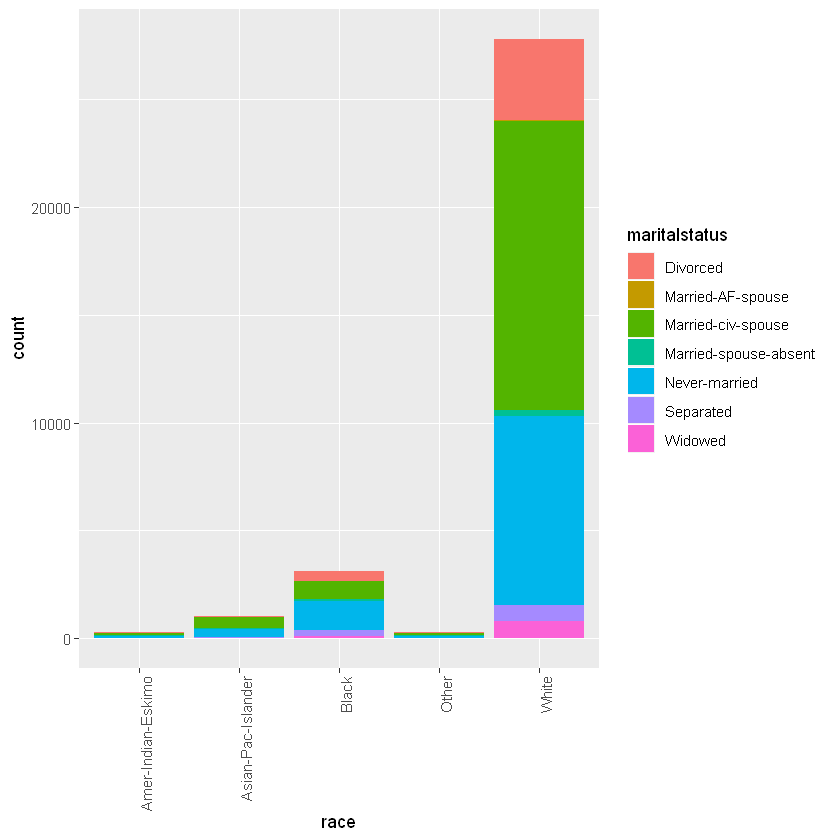

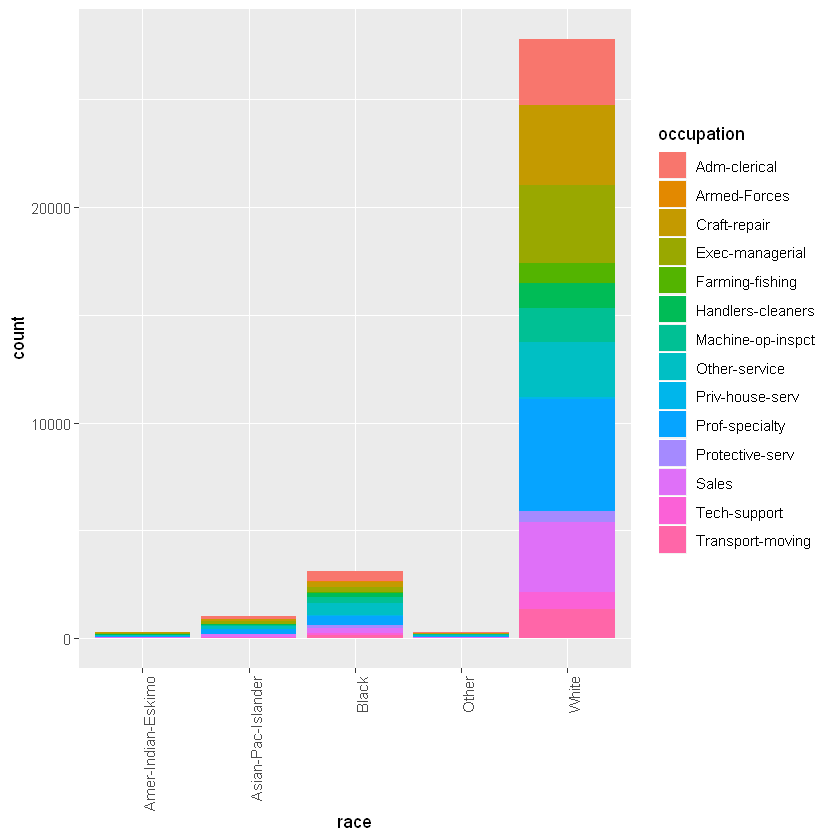

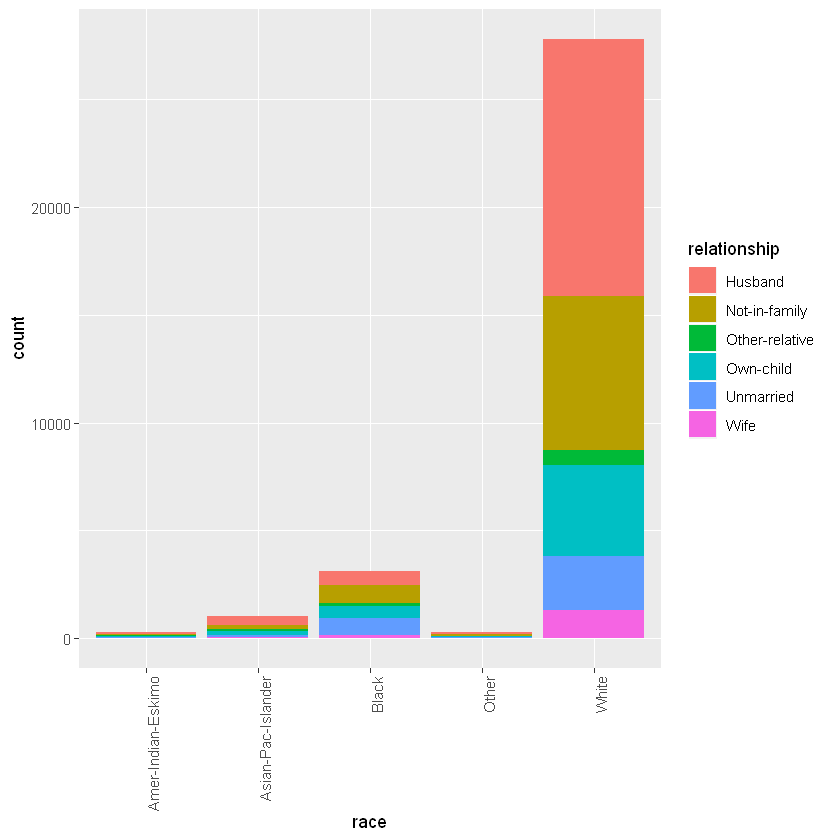

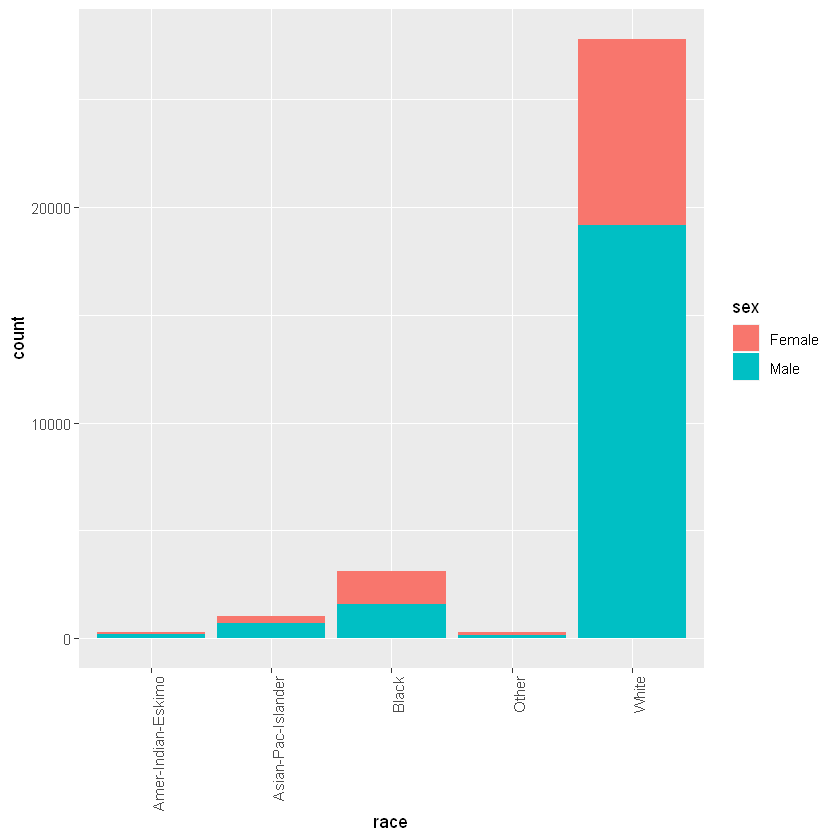

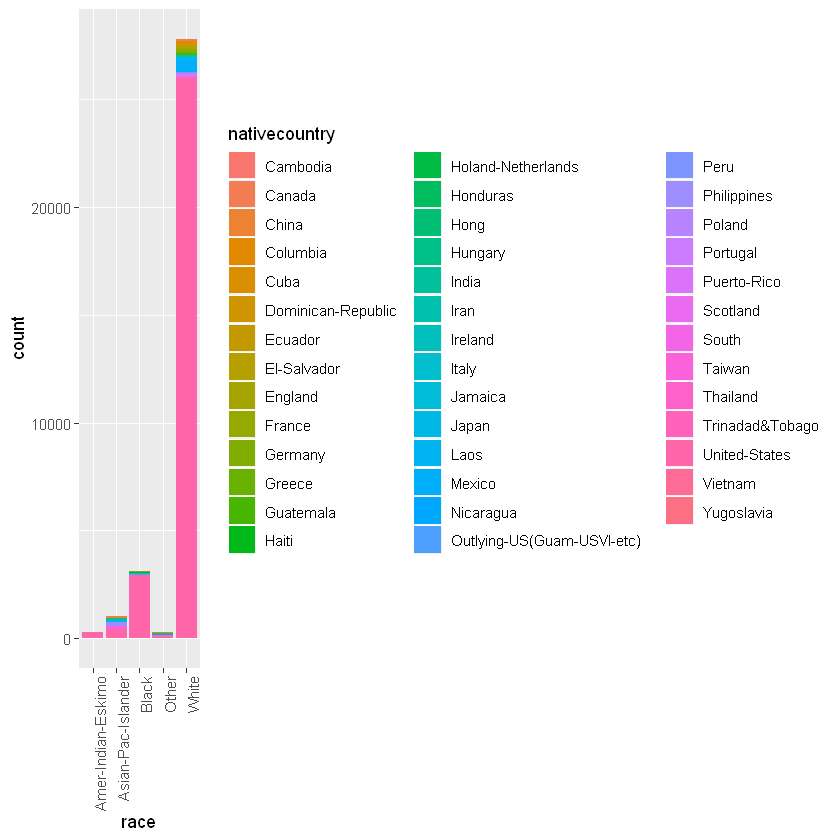

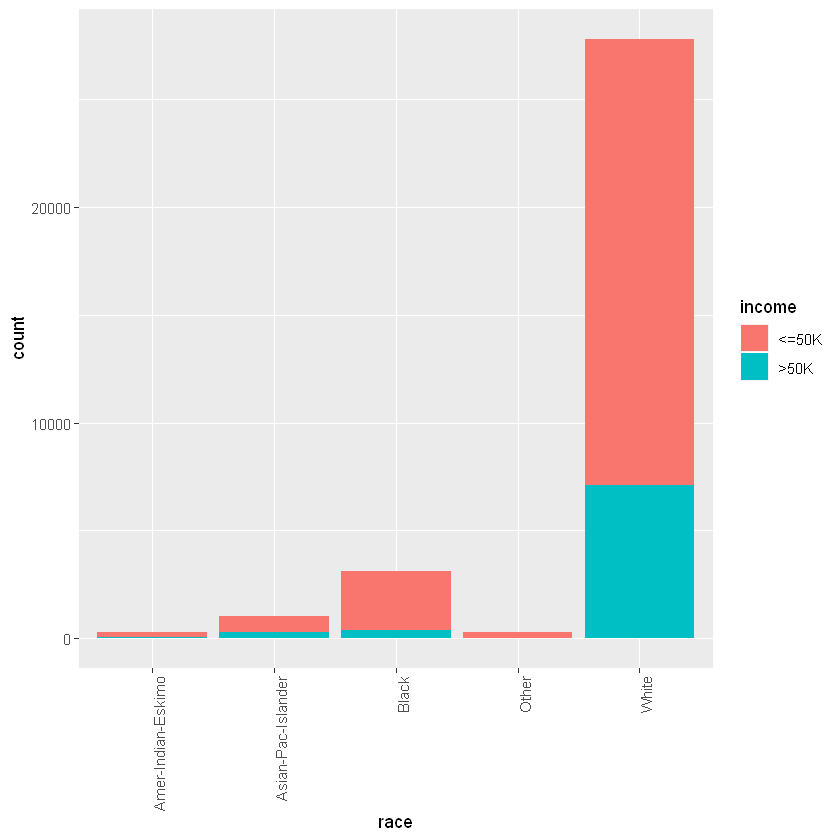

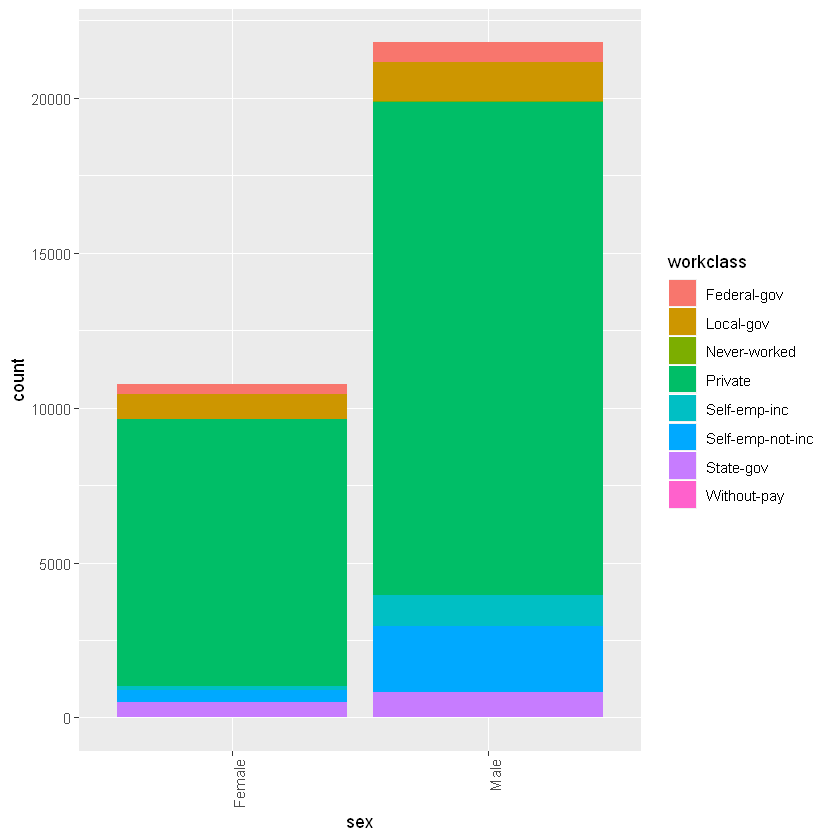

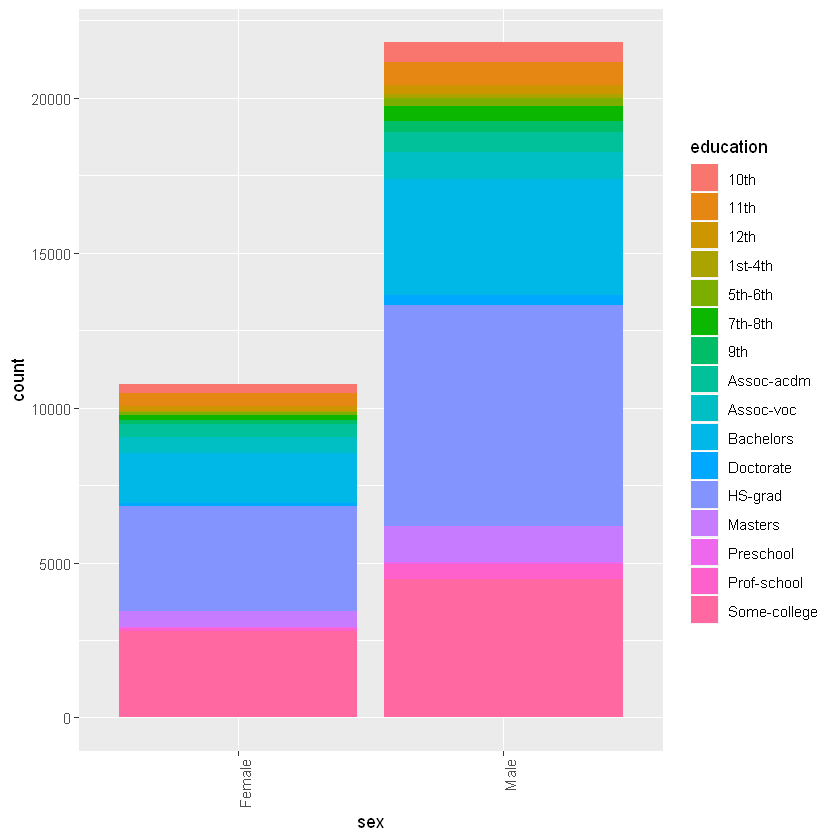

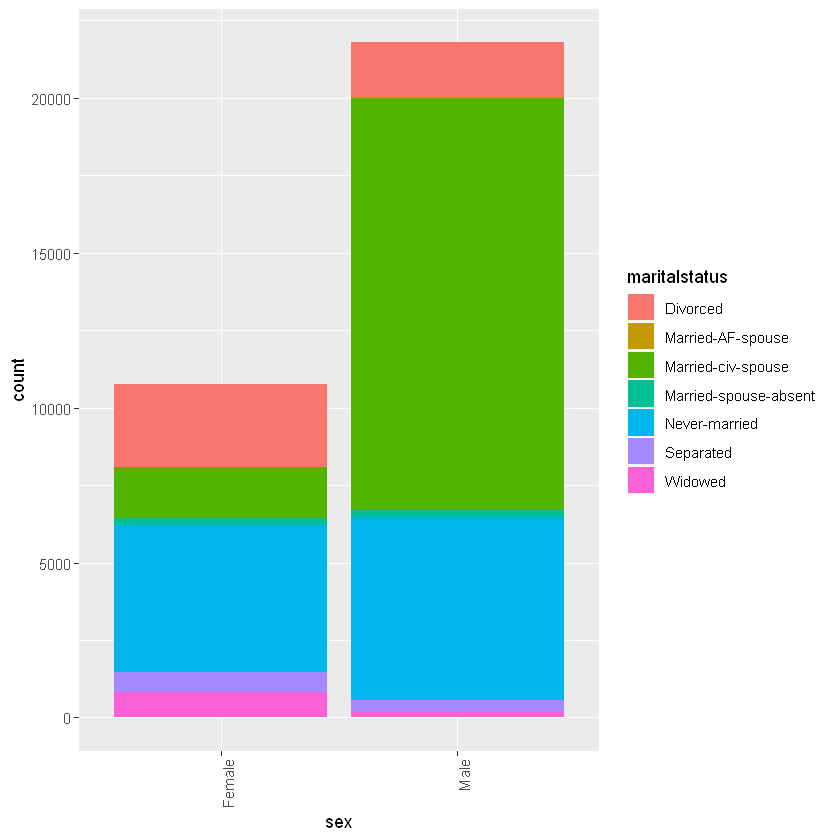

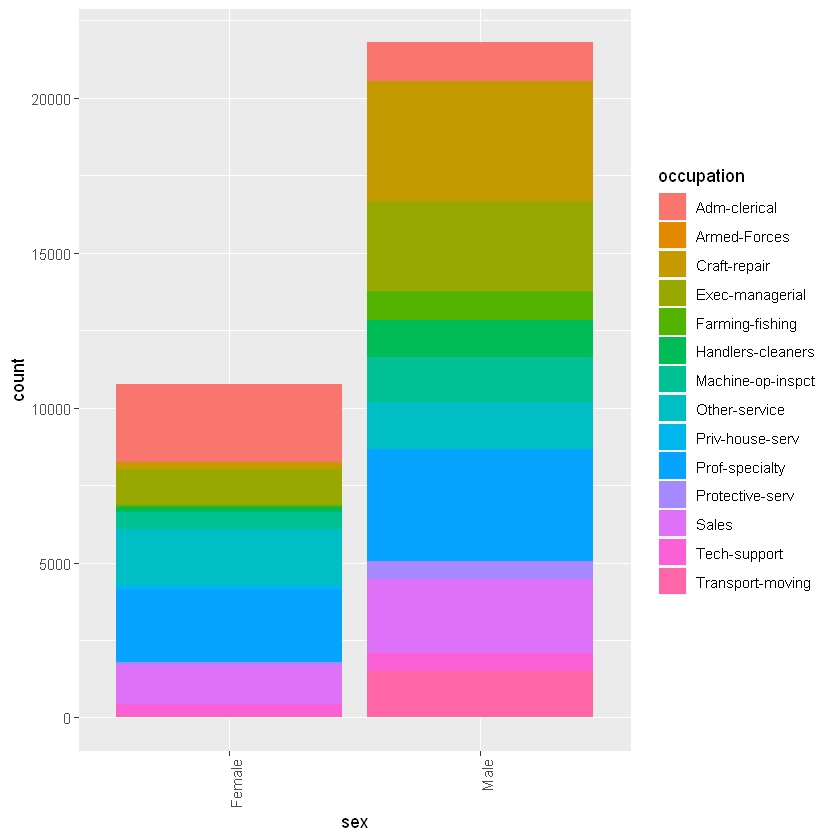

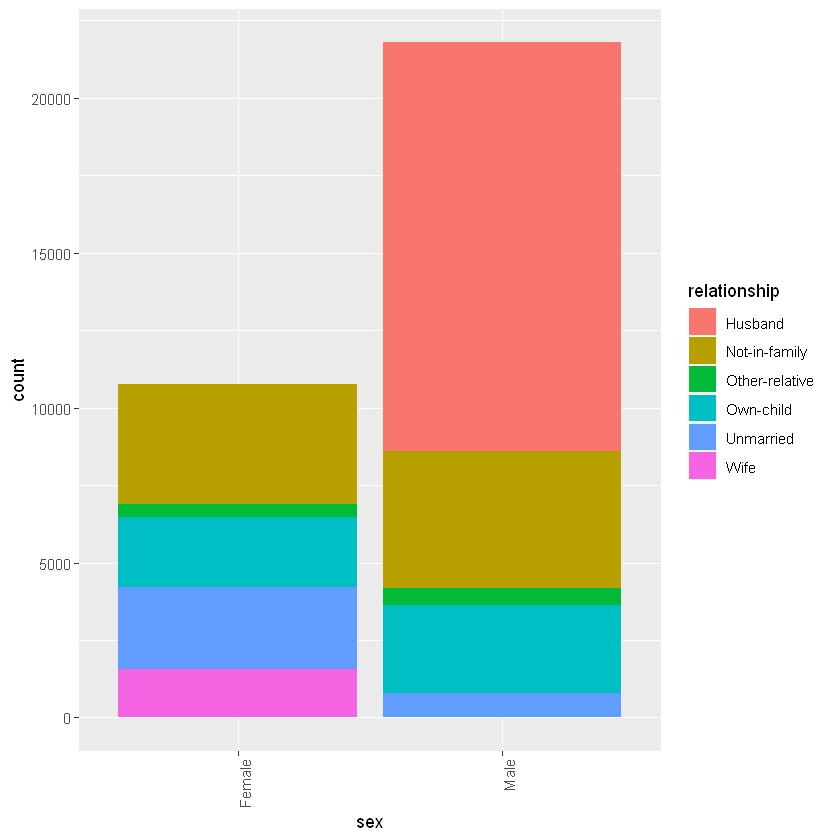

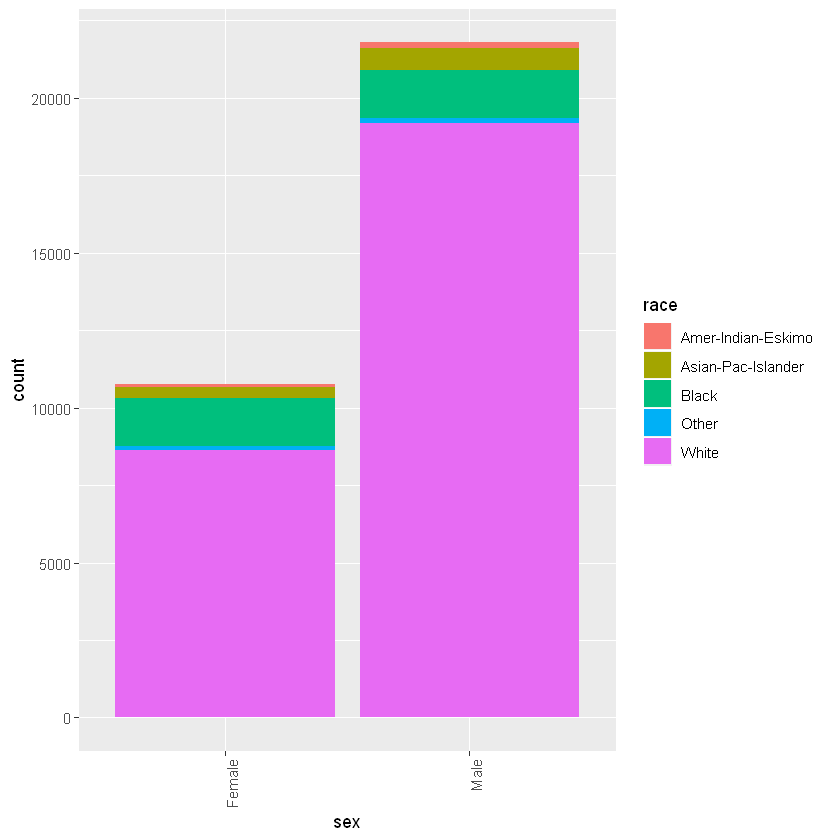

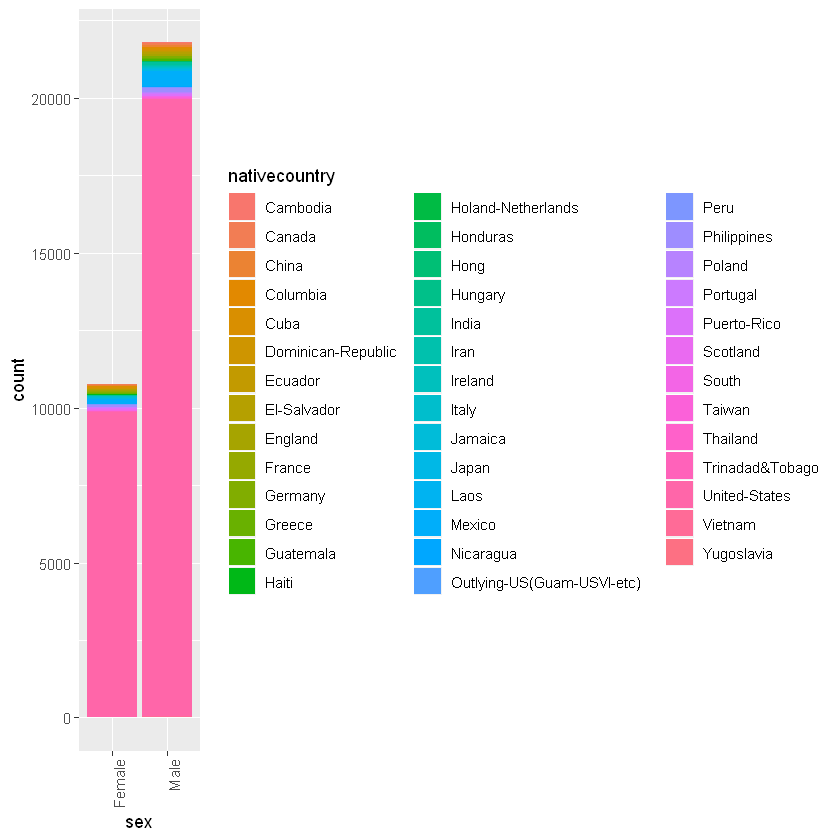

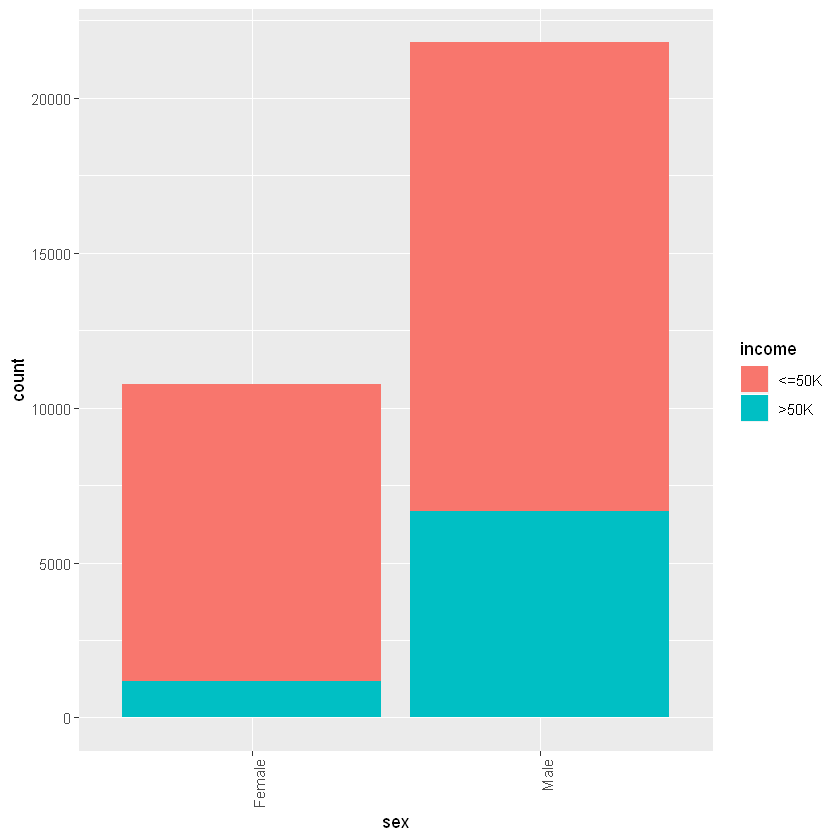

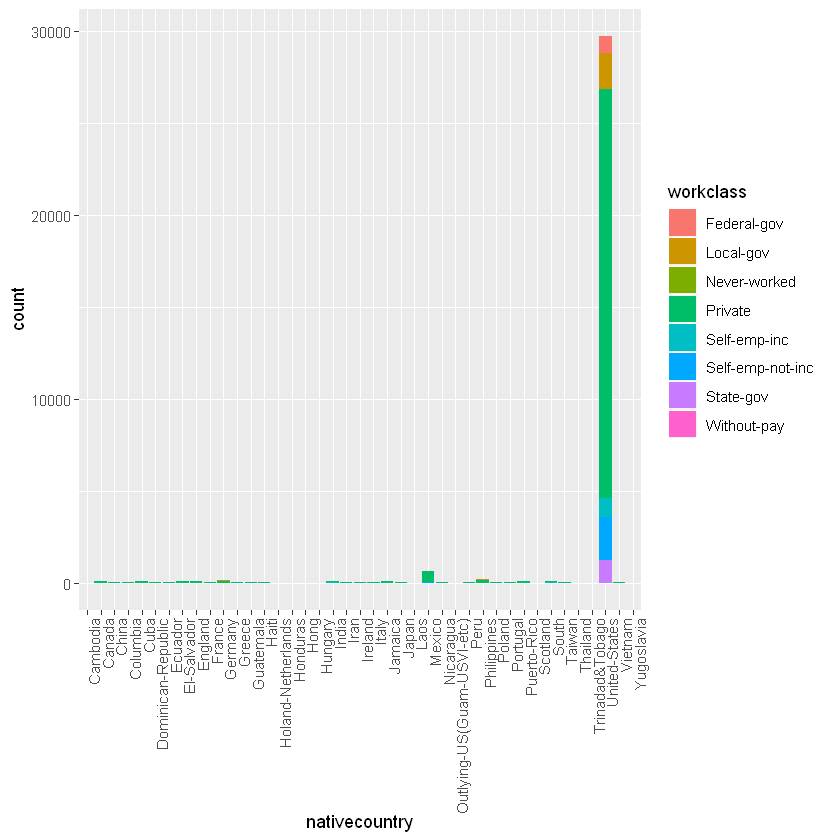

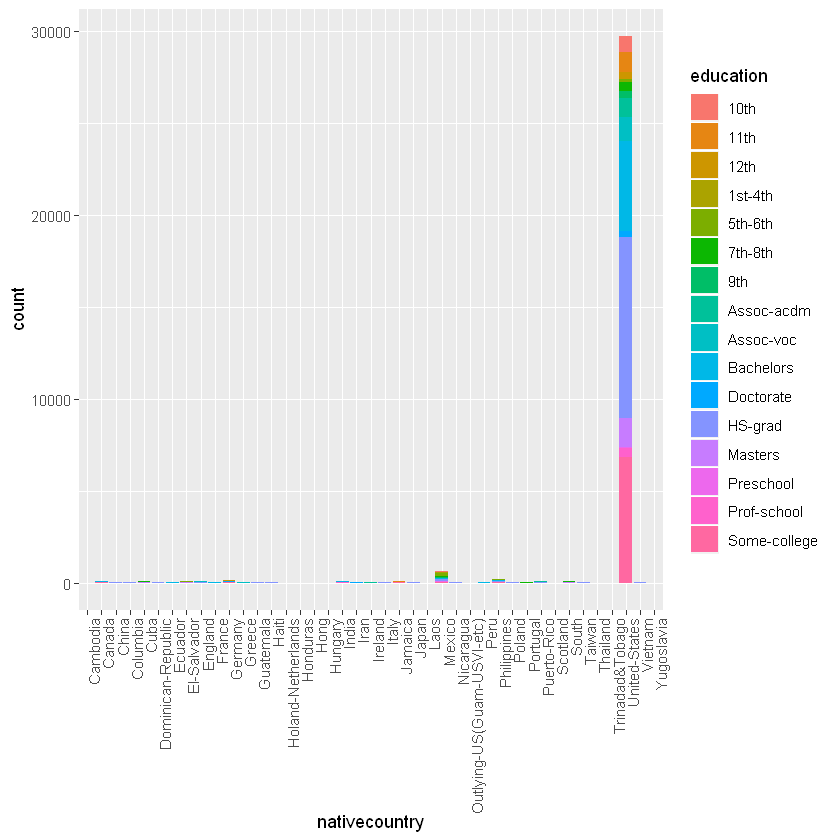

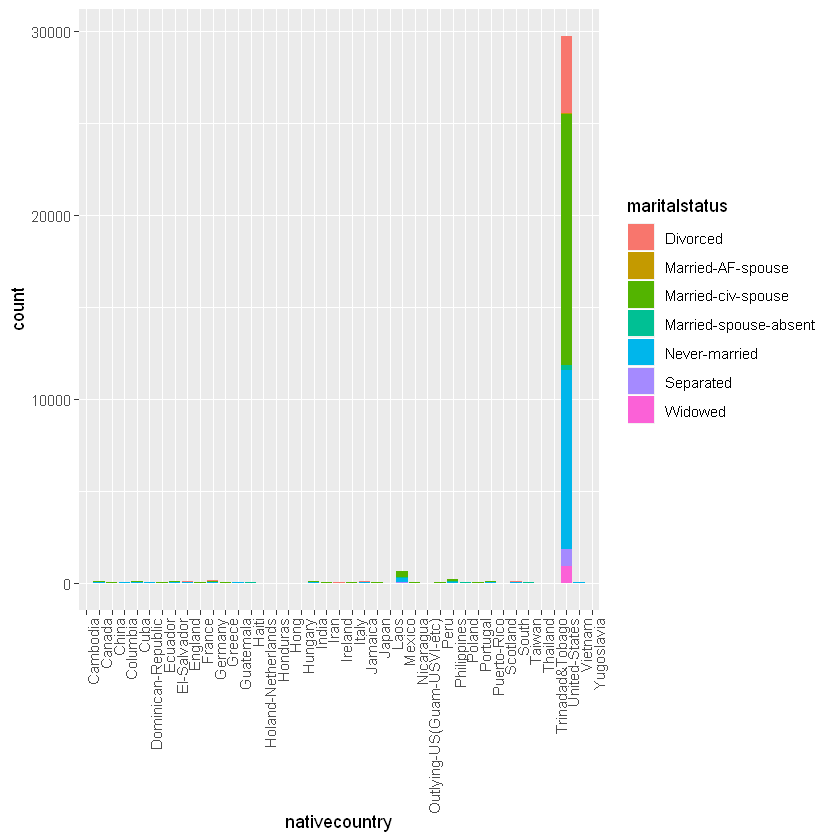

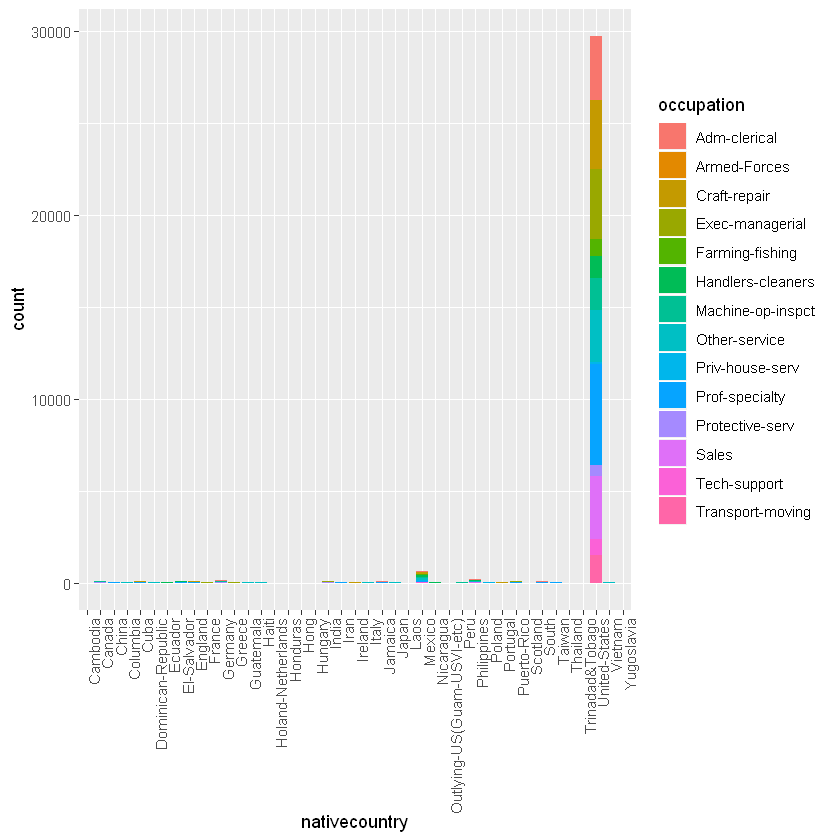

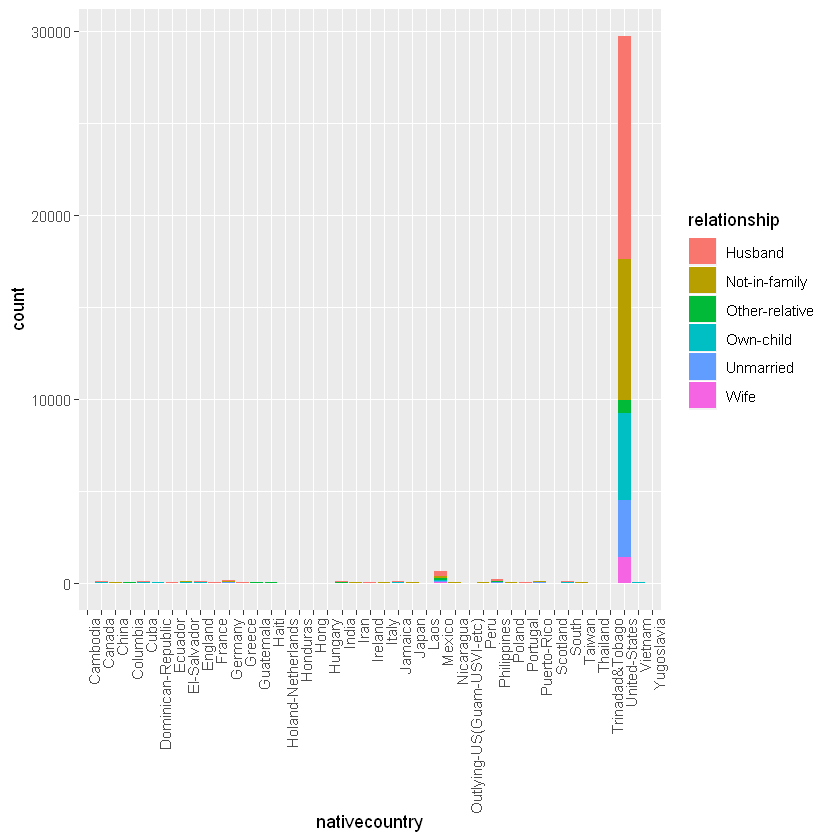

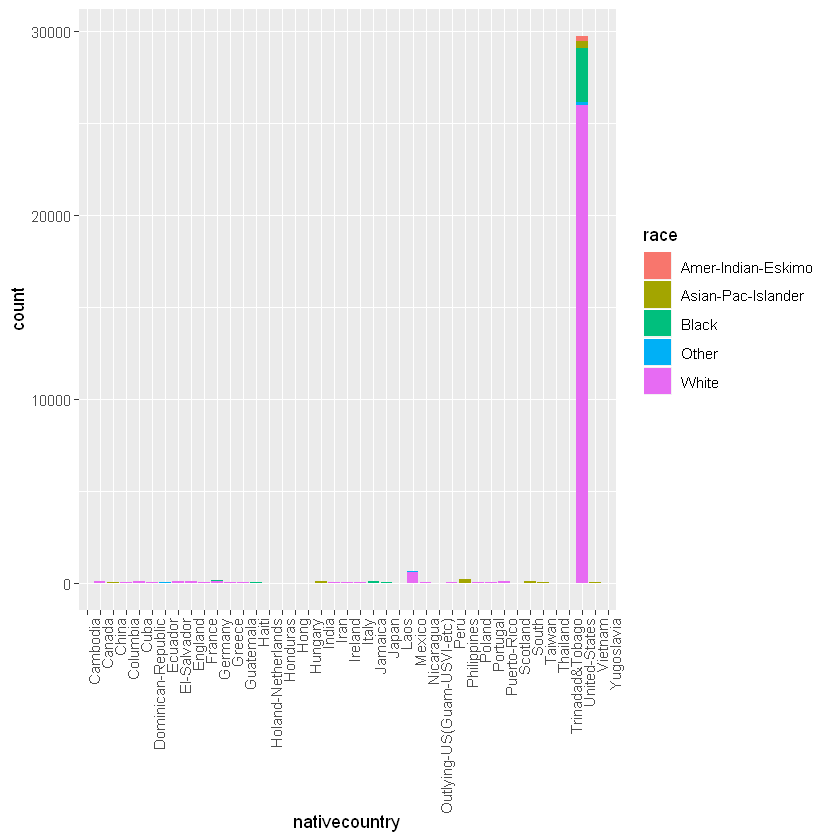

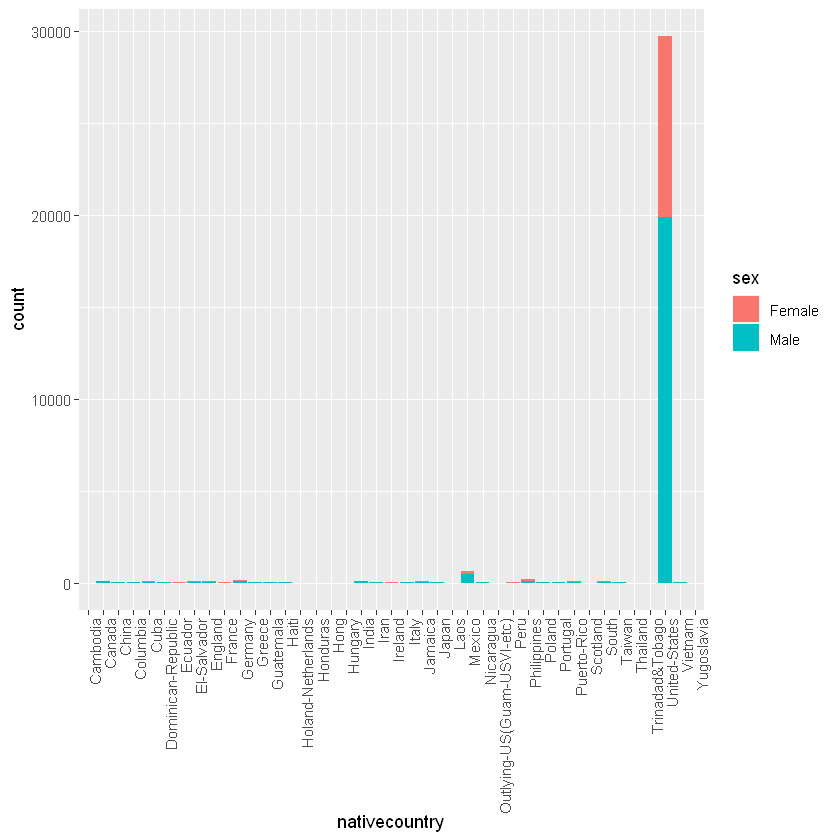

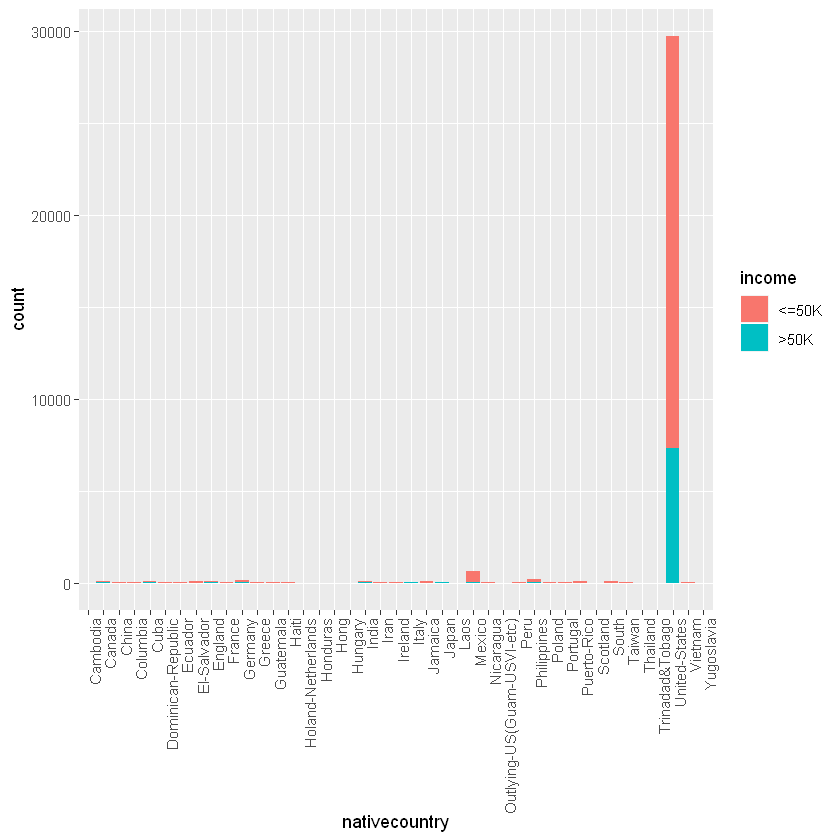

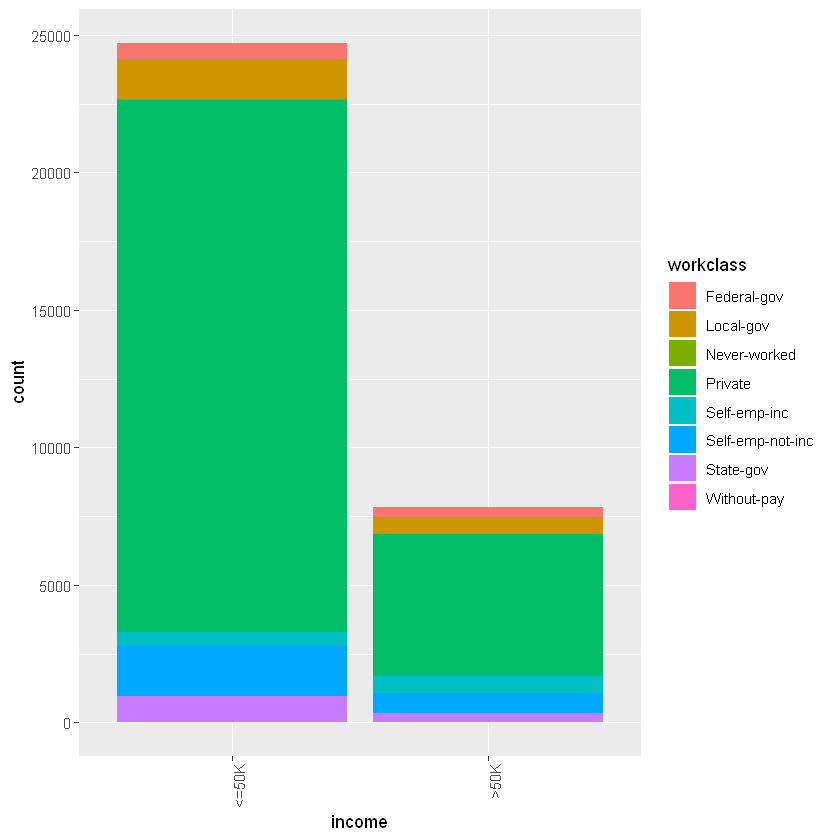

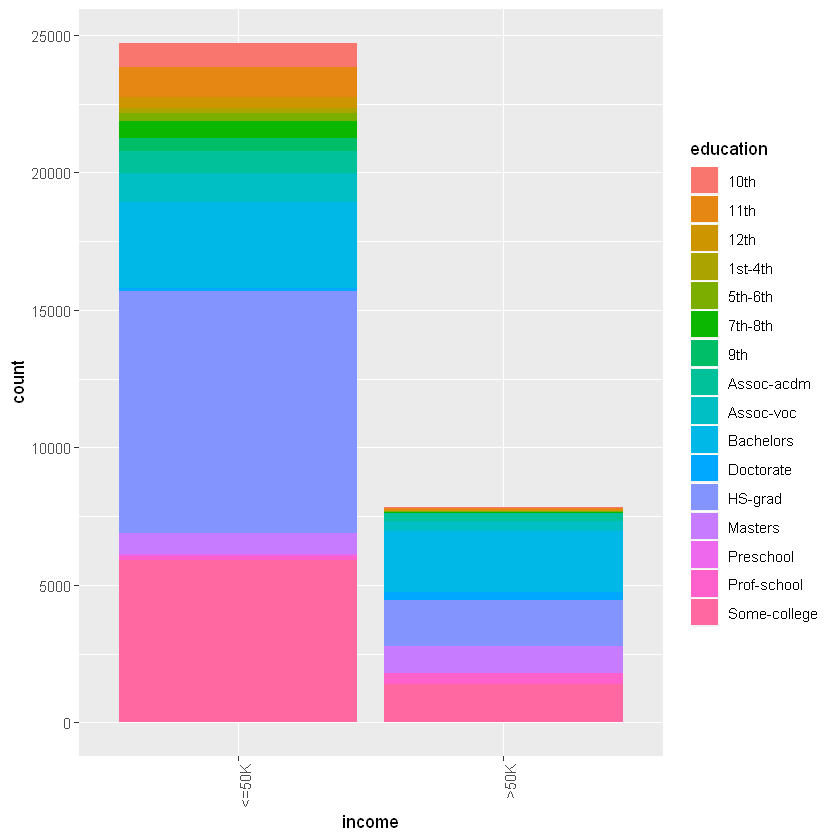

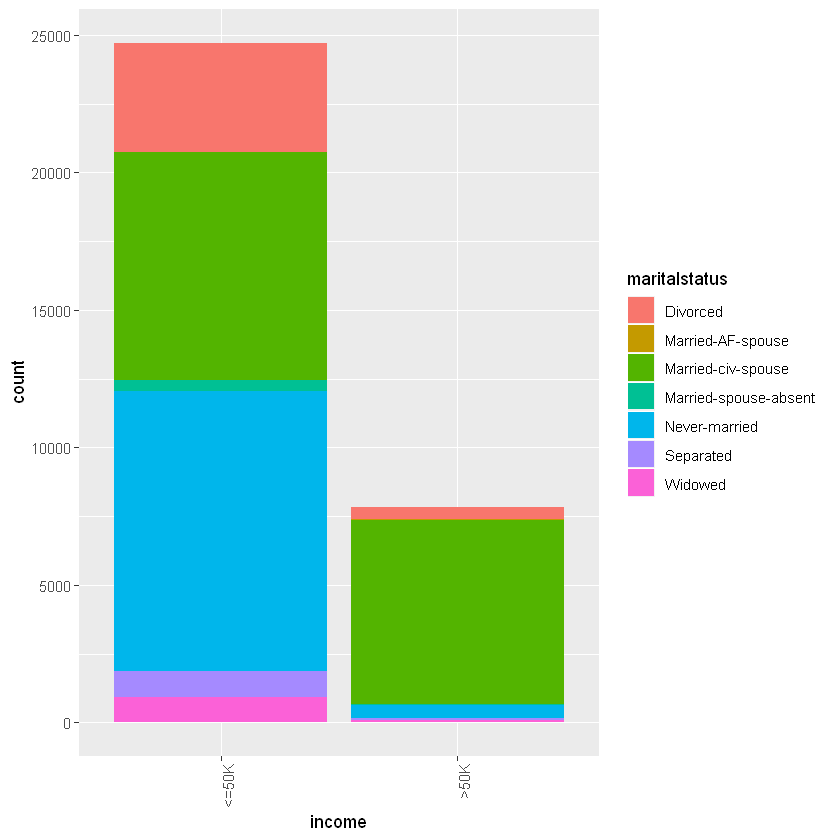

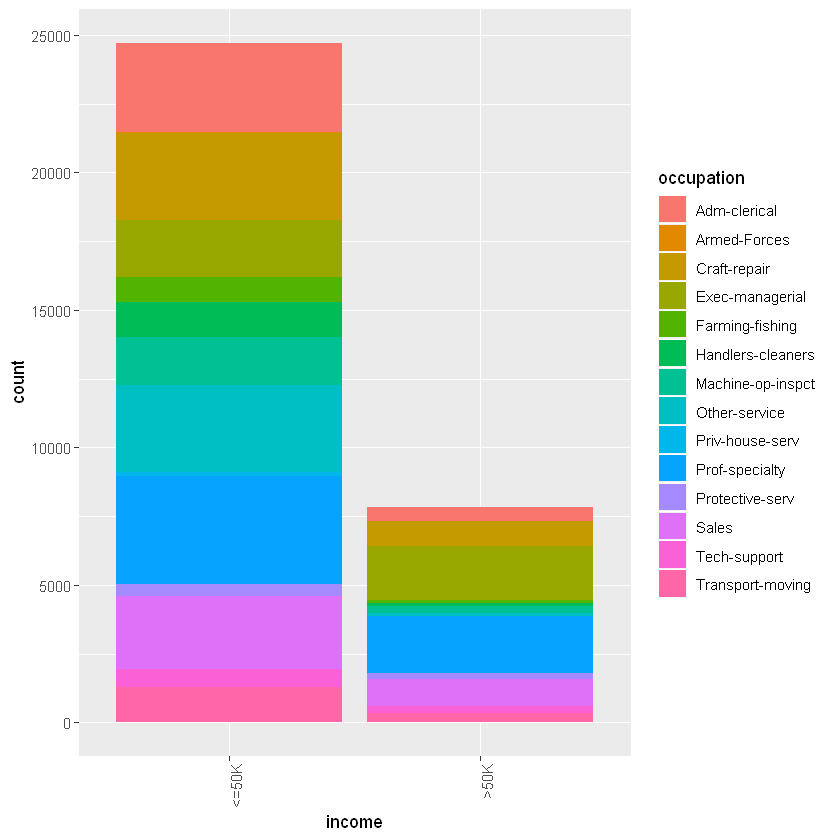

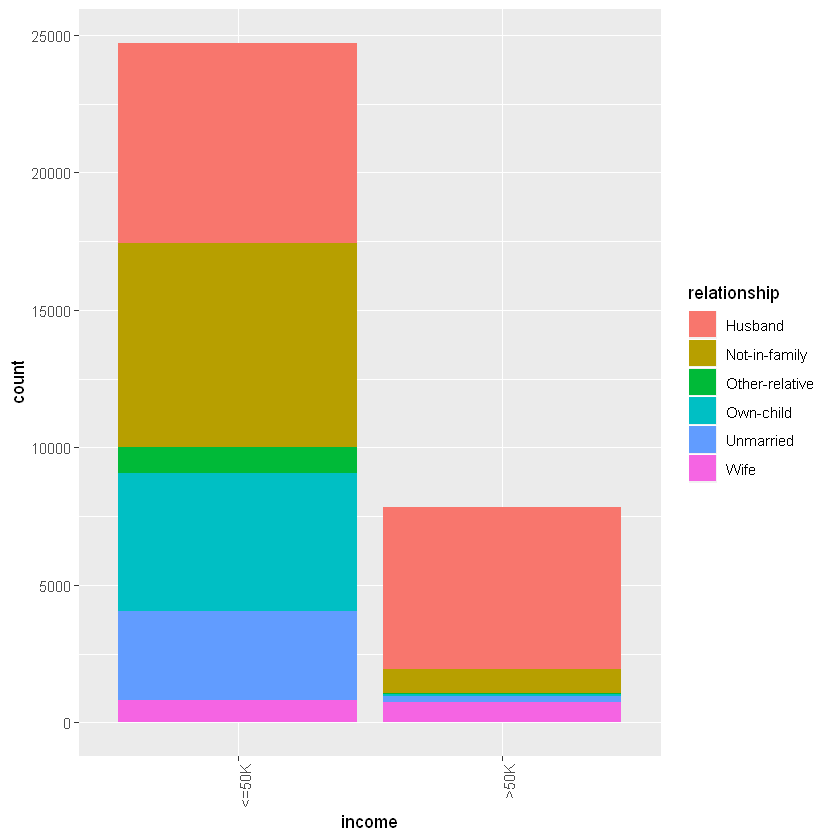

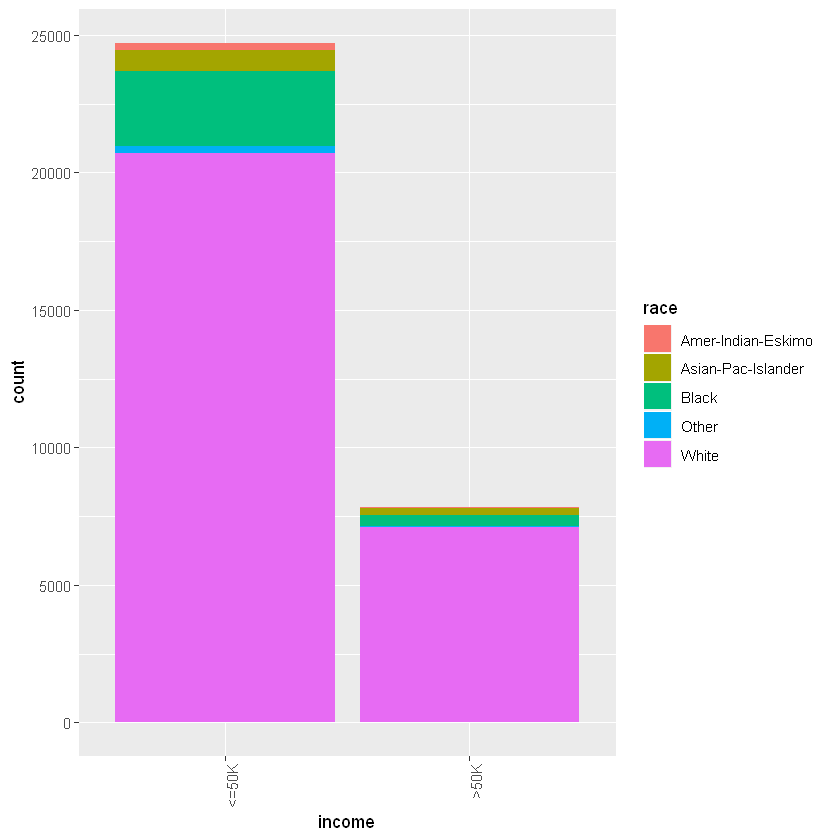

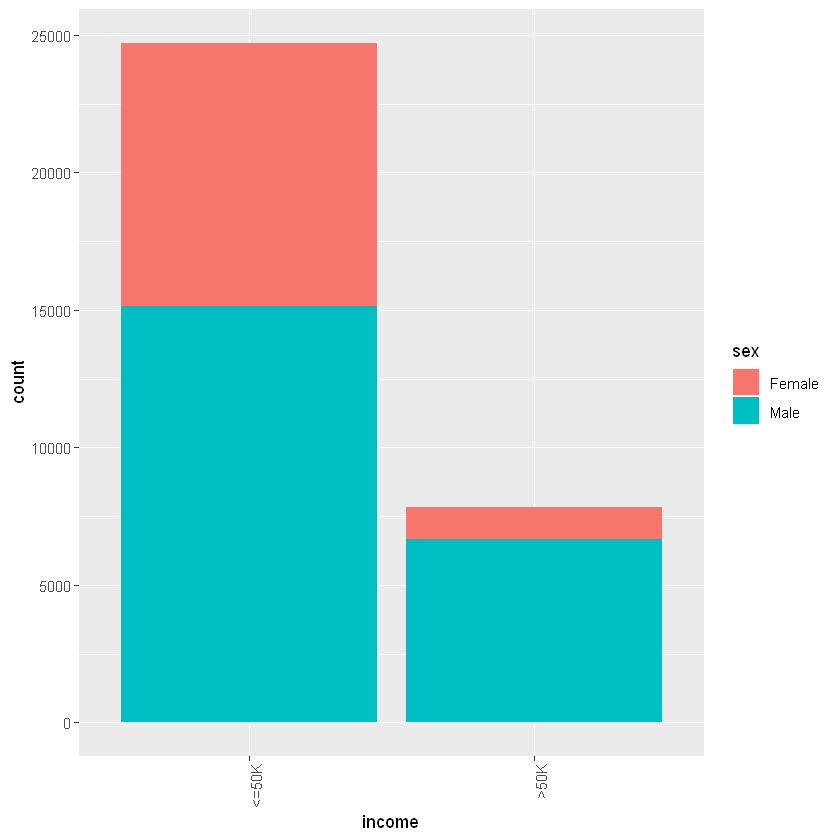

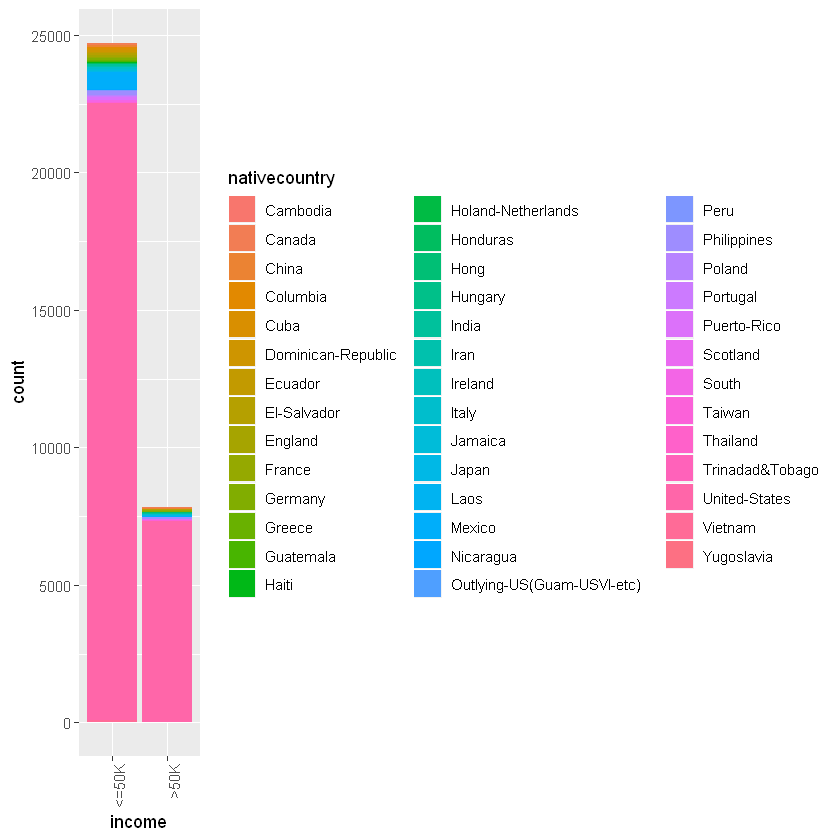

In [6]:
for(i in 1:ncol(adults))
{for (j in 1:ncol(adults))
  {if(is.numeric(adults[,i]) == FALSE & is.numeric(adults[,j]) == FALSE & i!= j)
{print(ggplot(adults) + geom_bar(mapping = aes(x = adults[,i], fill = adults[,j]))+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+labs(x = names(adults)[i], fill = names(adults)[j]))
}}}

### Density curves of numeric variables on the categories of categorical variables.  For example: plotting density curves of Age on female and male.

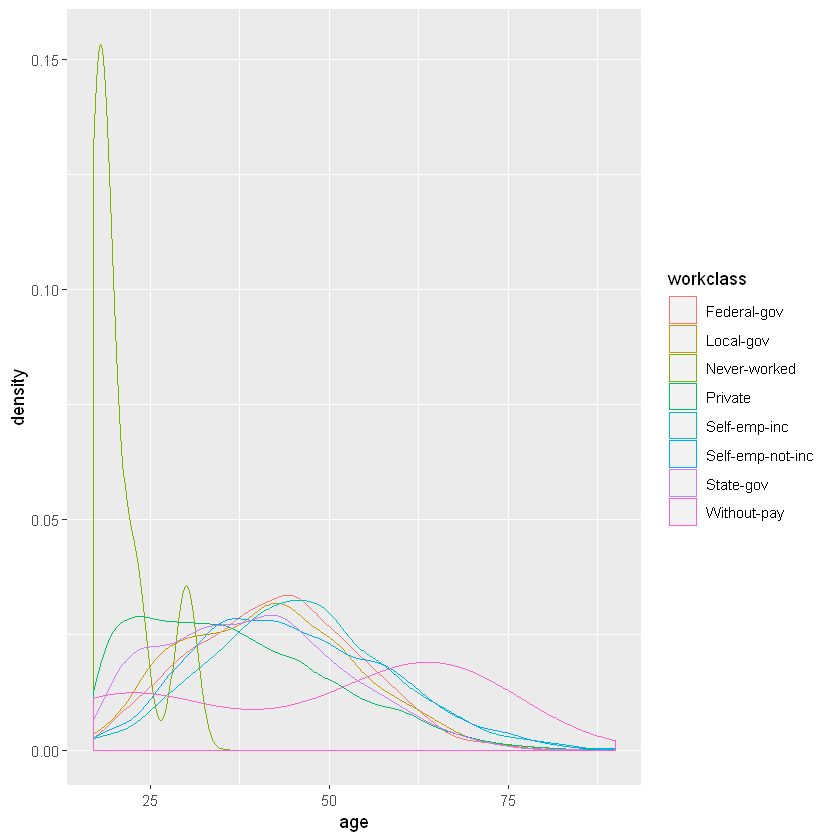

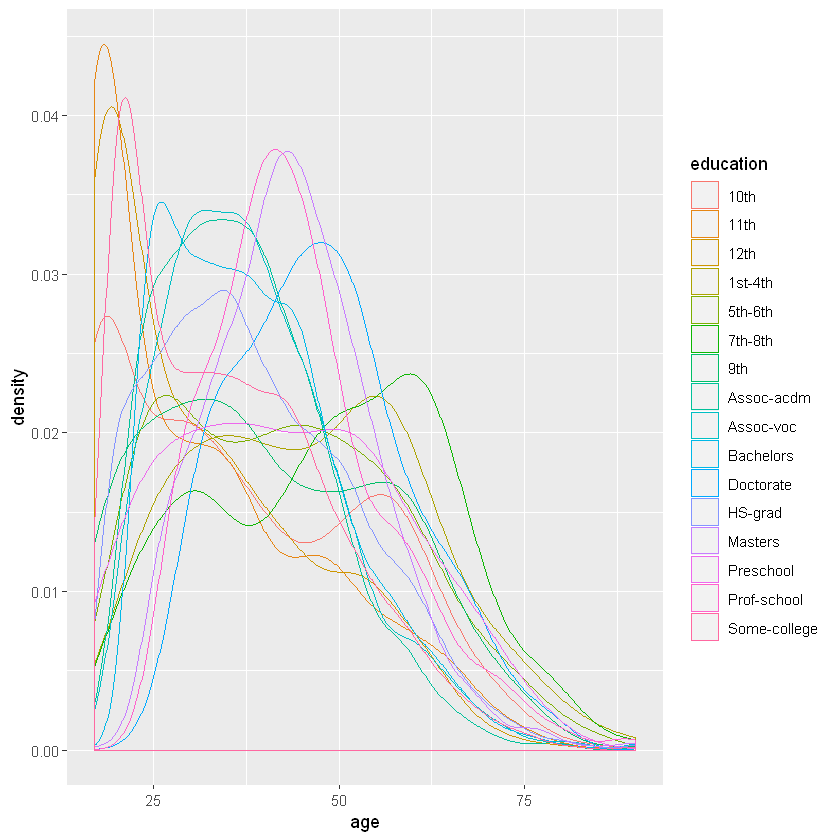

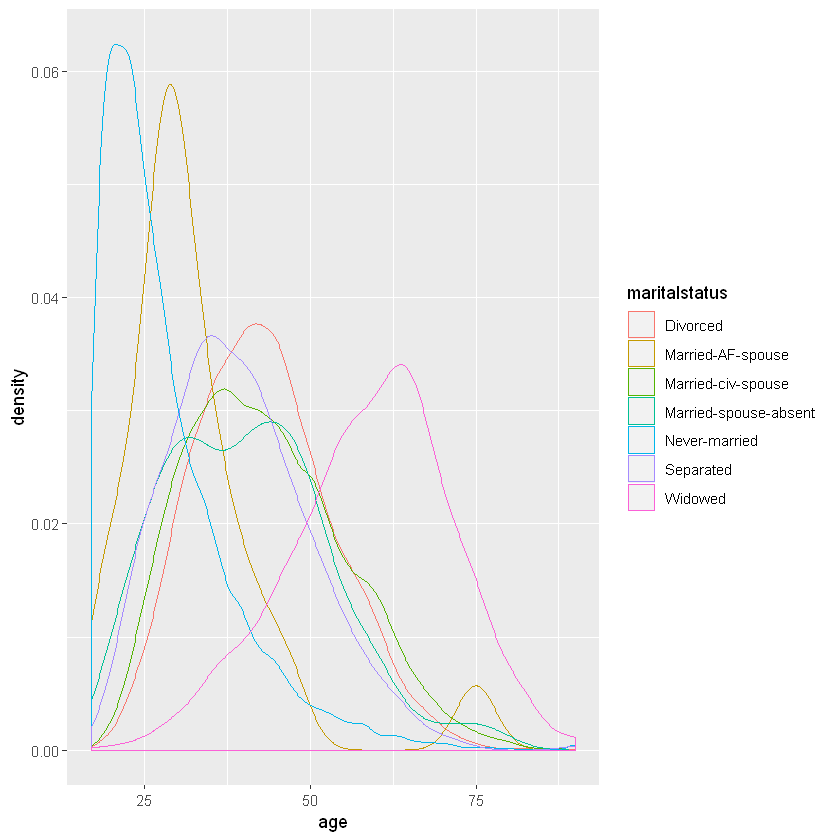

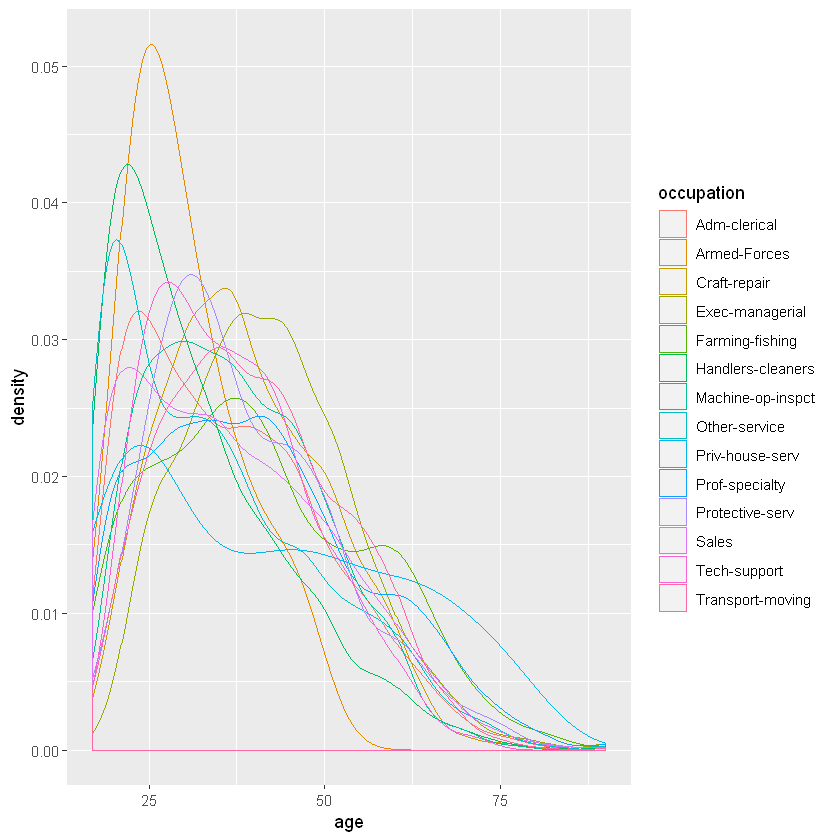

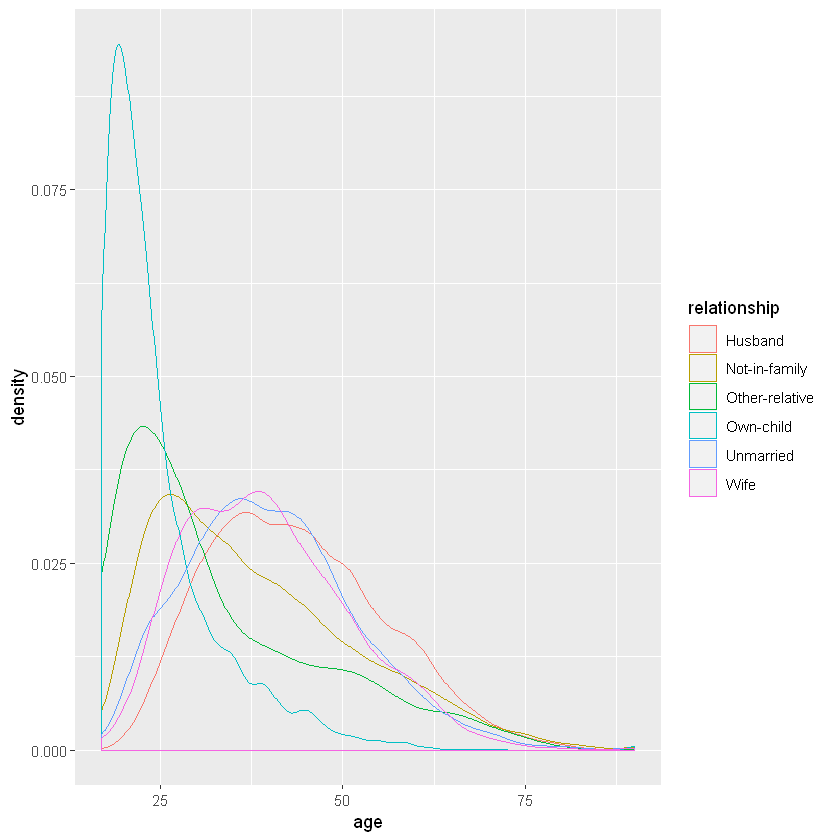

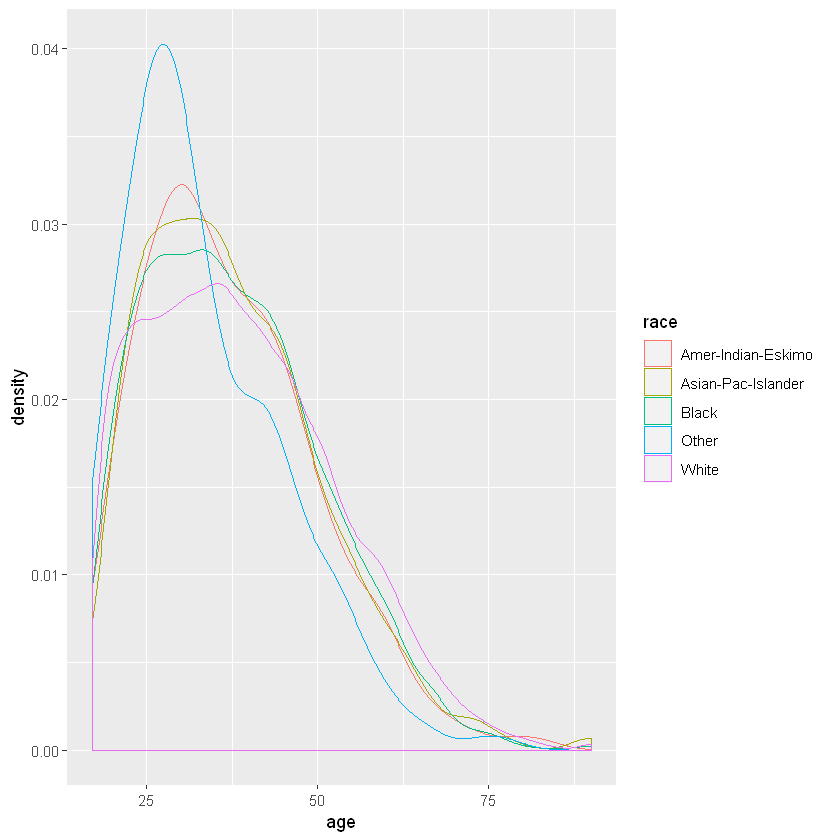

Warning message:
"Groups with fewer than two data points have been dropped."

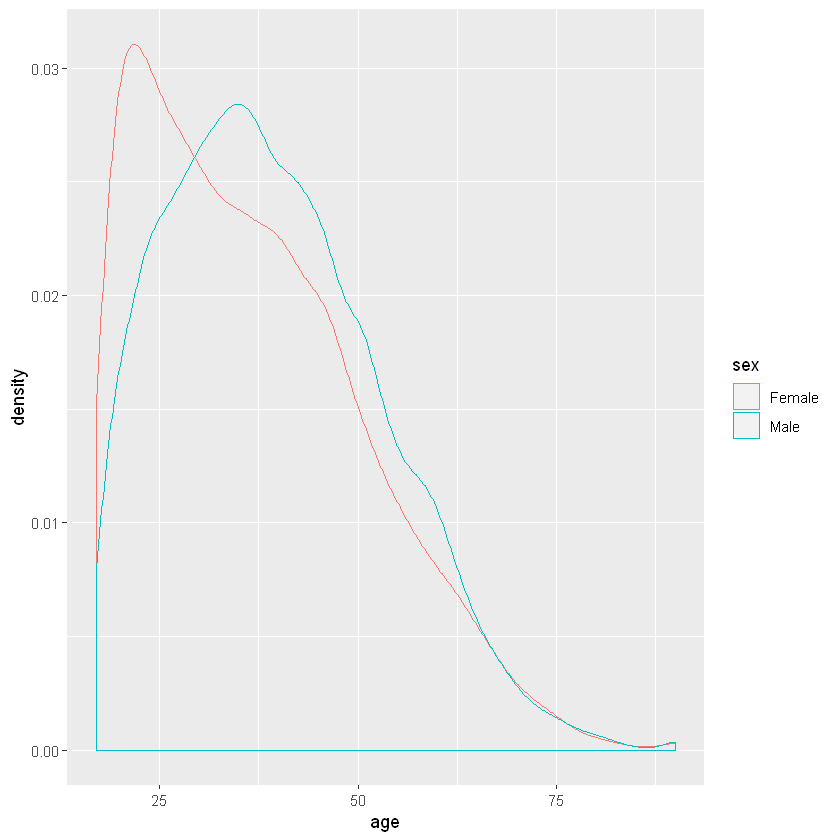

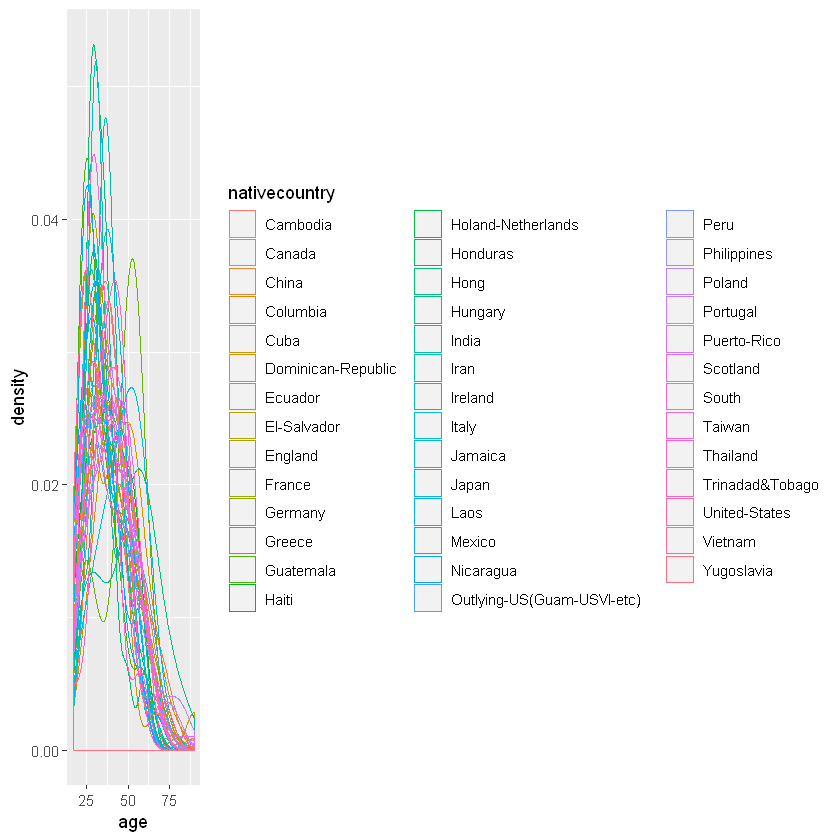

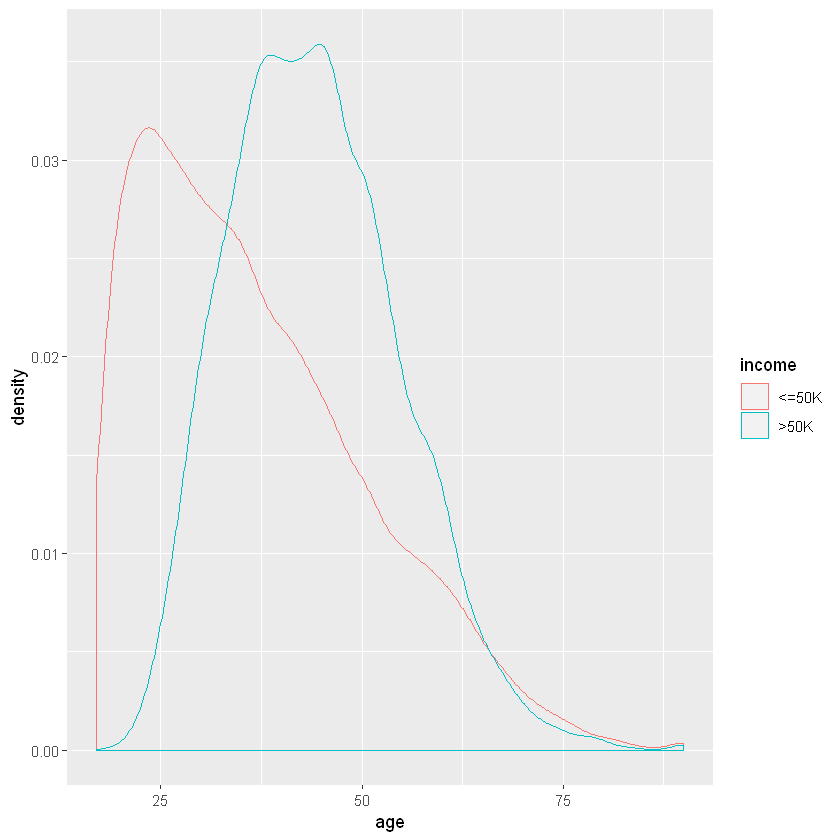

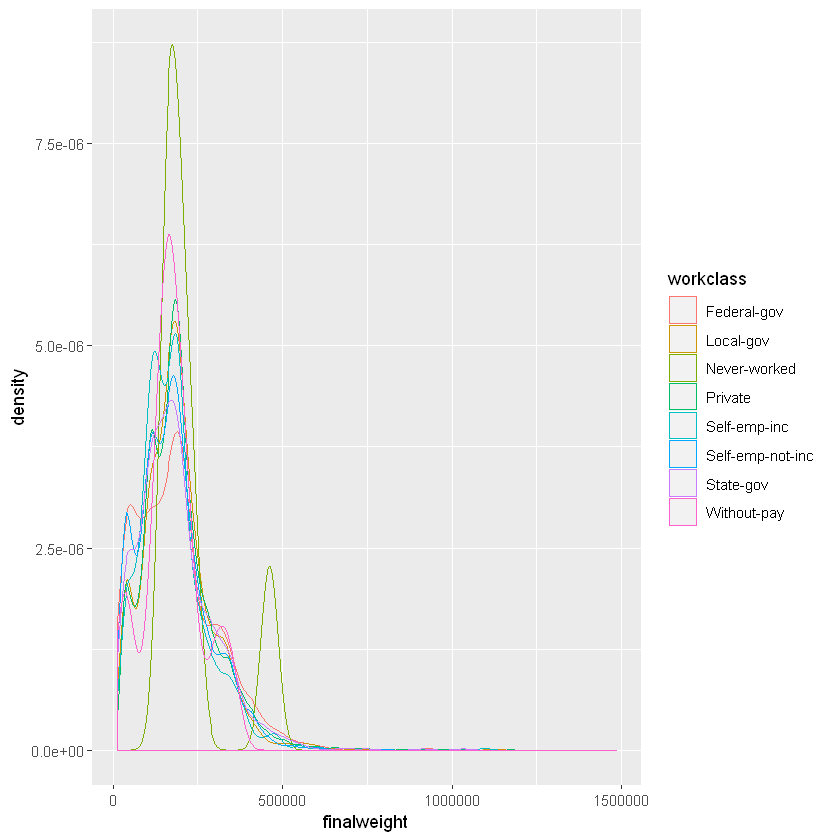

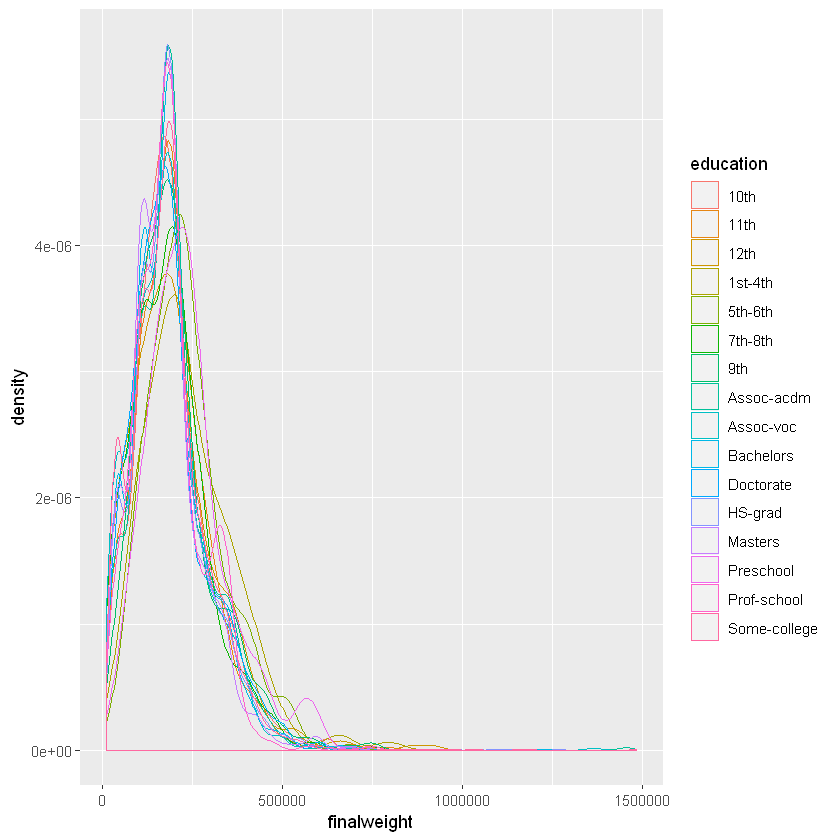

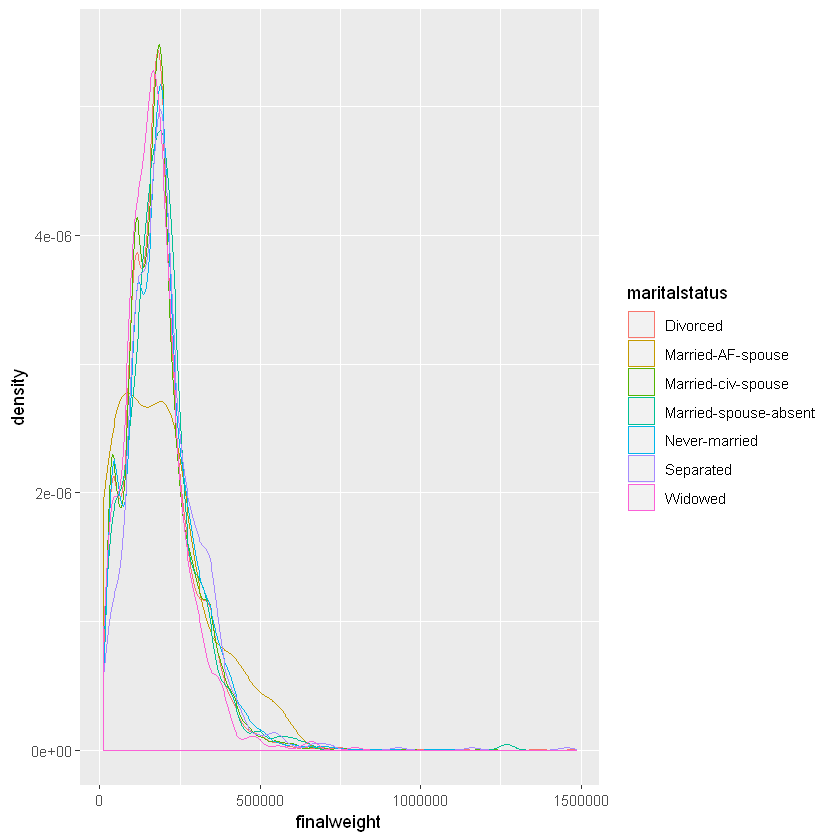

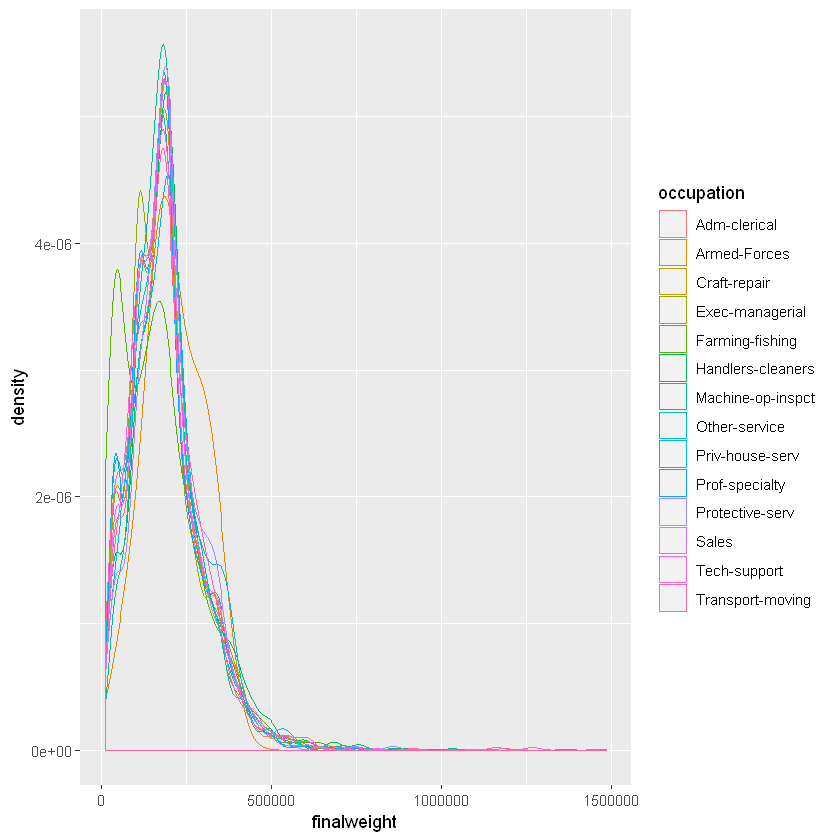

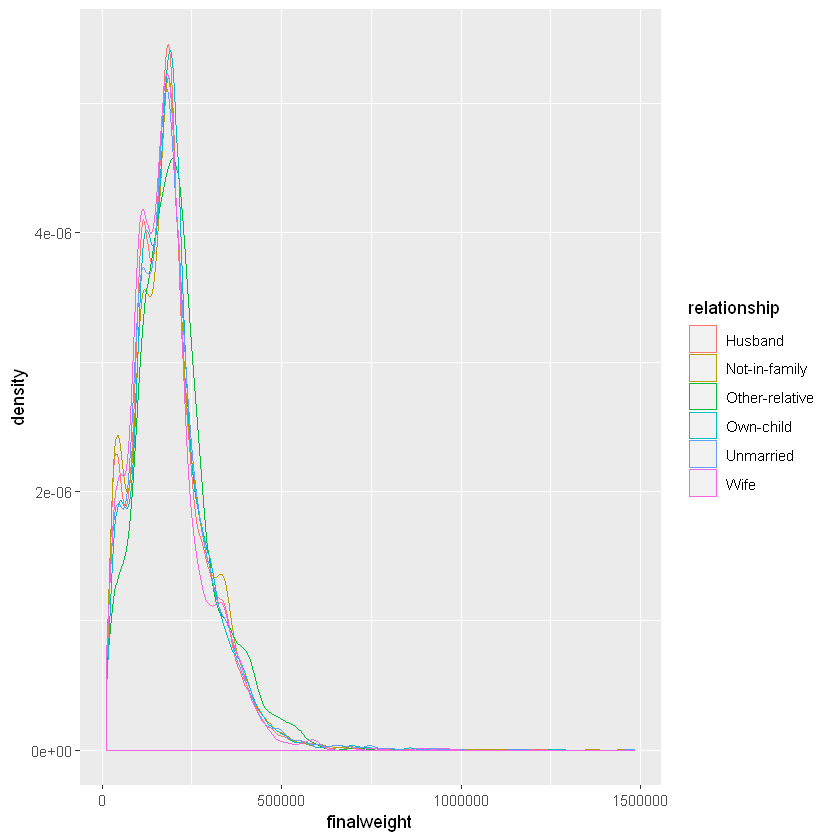

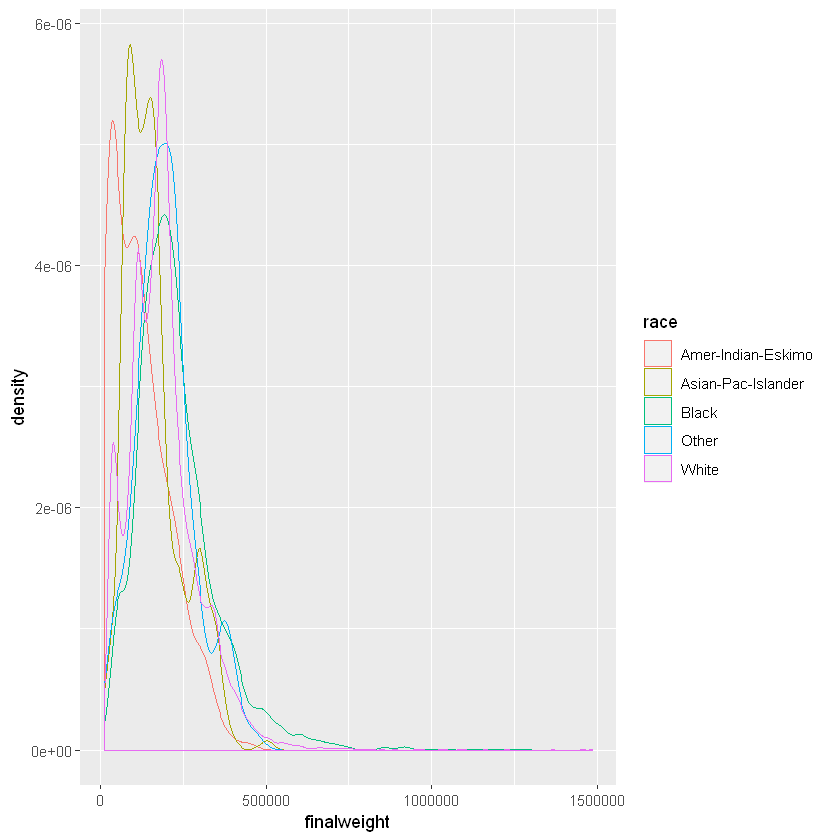

Warning message:
"Groups with fewer than two data points have been dropped."

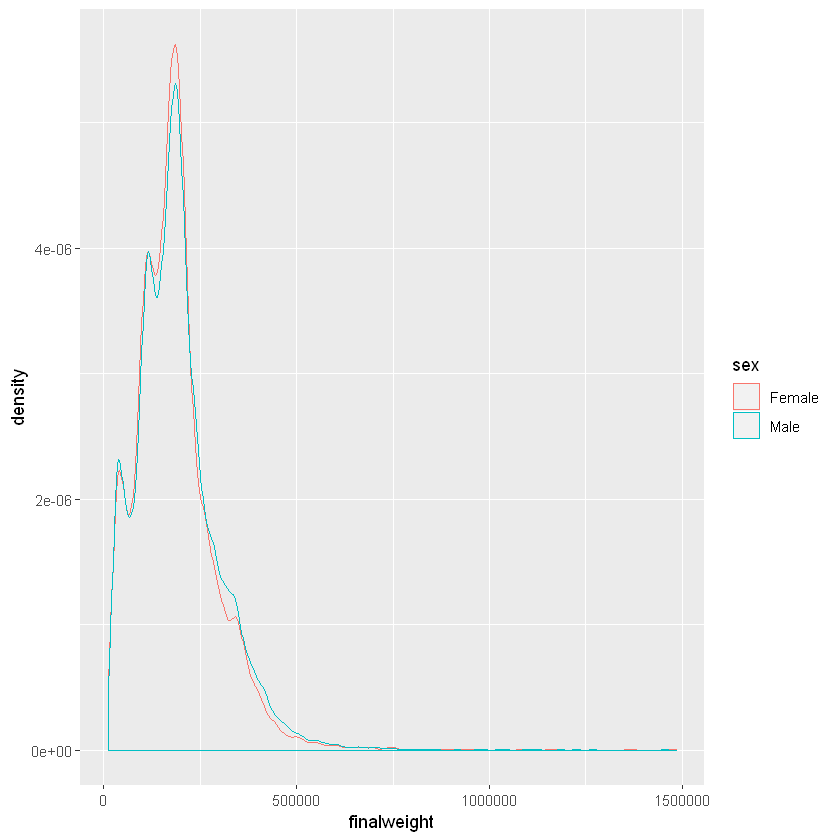

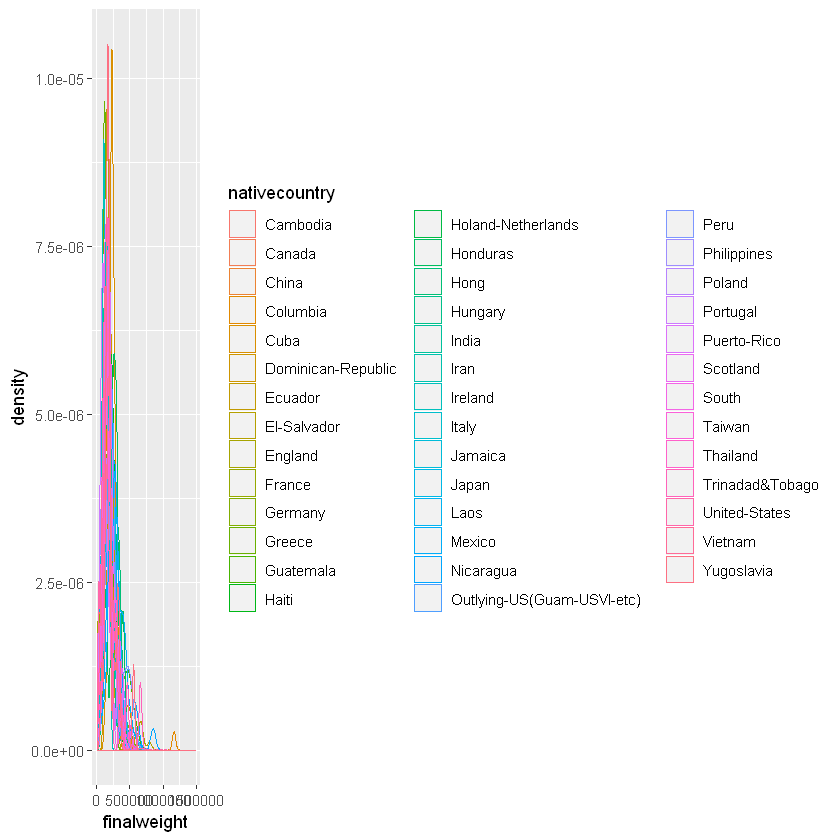

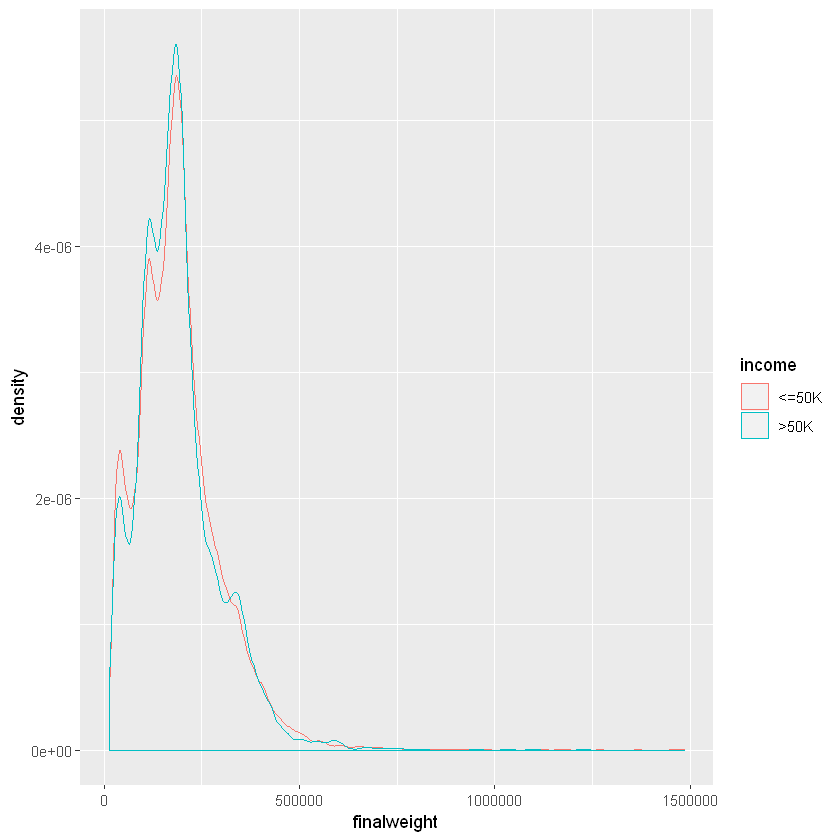

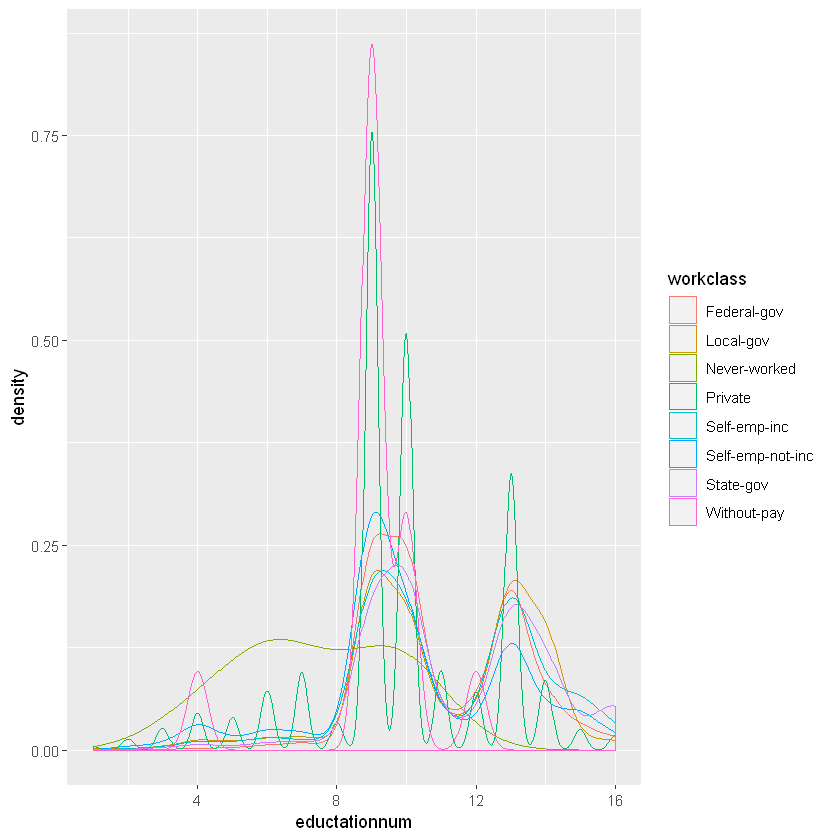

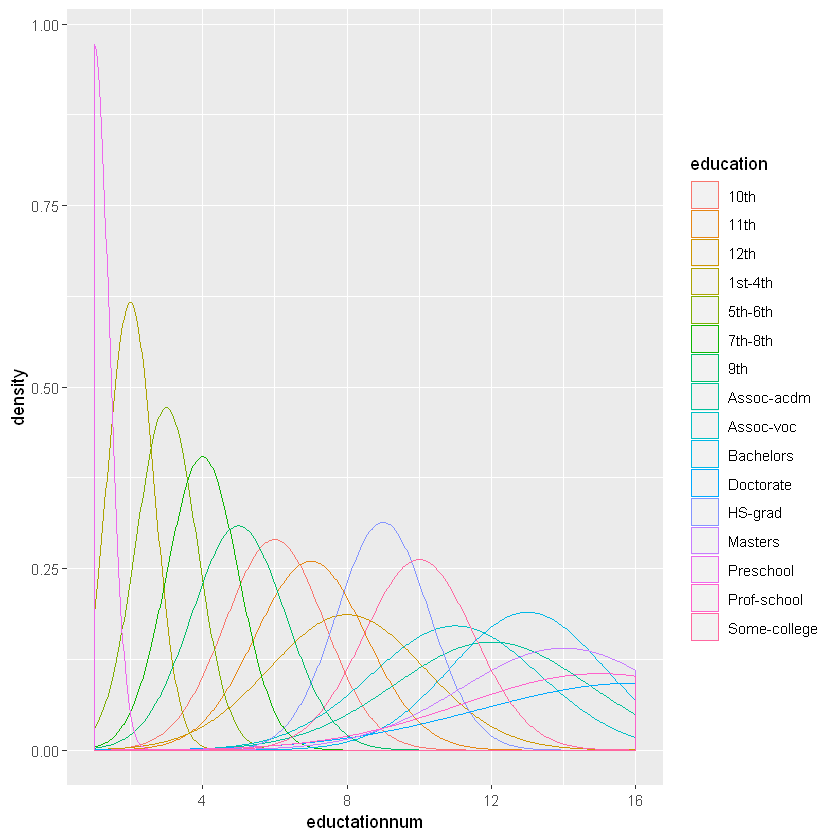

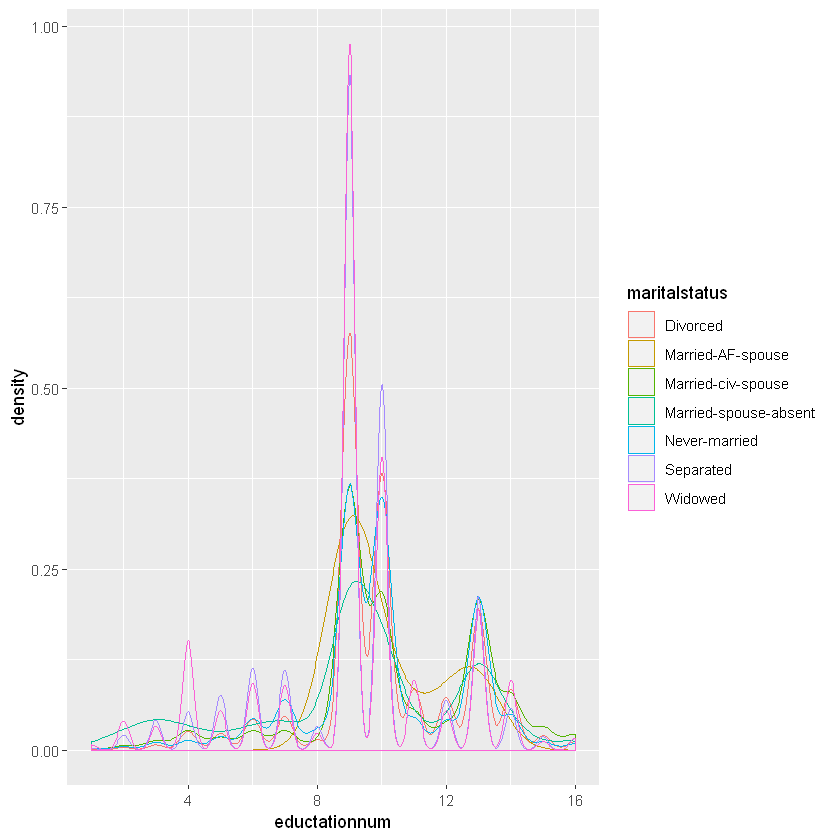

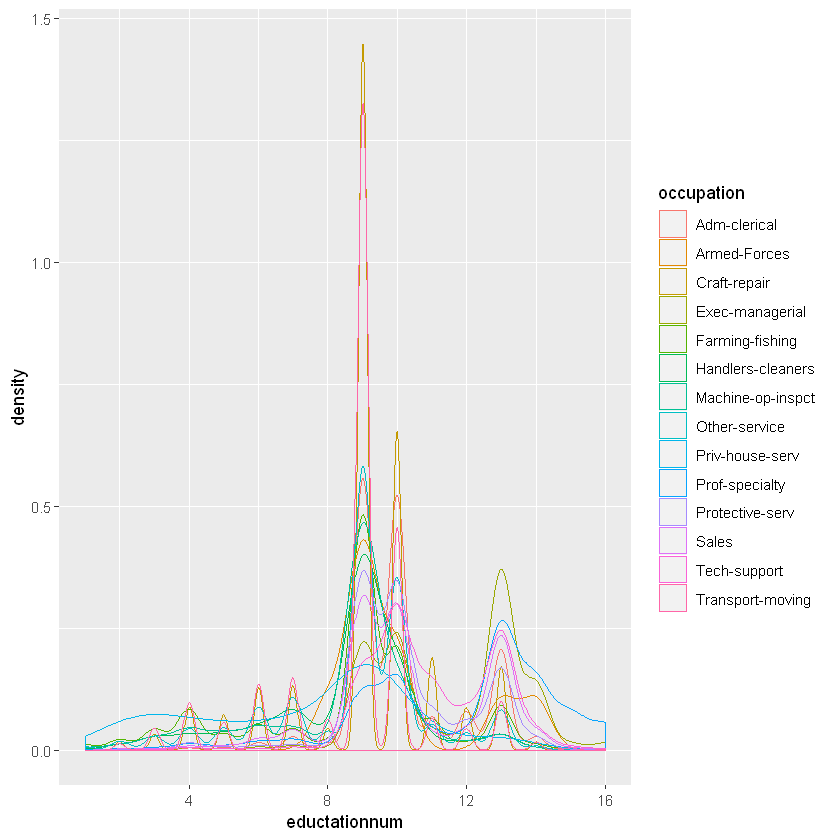

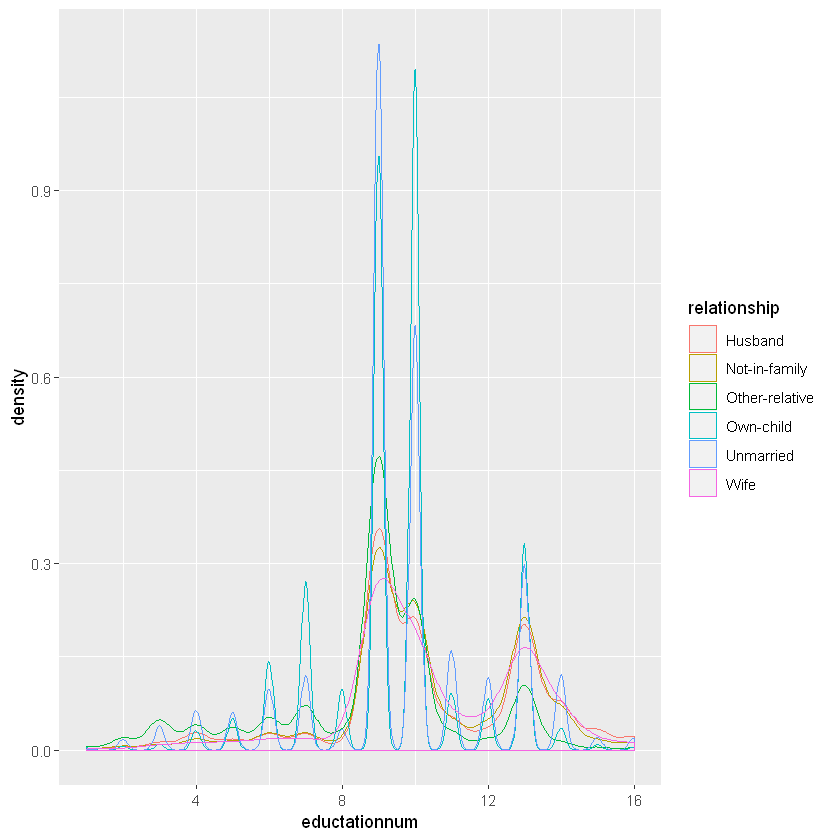

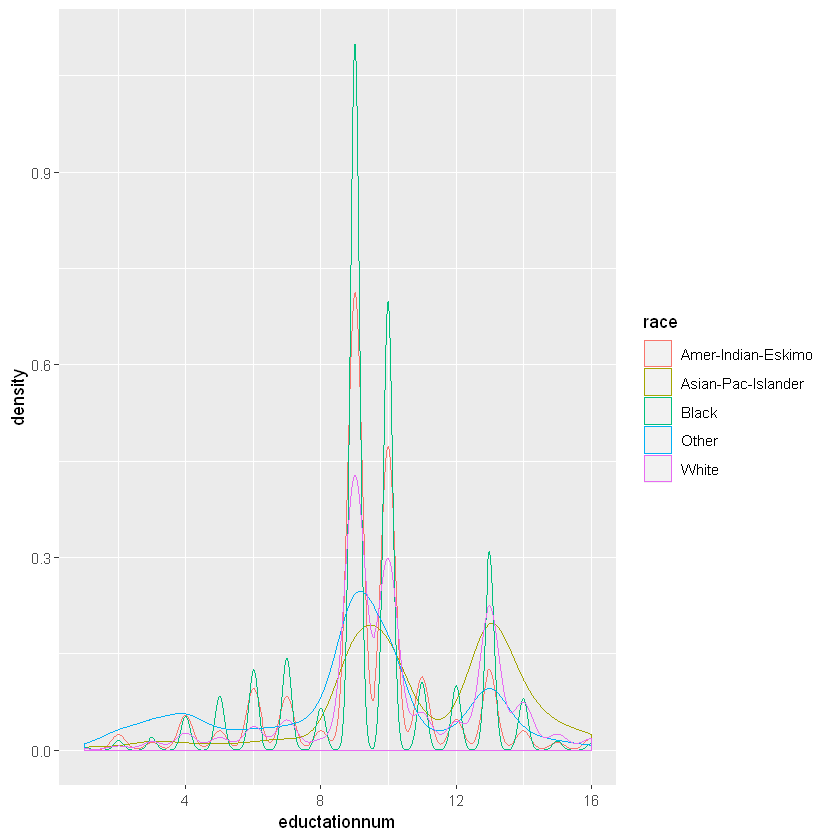

Warning message:
"Groups with fewer than two data points have been dropped."

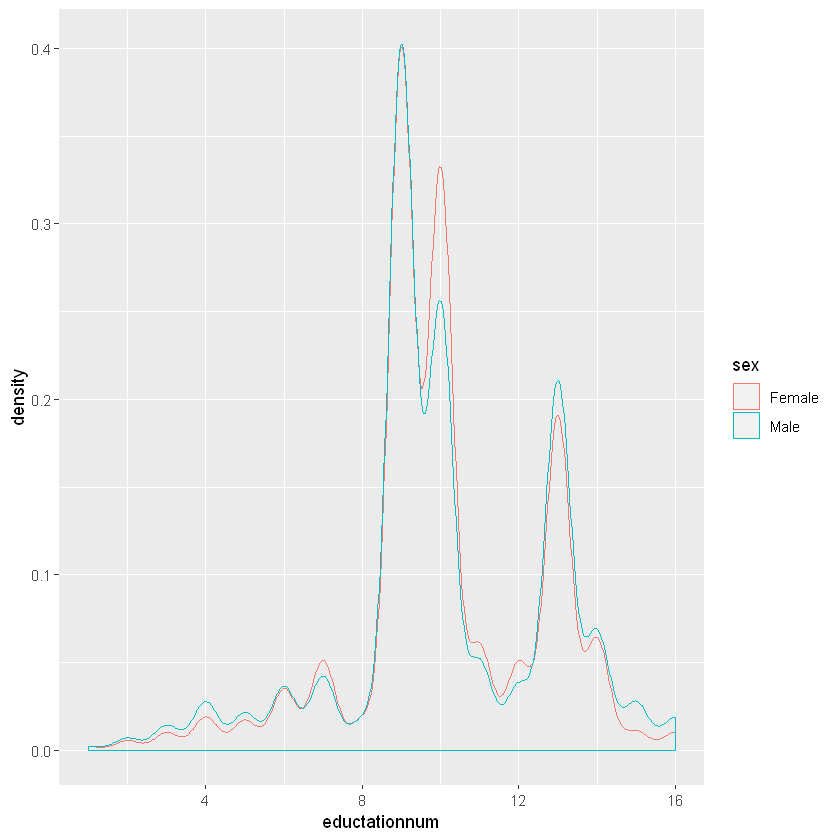

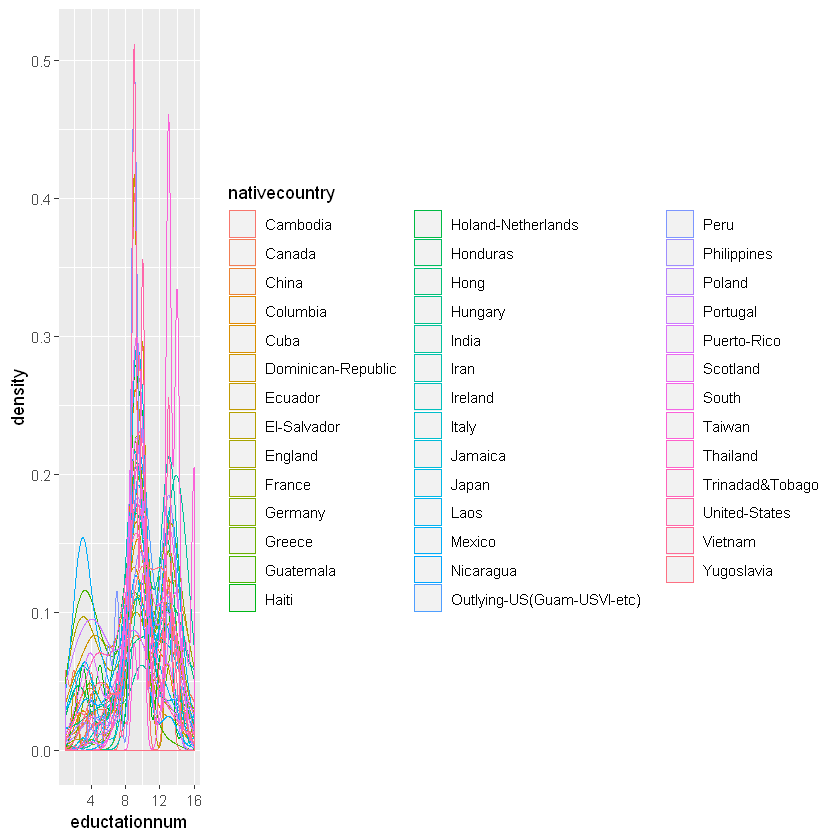

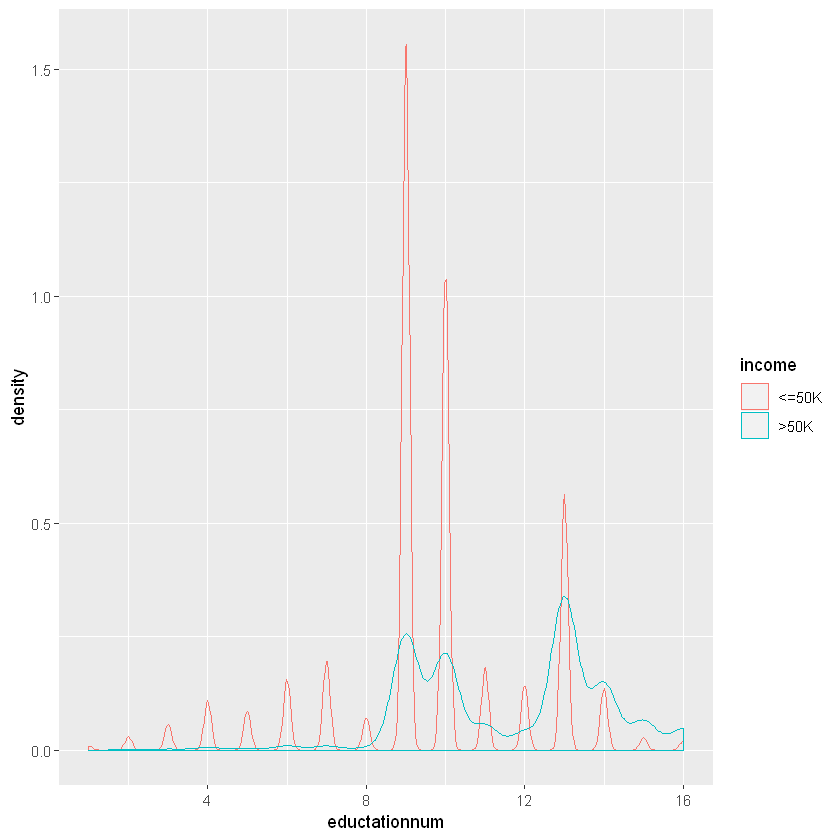

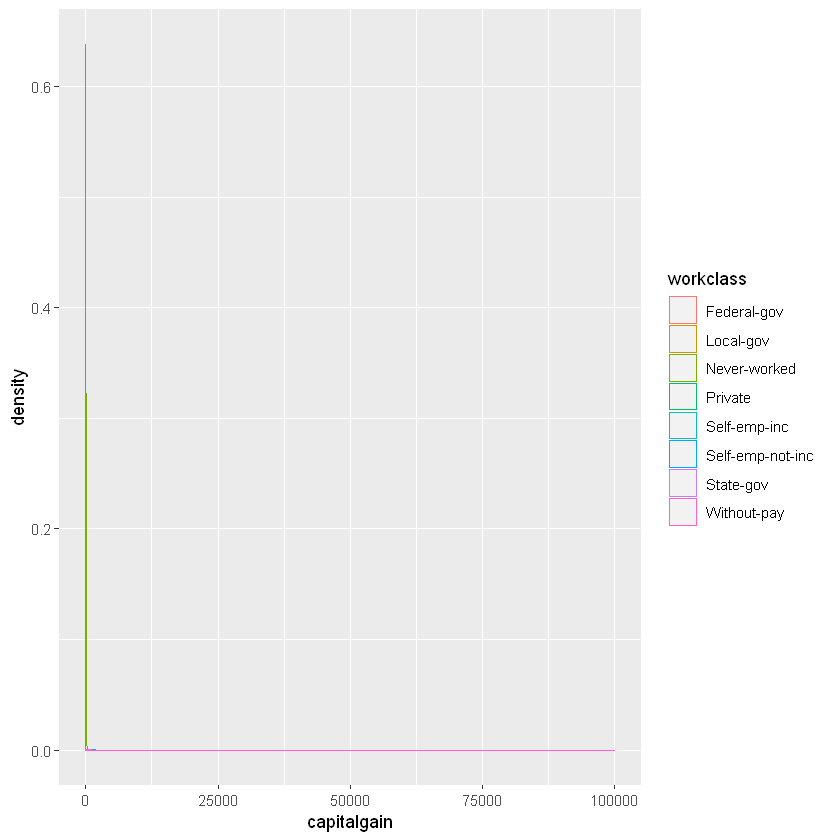

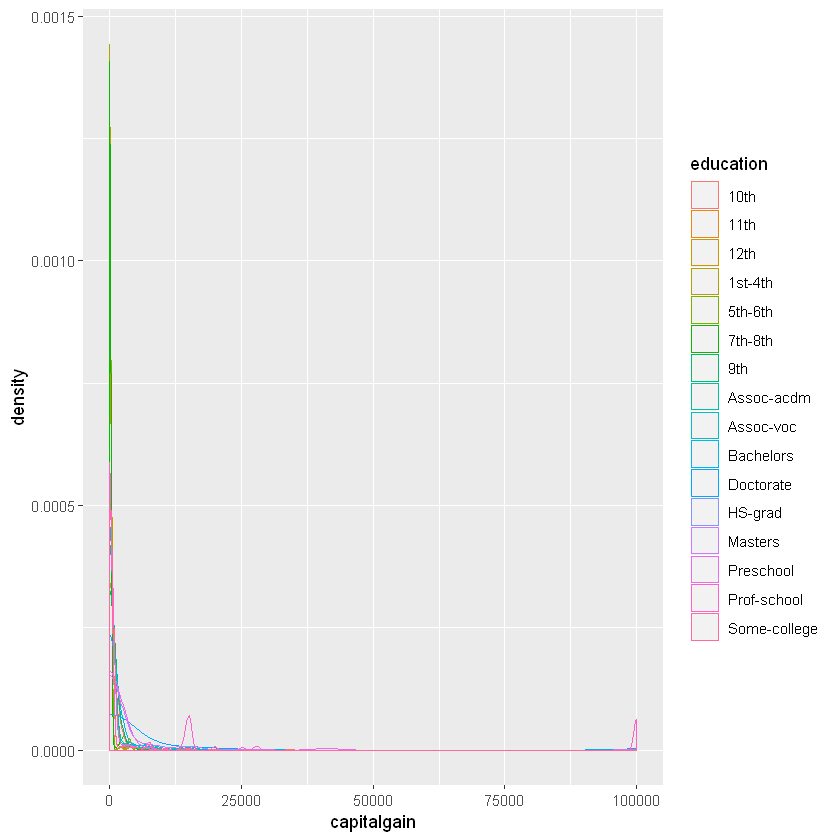

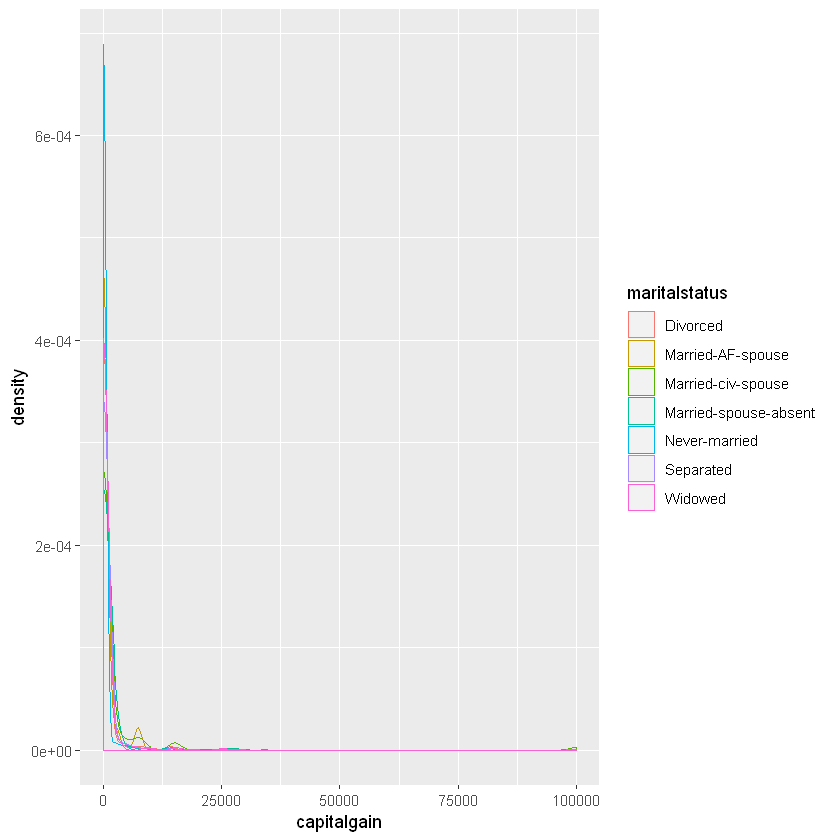

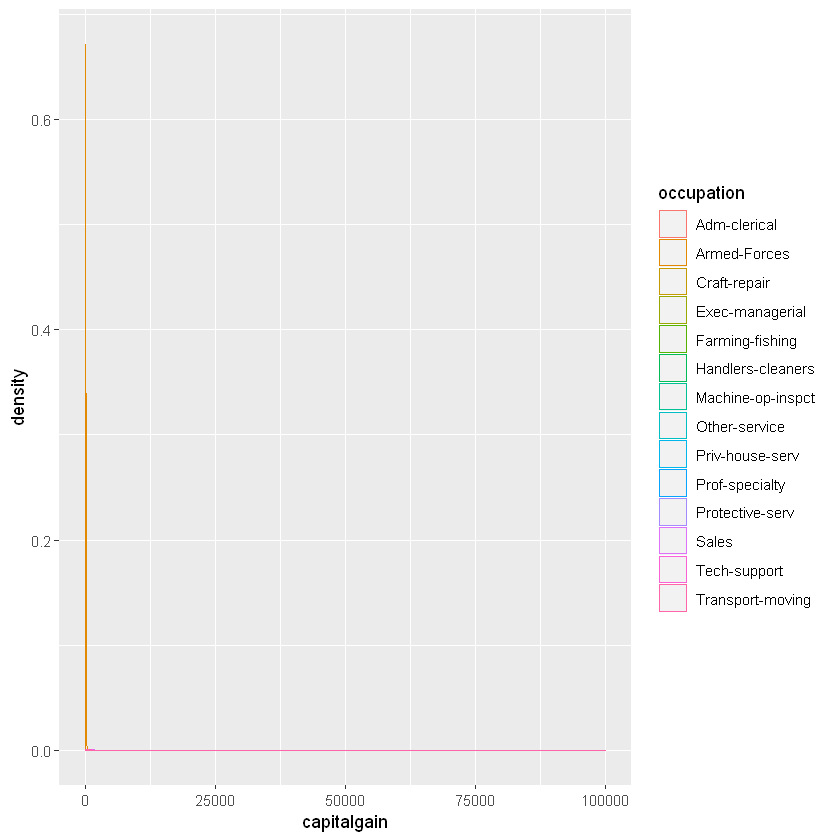

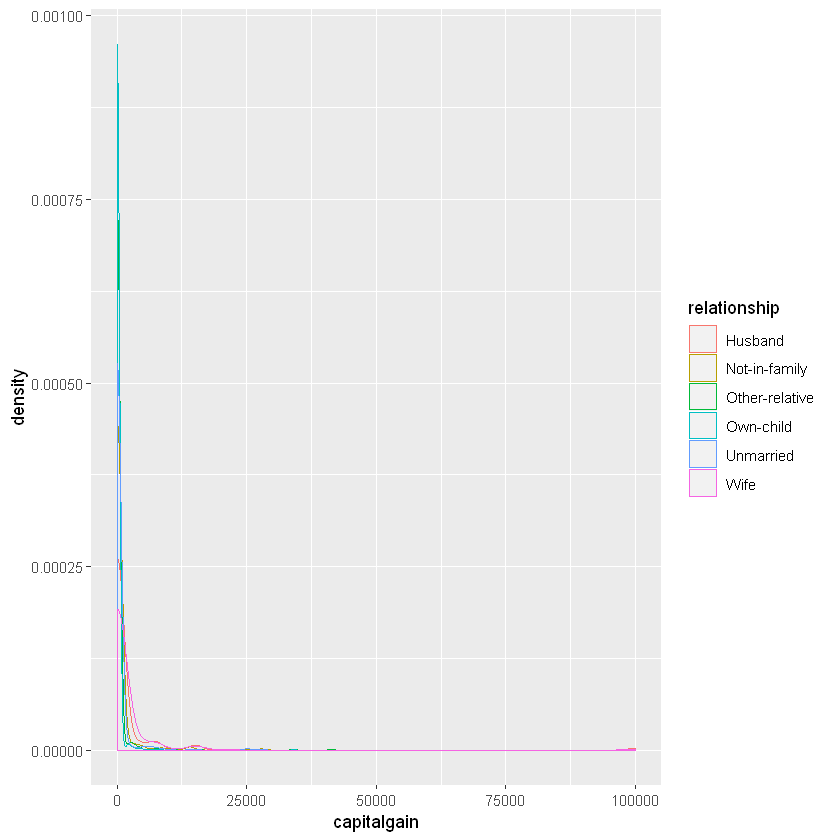

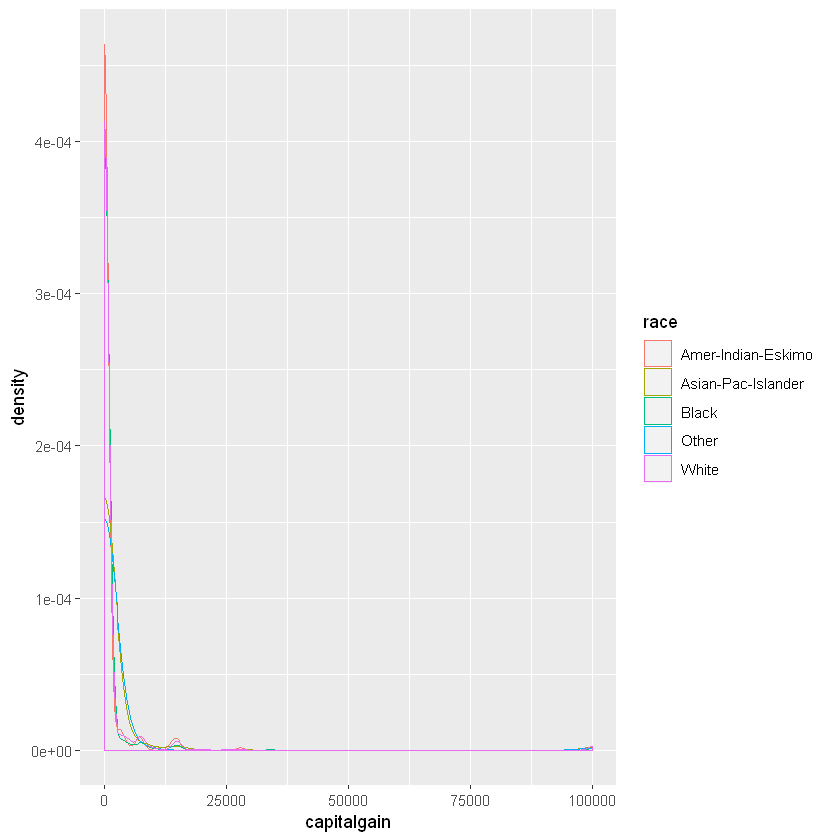

Warning message:
"Groups with fewer than two data points have been dropped."

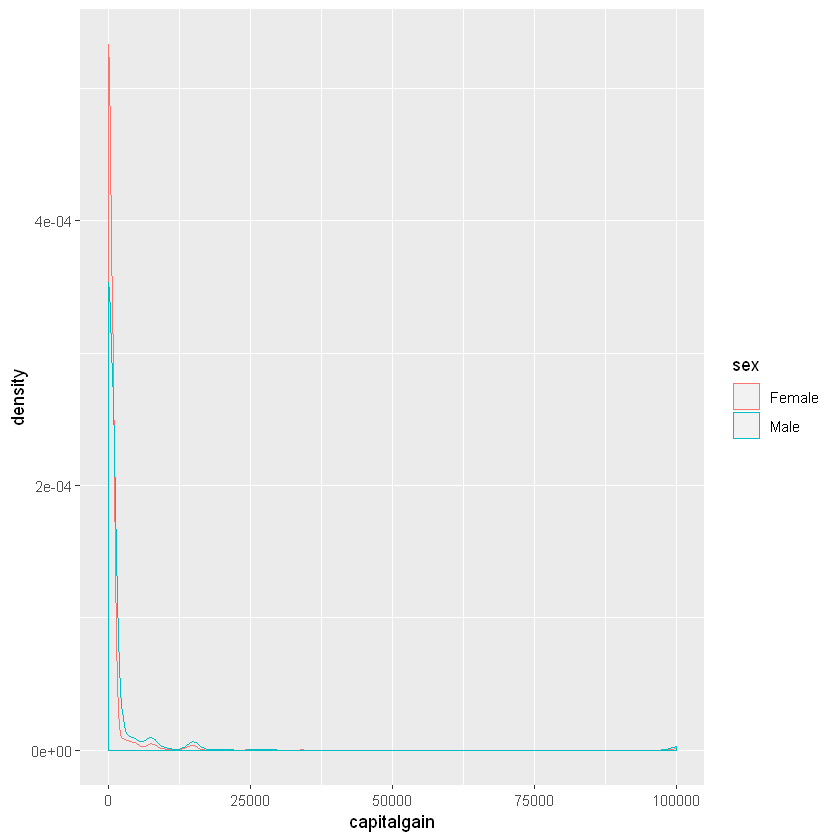

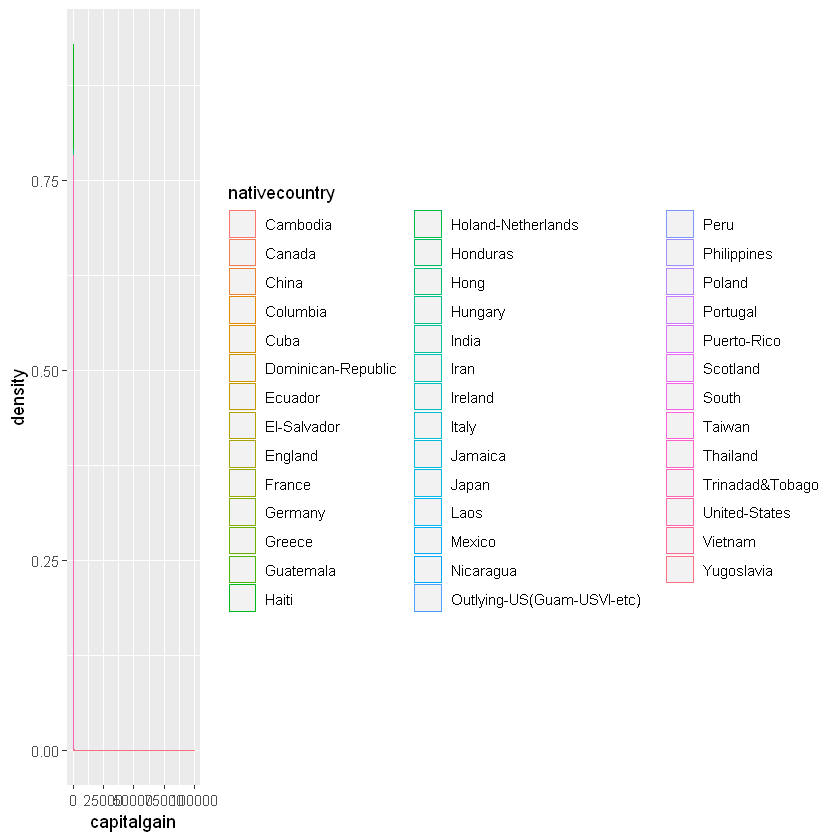

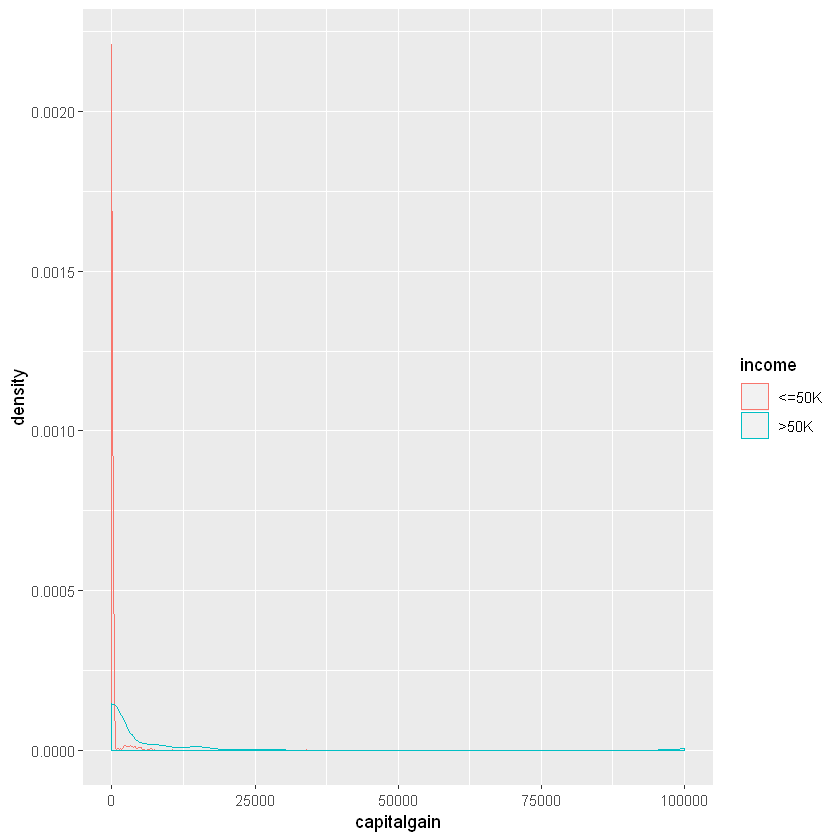

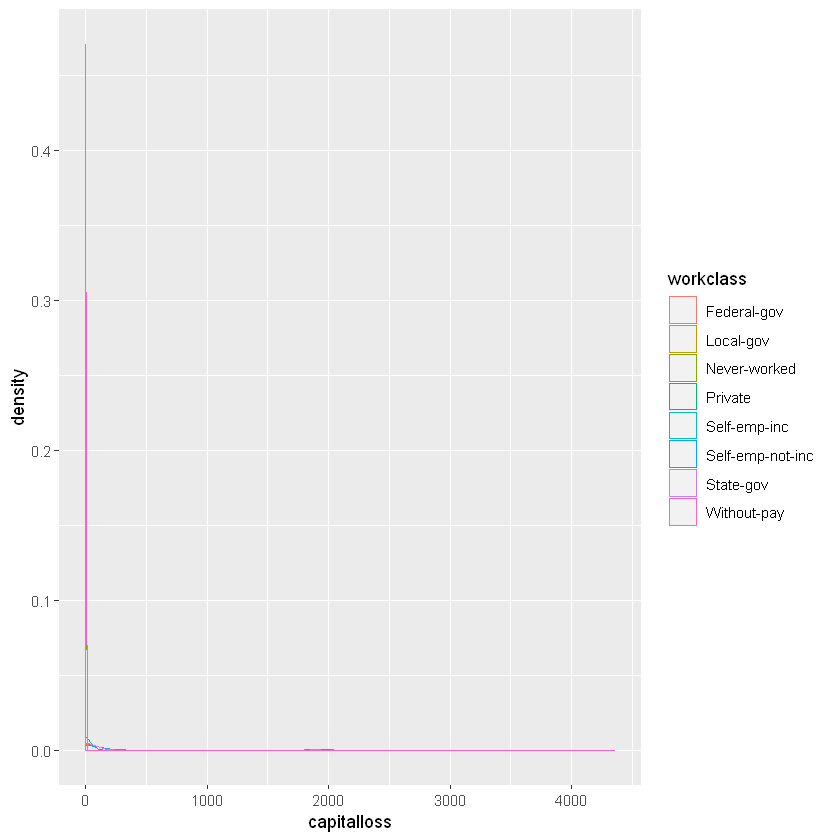

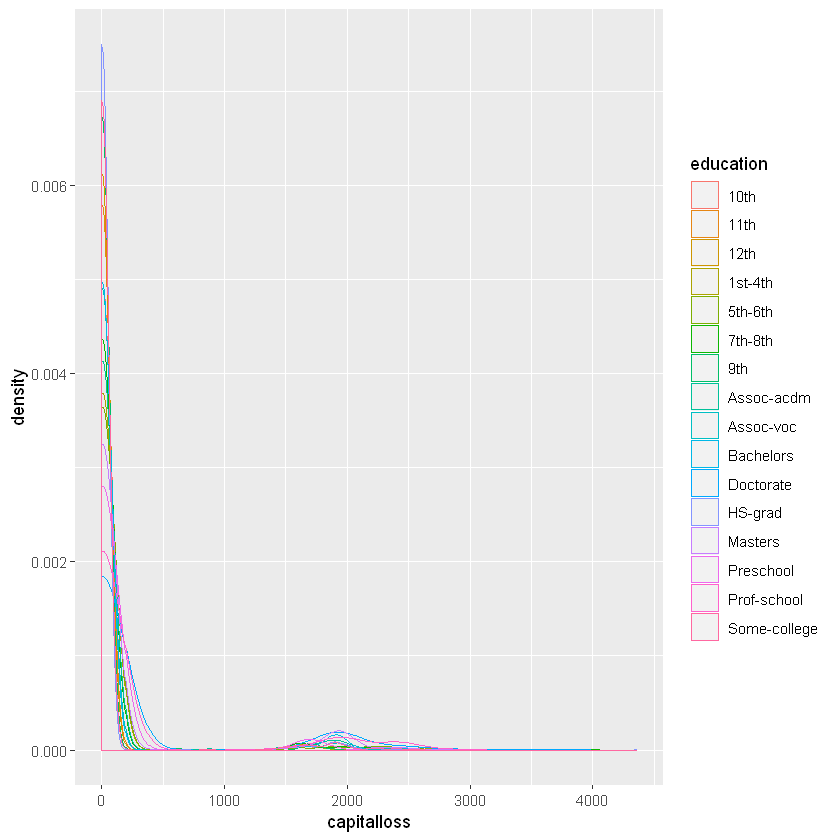

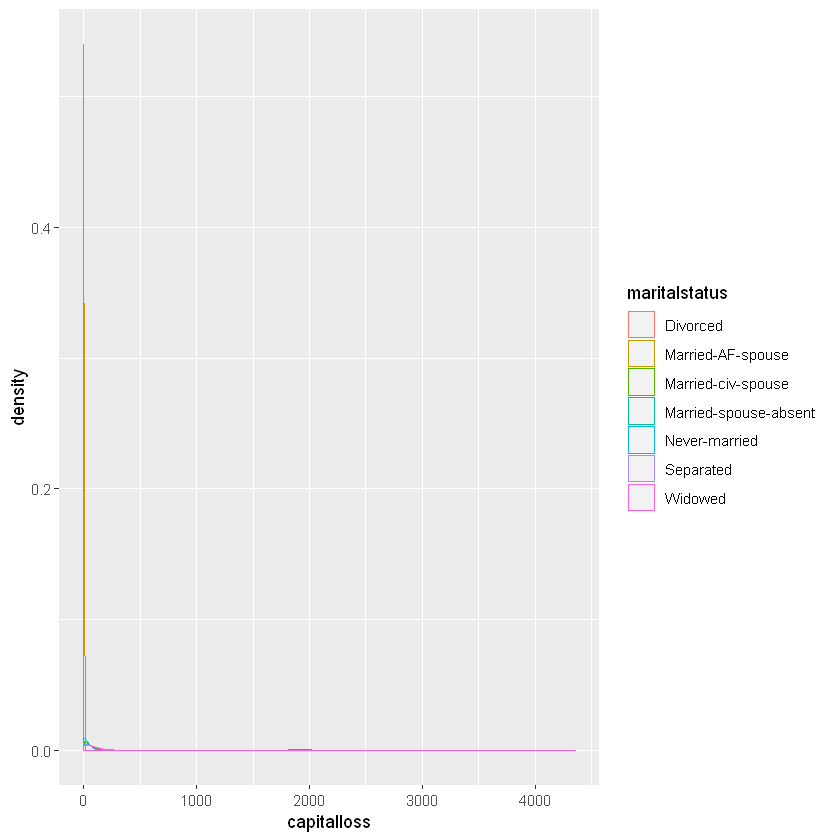

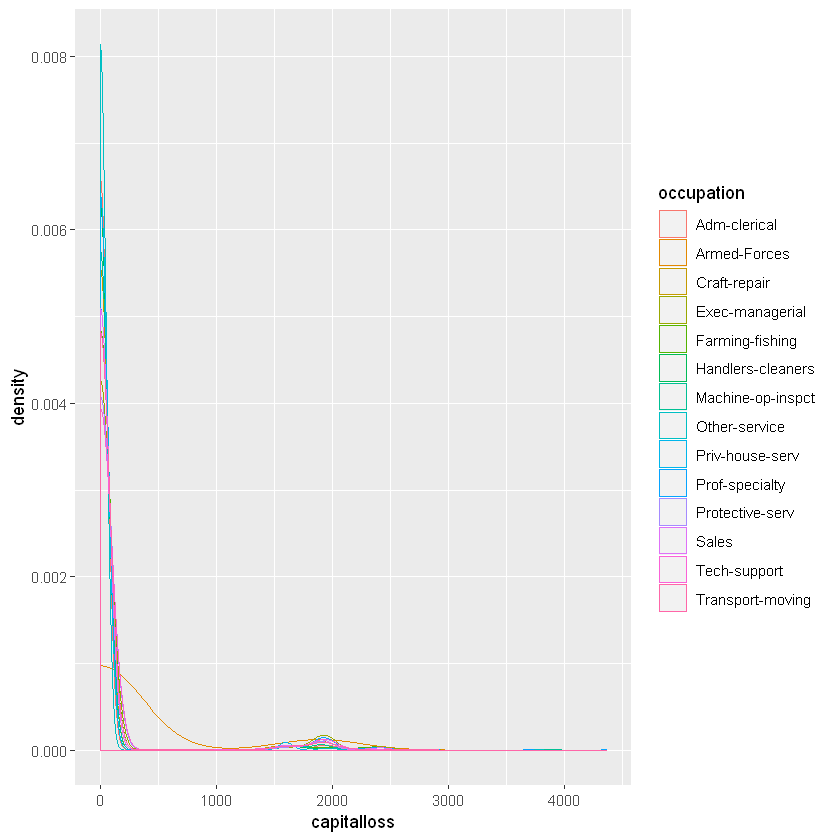

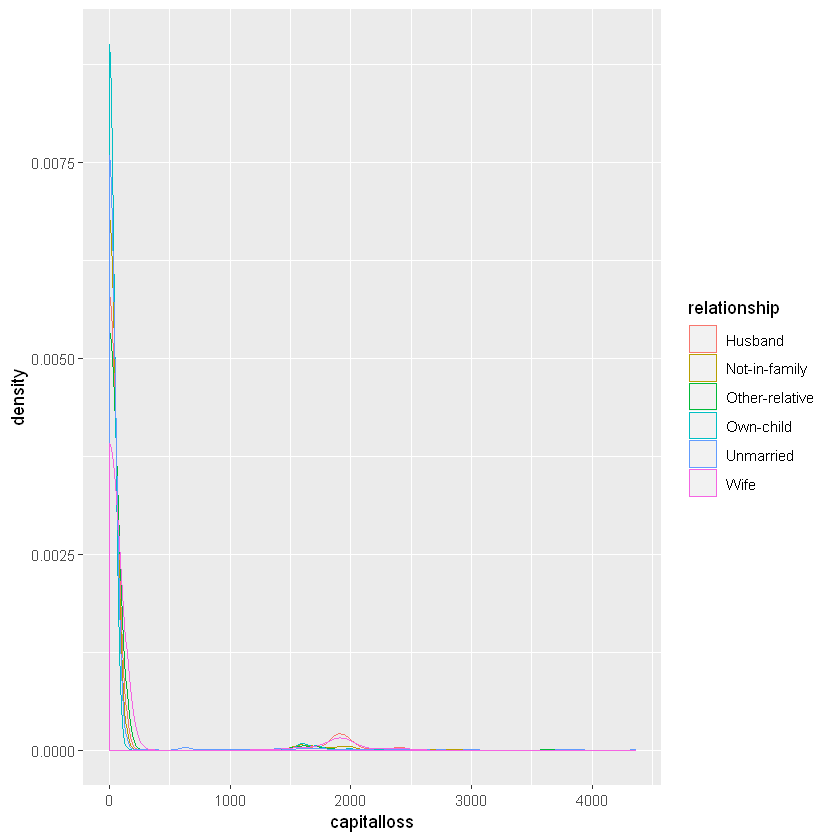

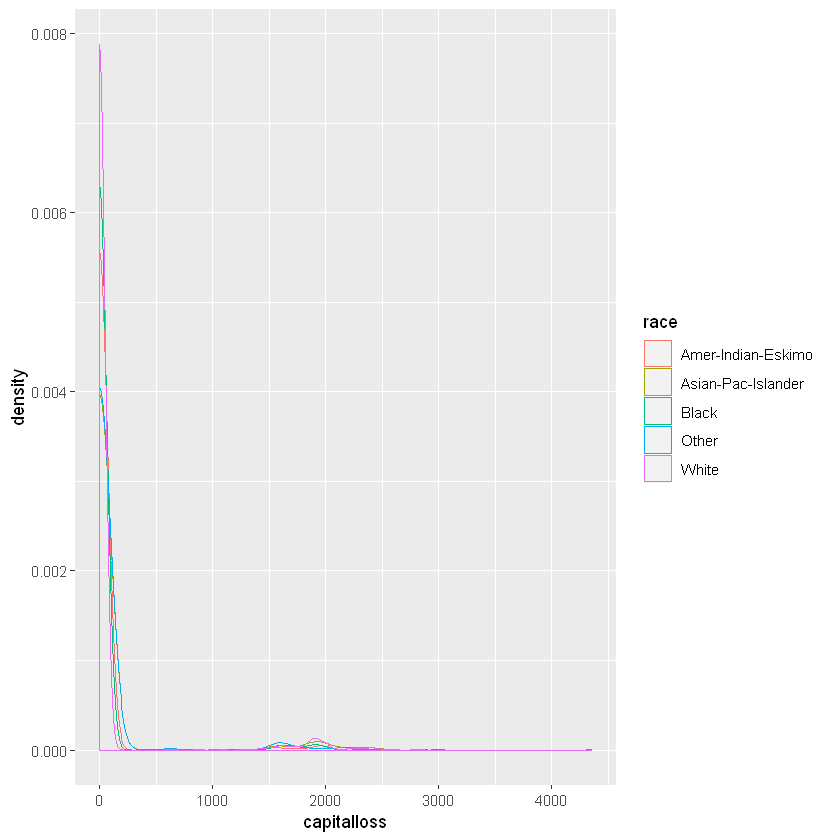

Warning message:
"Groups with fewer than two data points have been dropped."

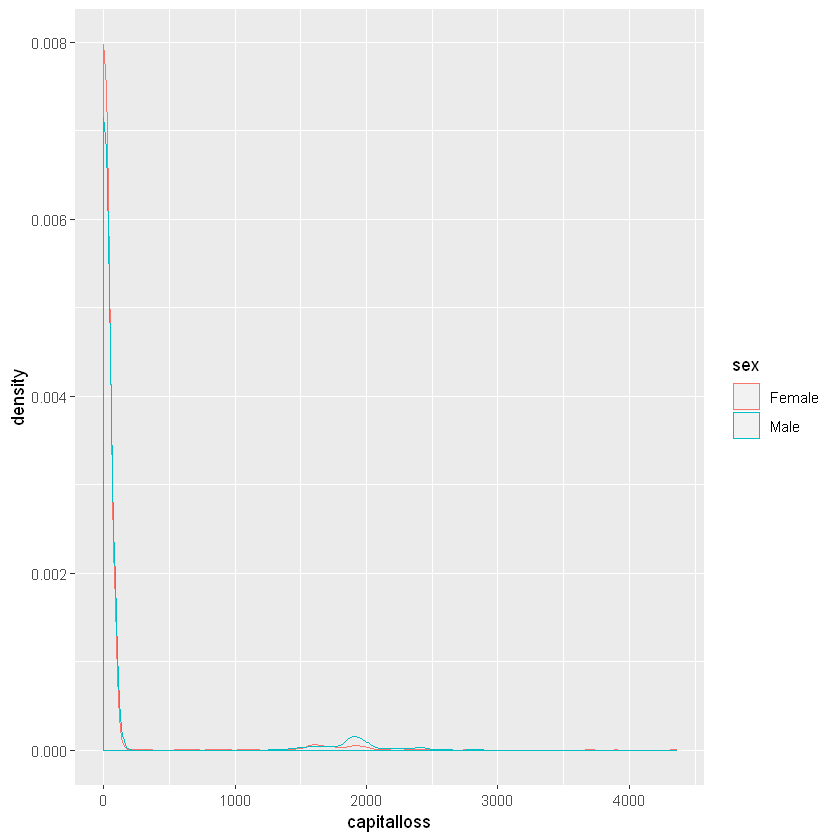

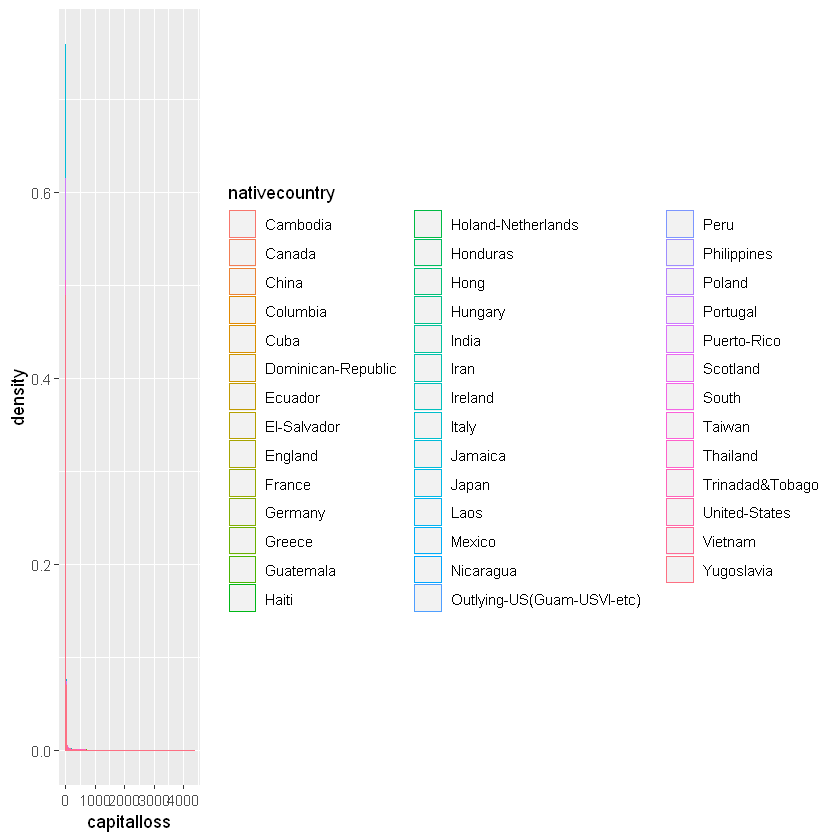

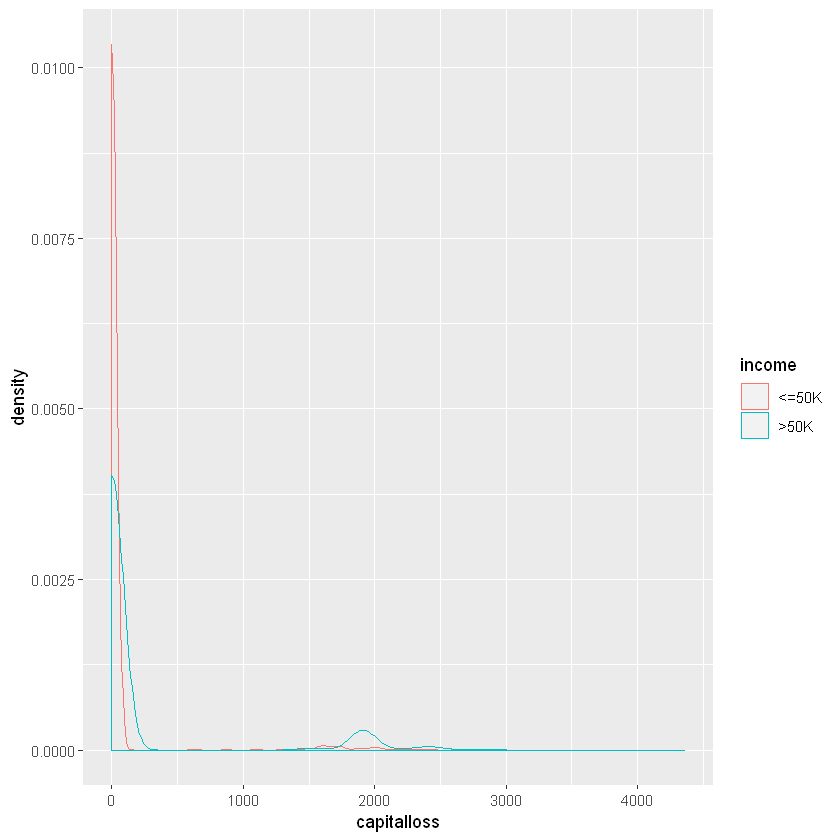

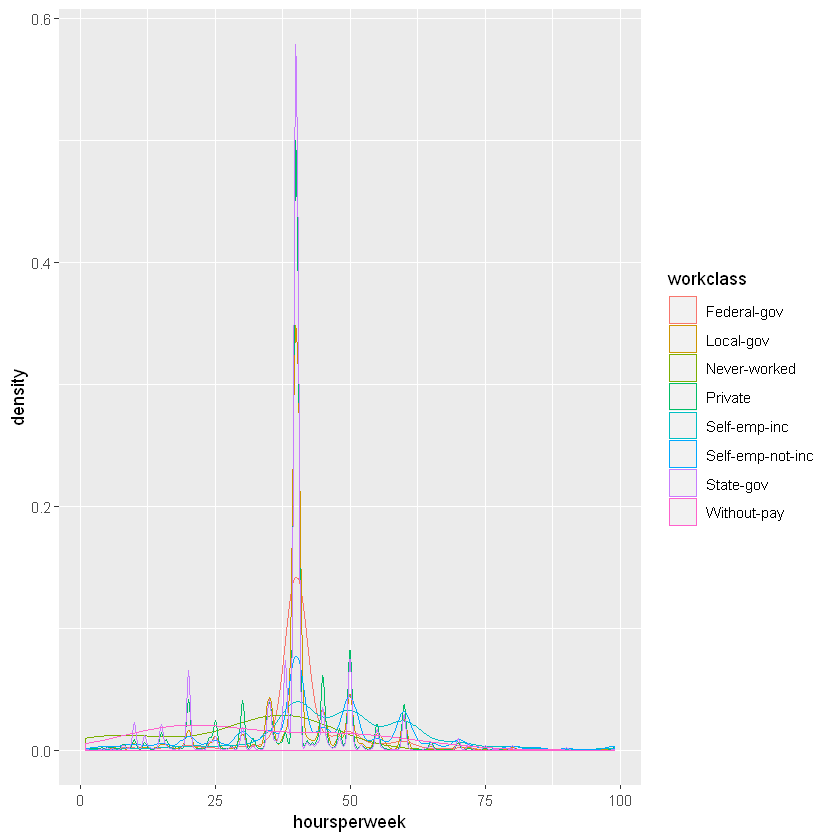

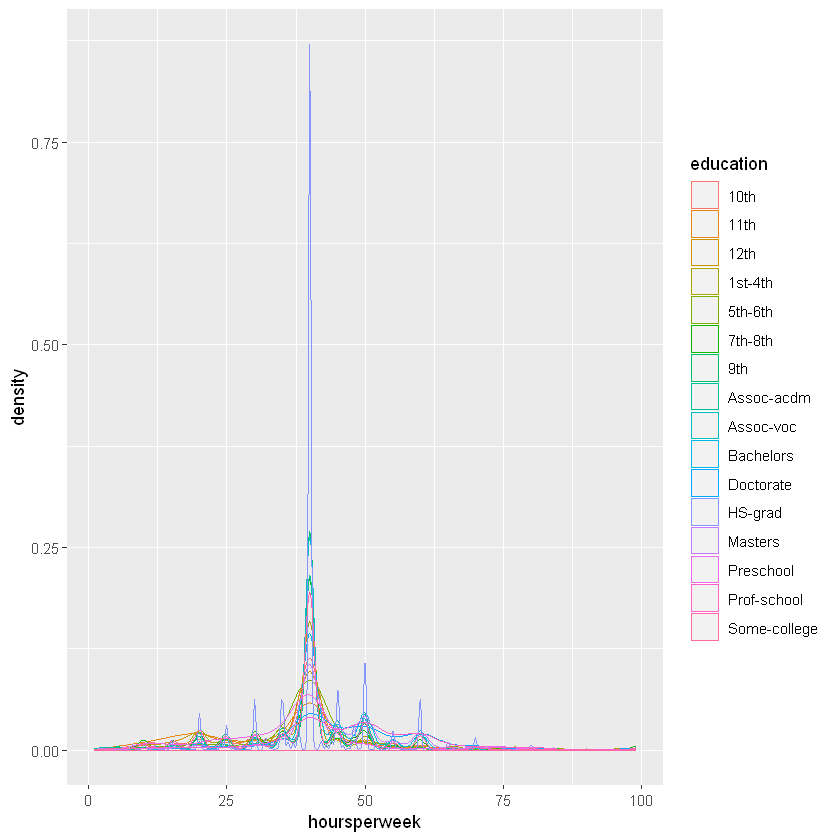

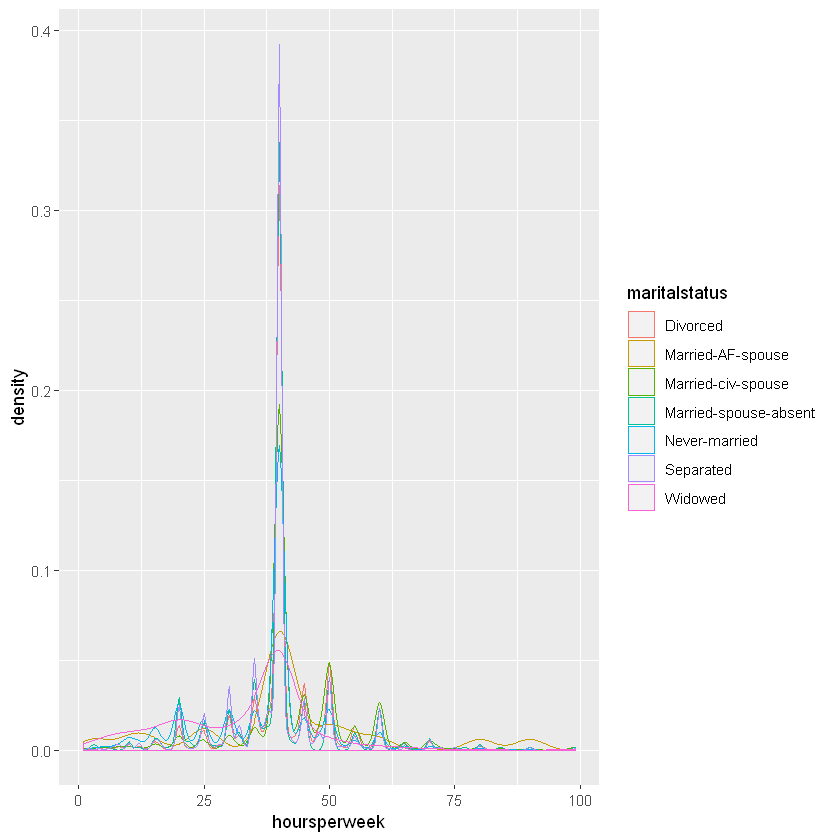

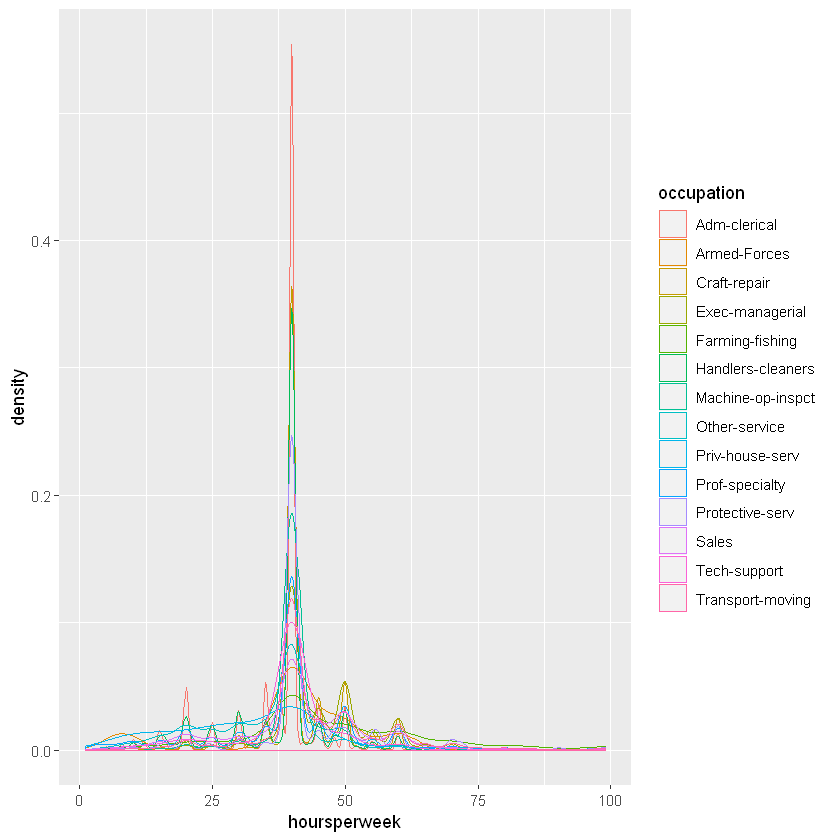

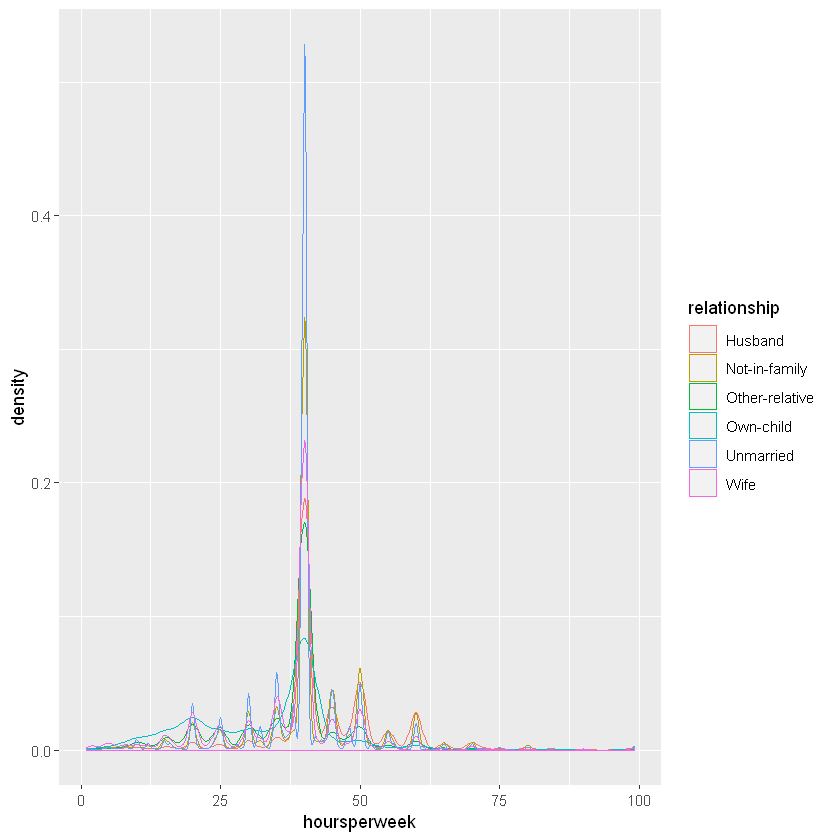

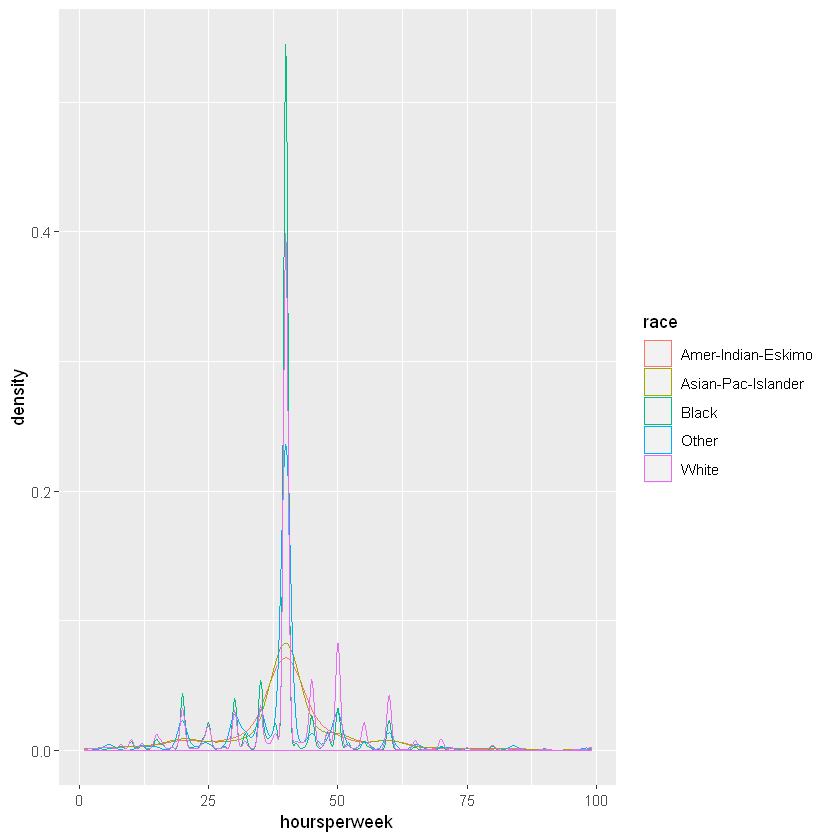

Warning message:
"Groups with fewer than two data points have been dropped."

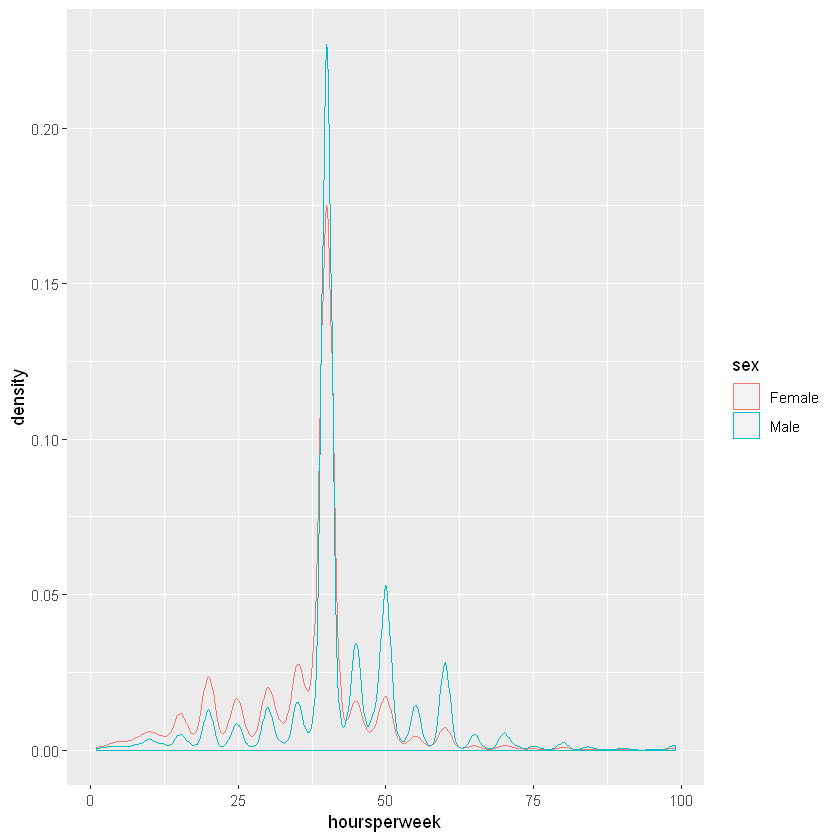

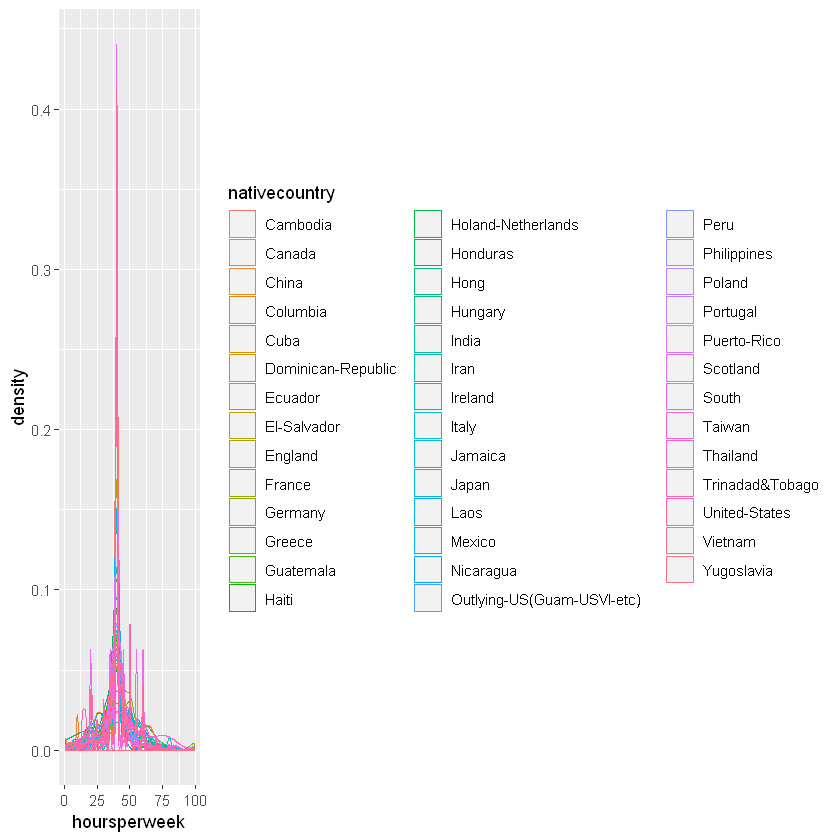

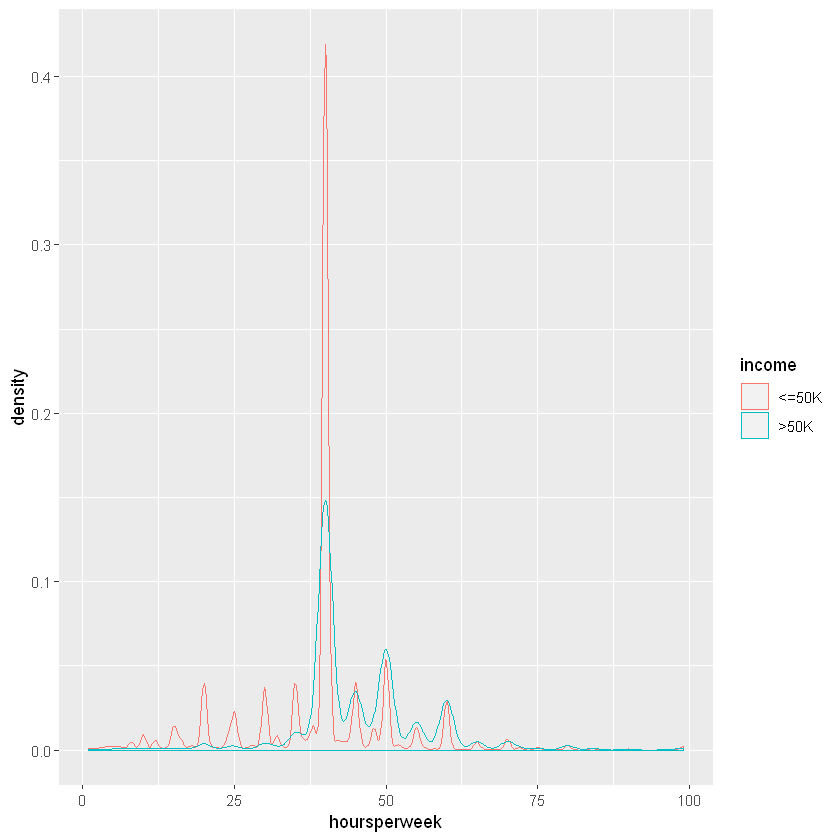

In [7]:
for(i in 1:ncol(adults))
{for (j in 1:ncol(adults))
  {if(is.numeric(adults[,i]) == TRUE & is.numeric(adults[,j]) == FALSE)
  {print(ggplot(adults) + geom_density(mapping = aes(x=adults[,i],  color = adults[,j]))+labs(x = names(adults)[i],color = names(adults[j])))}
}
}

### 7.	Partition the data into training and testing data with ratio train : test = 60 : 40

In [8]:
library(caret)
splitIndex <- createDataPartition(adults$income, p = .6, list = FALSE, times = 1)
train <- adults[ splitIndex,]
test <- adults[-splitIndex,]

Loading required package: lattice


### 8.	Build a decision tree model on the training data and test the model on the testing data

In [9]:
library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")
pred <- predict(mytree,test, type = "class")

### 9.	Report the misclassification rate and confusion table of the tree model

In [10]:
cm=confusionMatrix(data = pred, reference = test$income, positive = ">50K")

print(cm)
Misclassification <- (1 - cm$overall['Accuracy'])
names(Misclassification) = "Misclassification"
print(Misclassification)

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  9386 1492
     >50K    502 1644
                                         
               Accuracy : 0.8469         
                 95% CI : (0.8406, 0.853)
    No Information Rate : 0.7592         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5307         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.5242         
            Specificity : 0.9492         
         Pos Pred Value : 0.7661         
         Neg Pred Value : 0.8628         
             Prevalence : 0.2408         
         Detection Rate : 0.1262         
   Detection Prevalence : 0.1648         
      Balanced Accuracy : 0.7367         
                                         
       'Positive' Class : >50K           
                                         
Misclassification 
         0.153102 


### 10.	Print out the tree

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


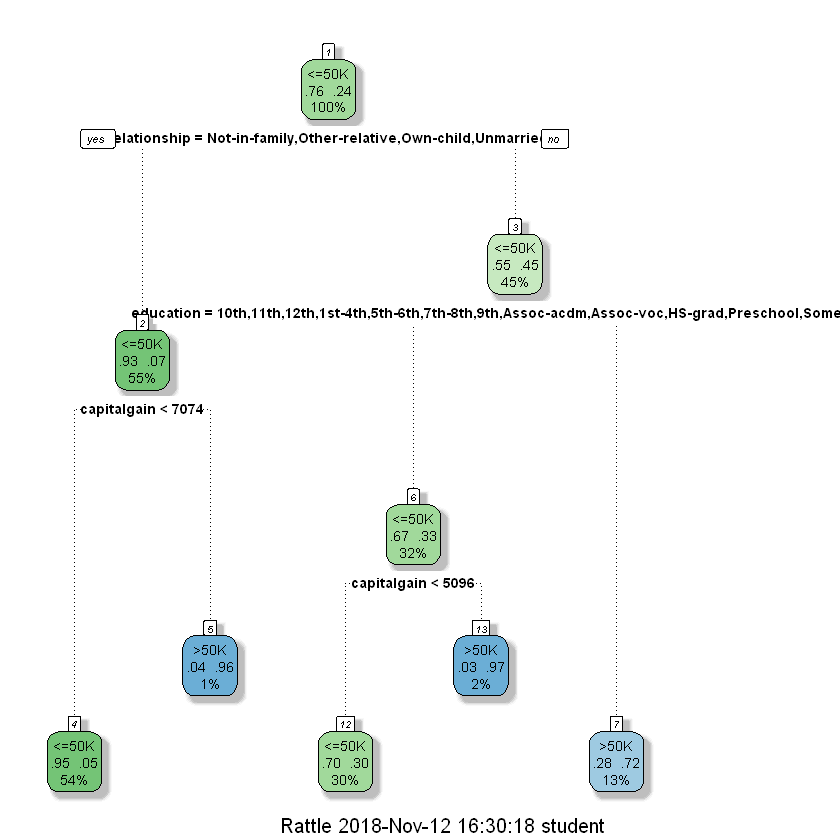

In [11]:
library(rattle)
fancyRpartPlot(mytree)

### 11.	Build tree model using caret package and report the confusion table 

In [12]:
model <- train(income~.,data =train, method = "rpart")
pred2=predict(model,test)

cm2=confusionMatrix(pred2, test$income, positive=">50K")

print(cm2)

Misclassification <- (1 - cm2$overall['Accuracy'])
names(Misclassification) = "Misclassification"
print(Misclassification)

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  9379 1604
     >50K    509 1532
                                          
               Accuracy : 0.8378          
                 95% CI : (0.8313, 0.8441)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4962          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4885          
            Specificity : 0.9485          
         Pos Pred Value : 0.7506          
         Neg Pred Value : 0.8540          
             Prevalence : 0.2408          
         Detection Rate : 0.1176          
   Detection Prevalence : 0.1567          
      Balanced Accuracy : 0.7185          
                                          
       'Positive' Class : >50K            
                                          
Misclassification 
  

### 12.	Write a function, taking the input of training data percentage, to automate 7-10.  Apply the function with training data = 70%; 80%; 90%

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  7048 1139
     >50K    368 1213
                                          
               Accuracy : 0.8457          
                 95% CI : (0.8384, 0.8528)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5249          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5157          
            Specificity : 0.9504          
         Pos Pred Value : 0.7672          
         Neg Pred Value : 0.8609          
             Prevalence : 0.2408          
         Detection Rate : 0.1242          
   Detection Prevalence : 0.1619          
      Balanced Accuracy : 0.7331          
                                          
       'Positive' Class : >50K            
                                          
Misclassification 
  

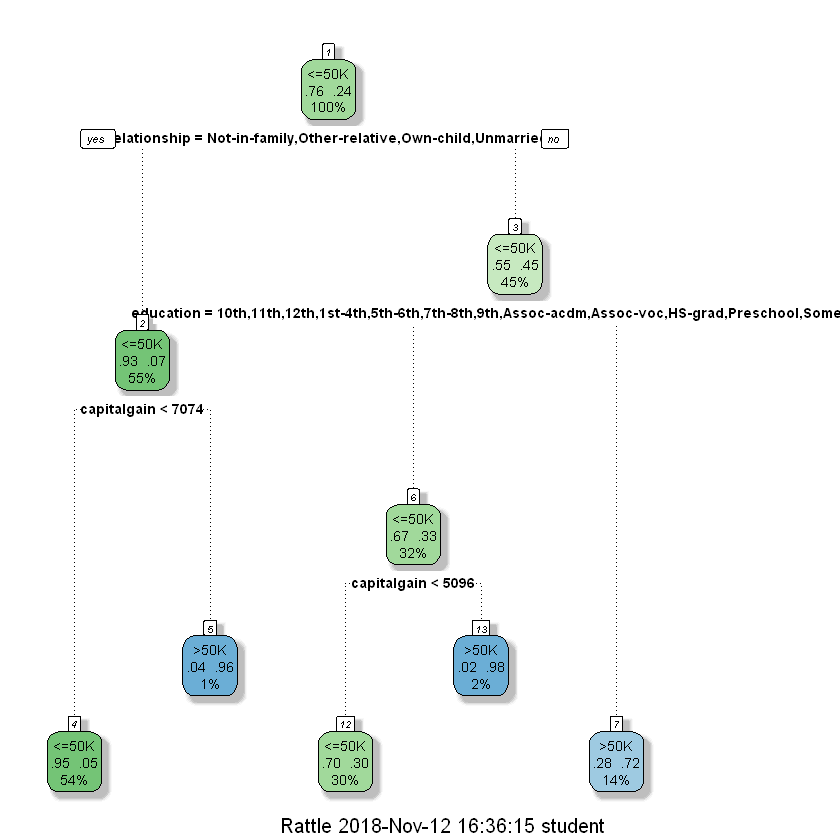

In [16]:
adultsdecisiontree <- function(x)
{
  library(caret)
splitIndex <- createDataPartition(adults$income, p = x , list = FALSE, times = 1)
train <- adults[ splitIndex,]
test <- adults[-splitIndex,]

library(rpart)
mytree <- rpart(income ~ ., data = train, method = "class")
pred <- predict(mytree,test, type = "class")

cm=confusionMatrix(data = pred, reference = test$income, positive = ">50K")

print(cm)
Misclassification <- (1 - cm$overall['Accuracy'])
names(Misclassification) = "Misclassification"
print(Misclassification)

library(rattle)
fancyRpartPlot(mytree)
}

adultsdecisiontree(.7)

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  4693  742
     >50K    251  826
                                          
               Accuracy : 0.8475          
                 95% CI : (0.8385, 0.8562)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.533           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5268          
            Specificity : 0.9492          
         Pos Pred Value : 0.7669          
         Neg Pred Value : 0.8635          
             Prevalence : 0.2408          
         Detection Rate : 0.1268          
   Detection Prevalence : 0.1654          
      Balanced Accuracy : 0.7380          
                                          
       'Positive' Class : >50K            
                                          
Misclassification 
  

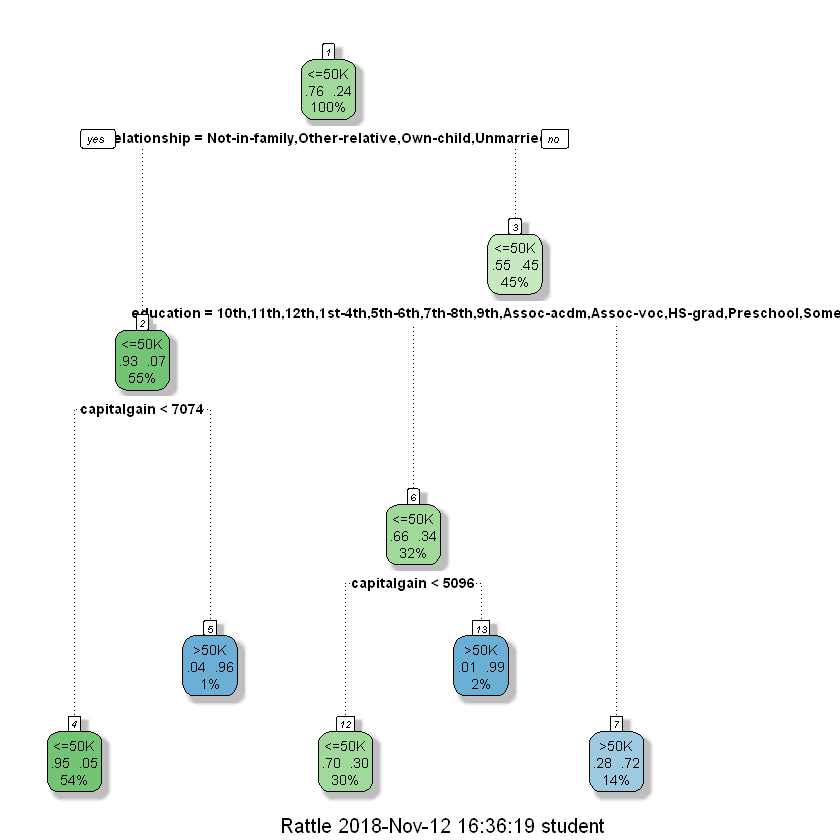

In [17]:
adultsdecisiontree(.8)

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  2356  369
     >50K    116  415
                                          
               Accuracy : 0.851           
                 95% CI : (0.8383, 0.8631)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5421          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5293          
            Specificity : 0.9531          
         Pos Pred Value : 0.7815          
         Neg Pred Value : 0.8646          
             Prevalence : 0.2408          
         Detection Rate : 0.1275          
   Detection Prevalence : 0.1631          
      Balanced Accuracy : 0.7412          
                                          
       'Positive' Class : >50K            
                                          
Misclassification 
  

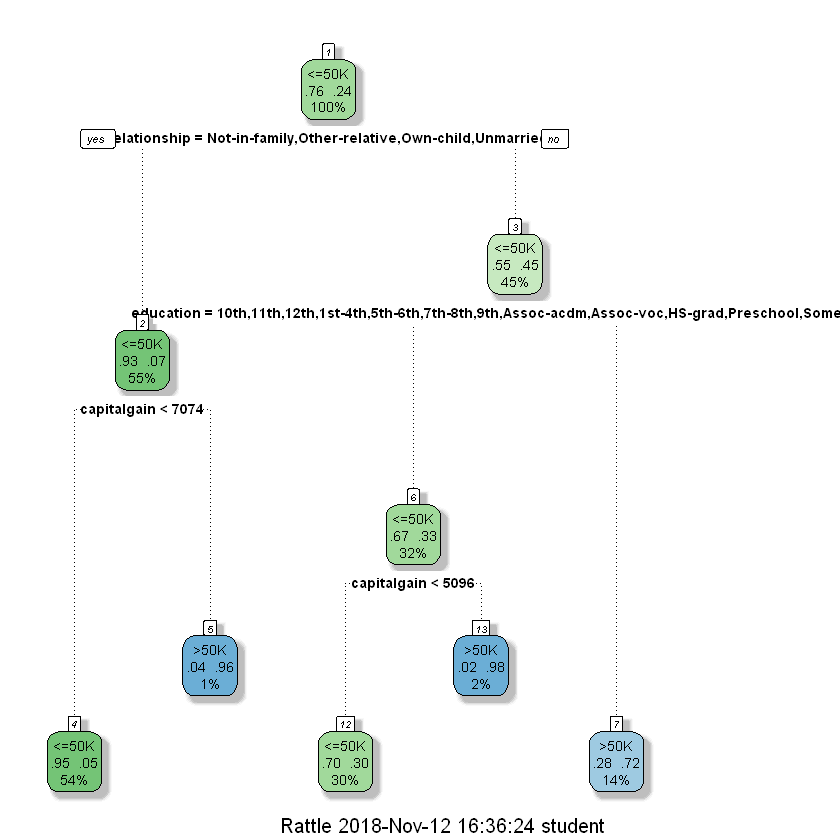

In [18]:
adultsdecisiontree(.9)